## ‚ùì Perguntas e Respostas

---

### 2.a. Qual filme voc√™ recomendaria para uma pessoa que voc√™ n√£o conhece?

Como n√£o conhe√ßo a pessoa nem seus gostos, eu indicar filmes que tenham **notas altas no IMDb** e um **ROI mais equilibrado**, porque isso aumenta as chances de o filme ter qualidade e agradar. Diretores como **Christopher Nolan** costumam manter um padr√£o de avalia√ß√µes bem alto, enquanto **Steven Spielberg** consegue unir boa recep√ß√£o do p√∫blico com retorno financeiro forte. J√° nos g√™neros, **Mystery** e **Western** apareceram com as maiores notas m√©dias, ent√£o acabam sendo apostas seguras para recomendar de forma geral. No fim, recomendar√≠a obras desses diretores ou desses g√™neros, j√° que unem qualidade, boa aceita√ß√£o do p√∫blico e potencial de agradar mesmo sem conhecer seu gosto.

---

### 2.b. Quais s√£o os principais fatores que est√£o relacionados com alta expectativa de faturamento de um filme?

O estudo mostrou que alguns fatores ajudam a prever se um filme vai ter um faturamento maior:

* **Or√ßamento**: filmes com mais dinheiro geralmente arrecadam mais, mas produ√ß√µes de baixo custo tamb√©m podem surpreender.
* **Diretor**: certos diretores, como Spielberg e Clint Eastwood, t√™m ROI consistente e v√°rios sucessos garantidos.
* **Franquia**: filmes que fazem parte de franquias costumam ter resumos mais detalhados, universos complexos e personagens recorrentes, o que atrai mais p√∫blico.
* **G√™nero**: mesmo que a diferen√ßa entre g√™neros n√£o seja estatisticamente significativa, filmes de **Fam√≠lia** tiveram retornos m√©dios mais altos e est√°veis.

Ou seja, al√©m do dinheiro investido, a escolha do diretor e se o filme √© parte de uma franquia ou original tamb√©m influenciam bastante no desempenho financeiro, embora sempre exista algum risco.

**Se eu tivesse que fazer uma recomenda√ß√£o para um investidor, seria:** Priorize **diretores experientes**, prefira **franquias** ou continua√ß√µes, mantenha o **or√ßamento equilibrado** e foque em **filmes de Fam√≠lia** para aumentar a chance de retorno financeiro est√°vel.

---

### 2.c. Quais insights podem ser tirados com a coluna Overview? √â poss√≠vel inferir o g√™nero do filme a partir dessa coluna?

Insights da Coluna Overview

Os resumos dos filmes (Overview) trazem informa√ß√µes valiosas sobre o g√™nero e o conte√∫do da obra:

Cada g√™nero apresenta vocabul√°rio caracter√≠stico:

- **A√ß√£o/Aventura/Anima√ß√£o**: combates, miss√µes, explora√ß√£o.
- **Drama/Crime/Terror**: rela√ß√µes humanas, conflitos, tens√£o.
- **Com√©dia**: situa√ß√µes leves, humor e romance.
- **Biografia**: narrativas de vida e conquistas pessoais.

Inicialmente usamos o modelo TF-IDF + LinearSVC que n√£o superou a baseline de acur√°cia, mas ao realizar o teste de permuta√ß√£o (p=0,005), ele nos mostrou que h√° sinais estatisticamente significativos, ou seja, os resumos cont√™m informa√ß√£o relevante sobre o g√™nero.

Palavras-chave como *fight*, *mission* e *army* aumentam a probabilidade de um filme ser de a√ß√£o, enquanto *woman*, *mysterious* e *investigate* reduzem essa chance.

Diferen√ßas sutis entre franquias e originais: resumos de franquias tendem a refor√ßar enredos √©picos e universos complexos, enquanto originais exploram experi√™ncias mais pessoais e sociais.

Apesar de as Overviews serem muitas vezes gen√©ricas, combin√°-las com t√©cnicas avan√ßadas de NLP (como BERT ou embeddings pr√©-treinados) e dados estruturados (dura√ß√£o, n√∫mero de votos, ROI) pode aumentar a precis√£o na classifica√ß√£o de g√™nero e na an√°lise de sucesso do filme.

---

O estudo indica que, para maximizar qualidade percebida e retorno financeiro, √© estrat√©gico considerar **diretor, g√™nero, or√ßamento e franquia**. Os resumos fornecem pistas valiosas sobre o g√™nero, mas sua an√°lise isolada tem limita√ß√µes. Modelos de machine learning integrando texto e dados estruturados, como **Random Forest com vari√°veis selecionadas pela EDA**, se mostraram eficazes para predizer notas no IMDb, oferecendo uma base s√≥lida para decis√µes de produ√ß√£o e recomenda√ß√£o de filmes.

---

### 3.1. Explique como voc√™ faria a previs√£o da nota do imdb a partir dos dados. Quais vari√°veis e/ou suas transforma√ß√µes voc√™ utilizou e por qu√™?

Para prever a nota do IMDb dos filmes, estamos lidando com um **problema de regress√£o**, j√° que o alvo √© cont√≠nuo, ou seja, queremos estimar o valor num√©rico da nota de cada filme. O objetivo do modelo √© prever a nota usando apenas informa√ß√µes que estariam dispon√≠veis **antes do lan√ßamento**, evitando dados do futuro que poderiam distorcer o aprendizado (problema de *data leakage*).

No pr√©-processamento, removemos vari√°veis que poderiam atrapalhar a predi√ß√£o. Por exemplo, **Gross**, **ROI** e **Production Budget** foram exclu√≠dos porque s√£o informa√ß√µes financeiras s√≥ conhecidas depois que o filme √© lan√ßado. Incluir esses dados faria o modelo aprender padr√µes imposs√≠veis de prever antes do lan√ßamento, resultando em predi√ß√µes irreais. Outras vari√°veis removidas foram **Overview** e **overview\_clean** (textos completos do resumo), **Series\_Title** e **Released\_Year**, que n√£o ajudavam diretamente na previs√£o.

Criamos a vari√°vel **overview\_len**, que mede o tamanho do resumo do filme. Essa transforma√ß√£o gera um n√∫mero que indica indiretamente qu√£o detalhado √© o roteiro, fornecendo informa√ß√£o √∫til sem precisar trabalhar com texto bruto, o que exigiria processamento mais complexo de NLP. Para lidar com valores extremos, aplicamos uma transforma√ß√£o logar√≠tmica (*log(1+x)*) e depois escalonamento.

As vari√°veis num√©ricas (**Runtime, Meta\_score, No\_of\_Votes e overview\_len**) foram escalonadas, e No\_of\_Votes e overview\_len tamb√©m receberam log-transforma√ß√£o para reduzir o impacto de valores muito altos. As vari√°veis categ√≥ricas (**Certificate** e **Main\_Genre**) foram transformadas em **One-Hot Encoding**, enquanto **Director** recebeu **Target Encoding**, usando a m√©dia das notas do IMDb por diretor.

A vari√°vel **is\_franchise**, uma vari√°vel externa obtida do TMDb, indica se o filme faz parte de uma franquia ou √© original. Transformamos **True/False em 1/0**, tornando-a num√©rica e pronta para o modelo. Ela pode ajudar a capturar efeitos indiretos, como maior popularidade ou expectativa do p√∫blico, mas n√£o √© decisiva sozinha, funciona como uma vari√°vel auxiliar.

No come√ßo, inclu√≠mos os atores principais (**Star1-4**) usando Target Encoding, acreditando que atores renomados poderiam influenciar a nota. Por√©m, ao treinar modelos como **Random Forest, SVM e Decision Tree**, percebemos que isso causava **overfitting**: o modelo aprendia padr√µes espec√≠ficos dos atores do conjunto de treino, mas n√£o funcionava bem com novos filmes. Por isso, removemos essas vari√°veis, focando em informa√ß√µes que realmente ajudam a prever de forma consistente.

Para selecionar as vari√°veis mais importantes, combinamos tr√™s m√©todos: an√°lise explorat√≥ria (EDA), Feature Importance via √°rvore de decis√£o e Information Value (IV). As vari√°veis que mais se destacaram e foram consistentes entre os m√©todos foram **Runtime, No\_of\_Votes, Meta\_score, Main\_Genre e Director**. Vari√°veis adicionais como **Certificate, overview\_len e is\_franchise** foram mantidas por poderem melhorar ainda mais a performance do modelo.

| Vari√°vel          | EDA | Feature Importances | IV |
| ----------------- | --- | ------------------- | -- |
| **Runtime**       | X   | X                   | X  |
| **No\_of\_Votes** | X   | X                   | X  |
| **Meta\_score**   | X   | X                   | X  |
| **Main\_Genre**   | X   | X                   | X  |
| **Director**      | X   | X                   | X  |
| **is\_franchise** | X   | X                   |    |
| **Certificate**   | X   |                     |    |
| **overview\_len** |     | X                   | X  |

---

### 3.2. Qual tipo de problema estamos resolvendo (regress√£o, classifica√ß√£o)?

Estamos lidando agora com um problema de **regress√£o** porque nosso alvo (`y`) √© uma vari√°vel cont√≠nua, a nota do IMDb, e n√£o categorias discretas. Diferente de um problema de classifica√ß√£o, onde prever√≠amos r√≥tulos como ‚Äúbom/ruim‚Äù ou ‚Äúalta/baixa nota‚Äù, aqui queremos **estimar valores num√©ricos exatos**, justificando o uso de m√©tricas e modelos espec√≠ficos para regress√£o.

---

### 3.3. Qual modelo melhor se aproxima dos dados e quais seus pr√≥s e contras?

Testamos quatro modelos de regress√£o: Random Forest Regressor, SVM (SVR), Ridge Regression e Decision Tree Regressor. O Random Forest se destacou, explicando cerca de 67‚Äì72% da varia√ß√£o das notas (R¬≤ ~0.729) e mantendo consist√™ncia entre os folds da valida√ß√£o cruzada. Este modelo √© robusto a outliers, captura rela√ß√µes n√£o lineares e intera√ß√µes complexas, al√©m de fornecer m√©tricas de import√¢ncia das vari√°veis. Limita√ß√µes incluem menor interpretabilidade, necessidade de ajuste de hiperpar√¢metros, maior tempo de treino e dificuldade em extrapolar valores fora do padr√£o observado.

| Aspecto            | Pr√≥s                                                      | Contras                                                     |
| ------------------ | --------------------------------------------------------- | ----------------------------------------------------------- |
| Acur√°cia           | Captura rela√ß√µes complexas e n√£o lineares entre vari√°veis |                                                             |
| Robustez           | Resistente a outliers e ru√≠dos nos dados                  |                                                             |
| Interpretabilidade | Permite avaliar import√¢ncia das vari√°veis                 | Dif√≠cil de interpretar individualmente (caixa-preta)        |
| Overfitting        | Menor risco que uma √°rvore √∫nica                          |                                                             |
| Desempenho         |                                                           | Treinamento e previs√£o mais lentos                          |
| Hiperpar√¢metros    |                                                           | Necessita ajuste de par√¢metros para performance √≥tima       |
| Extrapola√ß√£o       |                                                           | N√£o lida bem com valores fora do padr√£o observado no treino |

---

### 3.4. Qual medida de performance do modelo foi escolhida e por qu√™?

Para medir performance, utilizamos v√°rias m√©tricas complementares:

- **R¬≤**: mede a propor√ß√£o da varia√ß√£o da nota do IMDb explicada pelo modelo, mostrando o poder explicativo global.
- **RMSE (Root Mean Squared Error)**: penaliza mais os erros grandes, dando √™nfase a previs√µes muito distantes do valor real.
- **MAE (Mean Absolute Error)**: indica o erro m√©dio absoluto, oferecendo uma medida mais intuitiva do desvio m√©dio das previs√µes sem exagerar nos outliers.
- **MAPE (Mean Absolute Percentage Error)**: fornece o erro em termos percentuais, √∫til para comparar a precis√£o relativa das previs√µes em diferentes escalas.

A combina√ß√£o dessas m√©tricas garante que o modelo n√£o apenas explique bem a varia√ß√£o das notas, mas tamb√©m apresente previs√µes precisas tanto em termos absolutos quanto relativos. A Random Forest, combinada com a sele√ß√£o de vari√°veis via EDA, oferece alto poder explicativo, baixo risco de overfitting e seguran√ßa contra data leakage, tornando-se a escolha ideal para prever a nota do IMDb.

| M√©todo de sele√ß√£o          | R¬≤    | RMSE  | MAE   | MAPE  | Observa√ß√£o/Coment√°rio                                                                            |
| -------------------------- | ----- | ----- | ----- | ----- | ------------------------------------------------------------------------------------------------ |
| **EDA**                    | 0.729 | 0.134 | 0.097 | 1.21% | Resultados obtidos com as vari√°veis selecionadas via EDA                                         |
| **Feature Importances**    | 0.728 | 0.134 | 0.099 | 1.23% | Desempenho pr√≥ximo ao da EDA, vari√°veis importantes do modelo foram usadas                       |
| **IV (Information Value)** | 0.724 | 0.135 | 0.099 | 1.23% | Bom desempenho, quase igual ao da EDA, vari√°veis escolhidas via IV se mostraram muito relevantes |
| **Melhor resultado**       | 0.729 | 0.134 | 0.097 | 1.21% | At√© agora, melhor resultado obtido com EDA  

---

### 4. Supondo um filme com as seguintes caracter√≠sticas:

{'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}


    Qual seria a nota do IMDB?


Para estimar a nota do IMDb desse filme, come√ßamos aplicando **todas as transforma√ß√µes que definimos no nosso modelo**. Isso inclui:

* Transformar a dura√ß√£o (**Runtime**) em n√∫mero inteiro,
* Criar a vari√°vel **overview\_len** a partir do tamanho do resumo (**Overview**) e aplicar log-transforma√ß√£o + escalonamento,
* Escalonar as vari√°veis num√©ricas (**Meta\_score, No\_of\_Votes**),
* Transformar vari√°veis categ√≥ricas (**Certificate, Genre** ‚Üí Main\_Genre, Director) usando One-Hot Encoding ou Target Encoding,
* Adicionar e transformar a vari√°vel booleana **is\_franchise** em 0/1,
Em resumoi, foi necess√°rio garantir que todas as vari√°veis est√£o no mesmo formato que o modelo espera.

Depois de preparar o filme dessa forma e pass√°-lo pelo nosso **modelo Random Forest**, ele retornou uma previs√£o de **nota IMDb igual a 8.7**.

Isso significa que, segundo nosso modelo, **‚ÄúThe Shawshank Redemption‚Äù teria uma avalia√ß√£o muito alta**, alinhada com sua reputa√ß√£o cl√°ssica. A previs√£o leva em conta o diretor, a nota do Meta\_score, o n√∫mero de votos, o tamanho do resumo e outros fatores que o modelo aprendeu a associar a boas avalia√ß√µes, sem precisar olhar para dados financeiros ou qualquer informa√ß√£o p√≥s-lan√ßamento.

In [14]:
# pip install thefuzz

In [15]:
# pip install nltk

In [16]:
# pip install spacy

In [17]:
# pip install wordcloud

In [18]:
# pip install category_encoders

In [19]:
# Bibliotecas padr√£o
import pandas as pd
import numpy as np
import re

# Bibliotecas de visualiza√ß√£o
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Biblioteca para correspond√™ncia de strings
from thefuzz import process

# Biblioteca para requisi√ß√µes HTTP
import requests

# Biliotecas estat√≠sticas
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import levene
from scipy.stats import spearmanr
from scipy.stats import ttest_ind

# Bibliotecas de machine learning
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import NMF
from sklearn.svm import LinearSVC
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import permutation_test_score
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.model_selection import GridSearchCV


# Bibliotecas de NLP
import nltk, spacy
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

Vamos fazer a leitura do dataframe

In [20]:
df = pd.read_csv('desafio_indicium_imdb.csv')

In [21]:
df.head()

Unnamed: 0                                   Series_Title Released_Year  \
0           1                                  The Godfather          1972   
1           2                                The Dark Knight          2008   
2           3                         The Godfather: Part II          1974   
3           4                                   12 Angry Men          1957   
4           5  The Lord of the Rings: The Return of the King          2003   

  Certificate  Runtime                     Genre  IMDB_Rating  \
0           A  175 min              Crime, Drama          9.2   
1          UA  152 min      Action, Crime, Drama          9.0   
2           A  202 min              Crime, Drama          9.0   
3           U   96 min              Crime, Drama          9.0   
4           U  201 min  Action, Adventure, Drama          8.9   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...       100.0   
1  When the menace known as the Joker wreaks havo...        84.0   
2  The early life and career of Vito Corleone in ...        90.0   
3  A jury holdout attempts to prevent a miscarria...        96.0   
4  Gandalf and Aragorn lead the World of Men agai...        94.0   

               Director           Star1            Star2          Star3  \
0  Francis Ford Coppola   Marlon Brando        Al Pacino     James Caan   
1     Christopher Nolan  Christian Bale     Heath Ledger  Aaron Eckhart   
2  Francis Ford Coppola       Al Pacino   Robert De Niro  Robert Duvall   
3          Sidney Lumet     Henry Fonda      Lee J. Cobb  Martin Balsam   
4         Peter Jackson     Elijah Wood  Viggo Mortensen   Ian McKellen   

           Star4  No_of_Votes        Gross  
0   Diane Keaton      1620367  134,966,411  
1  Michael Caine      2303232  534,858,444  
2   Diane Keaton      1129952   57,300,000  
3   John Fiedler       689845    4,360,000  
4  Orlando Bloom      1642758  377,845,905

Iremos adicionar uma variavel externa, a nossa base de dados, sabendo que o Gross (faturamento de bilheteria) por si s√≥ pode ser enganoso, pois um filme que arrecada 200 milh√µes pode at√© parecer que foi um sucesso, mas se ele custou 180 milh√µes para ser produzido e ainda teve mais 50 milh√µes de marketing, o retorno real foi baixo. J√° um filme que custou apenas 5 milh√µes e faturou 50 milh√µes tem um ROI (Return on Investment) muito mais atrativo.

Mas pq usaremos o ROI?

O ROI na nossa an√°lise ser√° indicadores muito importante, pois conecta custo e retorno, o que acaba permitindo avaliar n√£o apenas o sucesso de bilheteria, mas tamb√©m a efici√™ncia financeira da produ√ß√£o.


Esse indicador nos permitir√° responder perguntas como:

* Quais g√™neros trazem maior retorno proporcional?

* Filmes com baixo or√ßamento s√£o sempre mais rent√°veis?

* Blockbusters de alto custo realmente compensam?

Esses dados externos foram encontrados no site The Numbers, onde deixarei o link abaixo:

https://www.the-numbers.com/movie/budgets/all/6701

In [22]:
df1 = pd.read_csv('Box_Office.csv', encoding='latin1')

In [23]:
df1.head()

Unnamed: 0 Release Date                                        Movie  \
0          1    16-Dec-15         Star Wars Ep. VII: The Force Awakens   
1          2    23-Apr-19                            Avengers: Endgame   
2          3     9-Dec-22                     Avatar: The Way of Water   
3          4    17-May-25      Mission: Impossible√ëThe Final Reckoning   
4          5    20-May-11  Pirates of the Caribbean: On Stranger Tides   

  Production Budget Domestic Gross  Worldwide Gross  
0     √ä$533,200,000  √ä$936,662,225  √ä$2,056,046,835  
1     √ä$400,000,000  √ä$858,373,000  √ä$2,717,503,922  
2     √ä$400,000,000  √ä$684,075,767  √ä$2,320,250,281  
3     √ä$400,000,000  √ä$197,413,515    √ä$597,843,604  
4     √ä$379,000,000  √ä$241,071,802  √ä$1,045,713,802

Como podemos ver no nosso dataframe do or√ßamento dos filmes, os dados vieram em formato de texto, contendo s√≠mbolos como "$", v√≠rgulas ",", e alguns caracteres estranhos resultantes da extra√ß√£o dos dados.
Esses s√≠mbolos atrapalham os c√°lculos, pois impedem a convers√£o direta para valores num√©ricos.

Logo iremos transforma a coluna Production Budget de texto sujo em valores num√©ricos prontos para an√°lise.

# 1 - An√°lise explorat√≥ria dos dados

## 1.1 - Tratamento inicial dos dados e adi√ß√£o de vari√°veis externas

In [24]:
df_budget = df1[["Movie", "Production Budget"]].copy()

# remover s√≠mbolos indesejados (como √ä, $, v√≠rgulas)
df_budget["Production Budget"] = (
    df_budget["Production Budget"]
    .astype(str)
    .str.replace(r"[^\d]", "", regex=True)  # mant√©m s√≥ d√≠gitos
    .astype(int)  # converte para inteiro
)

In [25]:
df_budget.head()

Movie  Production Budget
0         Star Wars Ep. VII: The Force Awakens          533200000
1                            Avengers: Endgame          400000000
2                     Avatar: The Way of Water          400000000
3      Mission: Impossible√ëThe Final Reckoning          400000000
4  Pirates of the Caribbean: On Stranger Tides          379000000

Nos primeiros testes, ao tentar fazer o merge apenas pelos nomes dos filmes, percebi que mais de 50% da coluna Budget ficou sem valores preenchidos. Isso aconteceu porque os nomes apresentavam pequenas diferen√ßas de formata√ß√£o ou escrita (por exemplo: ‚ÄúStar Wars: Episode VII‚Äù e ‚ÄúStar Wars Ep. VII‚Äù). Para resolver esse problema, optei por aplicar o fuzzy matching, uma t√©cnica que aumenta a chance de correspond√™ncia entre textos semelhantes, garantindo que os or√ßamentos fossem atribu√≠dos corretamente mesmo quando os t√≠tulos n√£o coincidiam exatamente.

In [26]:
# df -> dataset principal (com bilheteria)
# df_budget -> dataset de or√ßamentos j√° tratado com colunas renomeadas

# Criamos um dicion√°rio com correspond√™ncias fuzzy
def fuzzy_match_budget(movie_name, choices, threshold=90):
    """
    Faz fuzzy matching entre o nome do filme e os dispon√≠veis no dataset de or√ßamento.
    Retorna o nome mais parecido se a similaridade for maior que o threshold.
    """
    match, score = process.extractOne(movie_name, choices)
    if score >= threshold:
        return match
    return None

In [27]:
# Lista de nomes de filmes do dataset de or√ßamento
budget_movies = df_budget["Movie"].tolist()

# Criaremos uma nova coluna com o nome encontrado via fuzzy matching
df["Matched_Movie"] = df["Series_Title"].apply(
    lambda x: fuzzy_match_budget(x, budget_movies, threshold=85)  # Usaremos um threshold que s√≥ aceita a 
                                                                  # correspond√™ncia se a similaridade for maior que 85%.
)

In [28]:
df_final = df.merge(
    df_budget.drop_duplicates(subset="Movie"),  # remover√° poss√≠veis duplicatas no budget
    left_on="Matched_Movie",
    right_on="Movie",
    how="left",
    suffixes=("_BoxOffice", "_Budget")
)

Iremos em busca de uma vis√£o geral dos dados, para entendermos a quantidade de linhas e colunas, os tipos de dados (int, float, object), e se h√° valores faltantes.

In [29]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         999 non-null    int64  
 1   Series_Title       999 non-null    object 
 2   Released_Year      999 non-null    object 
 3   Certificate        898 non-null    object 
 4   Runtime            999 non-null    object 
 5   Genre              999 non-null    object 
 6   IMDB_Rating        999 non-null    float64
 7   Overview           999 non-null    object 
 8   Meta_score         842 non-null    float64
 9   Director           999 non-null    object 
 10  Star1              999 non-null    object 
 11  Star2              999 non-null    object 
 12  Star3              999 non-null    object 
 13  Star4              999 non-null    object 
 14  No_of_Votes        999 non-null    int64  
 15  Gross              830 non-null    object 
 16  Matched_Movie      929 non

A vari√°vel "Released_Year" precisa ser transformada em Datetime

In [30]:
df_final[df_final['Released_Year'] == 'PG']

Unnamed: 0 Series_Title Released_Year Certificate  Runtime  \
965         966    Apollo 13            PG           U  140 min   

                         Genre  IMDB_Rating  \
965  Adventure, Drama, History          7.6   

                                              Overview  Meta_score  \
965  NASA must devise a strategy to return Apollo 1...        77.0   

       Director      Star1        Star2        Star3        Star4  \
965  Ron Howard  Tom Hanks  Bill Paxton  Kevin Bacon  Gary Sinise   

     No_of_Votes        Gross Matched_Movie      Movie  Production Budget  
965       269197  173,837,933     Apollo 13  Apollo 13         65000000.0

Identificamos um filme com ano de lan√ßamento incompat√≠vel, embora tenha sido lan√ßado em 1995, consta como PG. Como se trata de um caso isolado no nosso dataframe, vamos corrigir manualmente. Se fossem v√°rios casos, criar√≠amos um c√≥digo para fazer essa altera√ß√£o automaticamente.


In [31]:
df_final.loc[df_final['Released_Year'] == 'PG', 'Released_Year'] = 1995

Agora, iremos transformar a vari√°vel para o formato Datetime

In [32]:
df_final['Released_Year'] = pd.to_datetime(df_final['Released_Year'], format='%Y')

In [33]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         999 non-null    int64         
 1   Series_Title       999 non-null    object        
 2   Released_Year      999 non-null    datetime64[ns]
 3   Certificate        898 non-null    object        
 4   Runtime            999 non-null    object        
 5   Genre              999 non-null    object        
 6   IMDB_Rating        999 non-null    float64       
 7   Overview           999 non-null    object        
 8   Meta_score         842 non-null    float64       
 9   Director           999 non-null    object        
 10  Star1              999 non-null    object        
 11  Star2              999 non-null    object        
 12  Star3              999 non-null    object        
 13  Star4              999 non-null    object        
 14  No_of_Vote

√â melhor removermos as colunas Unnamed: 0, Matched_Movie e Movie. Elas n√£o trazem nenhuma informa√ß√£o √∫til para a nossa an√°lise, servindo apenas como dados internos ou duplicados. As removendo, o nosso conjunto de dados ficar√° mais limpo e focado no que realmente interessa.

In [34]:
df_final = df_final.drop(columns=['Unnamed: 0', 'Matched_Movie', 'Movie'])

Para que possamos realizar c√°lculos com a vari√°vel Gross, que representa a bilheteria dos filmes, precisamos convert√™-la de um tipo de texto (object) para um tipo num√©rico (int).

In [35]:
# Vamos remover as v√≠rgulas
df_final['Gross'] = df_final['Gross'].str.replace(',', '', regex=False)

# Agora vamos converter a coluna para o tipo de dado int64.
df_final['Gross'] = df_final['Gross'].astype('Int64')

Para garantir que a dura√ß√£o dos filmes possa ser usada em nossas an√°lises, precisamos convert√™-la para um tipo de dado inteiro (int). Podemos fazer isso de forma semelhante a como tratamos os valores da bilheteria.

In [36]:
df_final['Runtime'] = df_final['Runtime'].str.replace(' min', '').astype(int)

Agora vamos calcular o ROI de cada filme, ou seja, quanto cada produ√ß√£o rendeu em rela√ß√£o ao que foi gasto. Isso ajuda a ver quais filmes realmente deram retorno, n√£o s√≥ olhando para a bilheteria bruta.

In [37]:
# Calculo do ROI
df_final["ROI"] = (df_final["Gross"] - df_final["Production Budget"]) / df_final["Production Budget"]

Agora com o ROI pronto, vamos adicionar uma nova vari√°vel externa para enriquecer nossa an√°lise, que ser√° uma vari√°vel bin√°ria para filmes de franquias, que indica se o filme faz parte de uma franquia (1) ou se √© original (0). Isso √© √∫til porque sequ√™ncias e franquias costumam ter menos risco, j√° que contam com uma base de f√£s, e suas receitas tendem a ser mais previs√≠veis. Al√©m disso, o ROI m√©dio pode variar entre filmes originais e de franquias, o que abre espa√ßo para hip√≥teses interessantes, como investigar se filmes de franquias realmente apresentam um ROI maior do que os independentes.

Segue o passo a passo para extrair os dadosusando uma API:

1. V√° at√© o site The Movie Database (TMDb). https://www.themoviedb.org

2. Crie uma conta gratuita (se ainda n√£o tiver).

3. Depois de logar, v√° no menu do usu√°rio (canto superior direito) ‚Üí Configura√ß√µes.

4. No menu lateral, clique em API.

5. Preencha o formul√°rio b√°sico.

6. Sua API Key (v3 auth) vai aparecer na tela. Essa √© a chave que voc√™ usa nas requisi√ß√µes.

*Como n√£o sei por quanto tempo a API ficar√° dispon√≠vel, optei por baixar o CSV e carreg√°-lo. Dessa forma, quem for rodar o c√≥digo evita poss√≠veis erros de conex√£o. Logo abaixo deixo tamb√©m o c√≥digo que utilizei, caso queiram testar, junto irei enviar o CSV final que j√° inclui a nova vari√°vel booleana indicando se o filme pertence ou n√£o a uma franquia.*

```python
# Local para introduzir a chave da API
API_KEY = # Aqui vai a chave da API do TMDb
BASE_URL = "https://api.themoviedb.org/3/search/movie"

def check_franchise(title, year):
    """Consulta o TMDb e retorna True se o filme pertence a uma cole√ß√£o (franquia)."""
    params = {
        "api_key": API_KEY,
        "query": title,
        "year": year
    }
    response = requests.get(BASE_URL, params=params).json()
    
    if response.get("results"):
        movie_id = response["results"][0]["id"]
        
        # Buscar detalhes do filme
        details_url = f"https://api.themoviedb.org/3/movie/{movie_id}"
        details = requests.get(details_url, params={"api_key": API_KEY}).json()
        
        # Verifica se tem 'belongs_to_collection'
        return details.get("belongs_to_collection") is not None
    
    return False

# Criando a nova coluna
df_final["is_franchise"] = df_final.apply(lambda row: check_franchise(row["Series_Title"], row["Released_Year"]), axis=1)

# Estamos fazendo o download do csv
df_final.to_csv("filmes_com_franquia.csv", index=False)

In [38]:
df_final = pd.read_csv('filmes_com_franquia.csv')

## 1.2 - Vis√£o geral dos dados

In [39]:
df_final.head()

Series_Title Released_Year Certificate  \
0                                  The Godfather    1972-01-01           A   
1                                The Dark Knight    2008-01-01          UA   
2                         The Godfather: Part II    1974-01-01           A   
3                                   12 Angry Men    1957-01-01           U   
4  The Lord of the Rings: The Return of the King    2003-01-01           U   

   Runtime                     Genre  IMDB_Rating  \
0      175              Crime, Drama          9.2   
1      152      Action, Crime, Drama          9.0   
2      202              Crime, Drama          9.0   
3       96              Crime, Drama          9.0   
4      201  Action, Adventure, Drama          8.9   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...       100.0   
1  When the menace known as the Joker wreaks havo...        84.0   
2  The early life and career of Vito Corleone in ...        90.0   
3  A jury holdout attempts to prevent a miscarria...        96.0   
4  Gandalf and Aragorn lead the World of Men agai...        94.0   

               Director           Star1            Star2          Star3  \
0  Francis Ford Coppola   Marlon Brando        Al Pacino     James Caan   
1     Christopher Nolan  Christian Bale     Heath Ledger  Aaron Eckhart   
2  Francis Ford Coppola       Al Pacino   Robert De Niro  Robert Duvall   
3          Sidney Lumet     Henry Fonda      Lee J. Cobb  Martin Balsam   
4         Peter Jackson     Elijah Wood  Viggo Mortensen   Ian McKellen   

           Star4  No_of_Votes        Gross  Production Budget        ROI  \
0   Diane Keaton      1620367  134966411.0          7000000.0  18.280916   
1  Michael Caine      2303232  534858444.0        185000000.0   1.891127   
2   Diane Keaton      1129952   57300000.0         13000000.0   3.407692   
3   John Fiedler       689845    4360000.0           340000.0  11.823529   
4  Orlando Bloom      1642758  377845905.0         94000000.0   3.019637   

   is_franchise  
0          True  
1          True  
2          True  
3         False  
4          True

In [40]:
# Visualizar o tamanho do dataframe
print(f"Entradas: {df_final.shape[0]}")
print(f"Colunas: {df_final.shape[1]}")

Entradas: 999
Colunas: 18


Iremos em busca de uma vis√£o geral dos dados, para entendermos a quantidade de linhas e colunas, os tipos de dados (int, float, object), e se h√° valores faltantes.

In [41]:
# tipos de dados
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Series_Title       999 non-null    object 
 1   Released_Year      999 non-null    object 
 2   Certificate        898 non-null    object 
 3   Runtime            999 non-null    int64  
 4   Genre              999 non-null    object 
 5   IMDB_Rating        999 non-null    float64
 6   Overview           999 non-null    object 
 7   Meta_score         842 non-null    float64
 8   Director           999 non-null    object 
 9   Star1              999 non-null    object 
 10  Star2              999 non-null    object 
 11  Star3              999 non-null    object 
 12  Star4              999 non-null    object 
 13  No_of_Votes        999 non-null    int64  
 14  Gross              830 non-null    float64
 15  Production Budget  929 non-null    float64
 16  ROI                790 non

In [42]:
# Porcentagem de itens nulos
(df_final.isnull().sum()/df_final.shape[0] * 100).round(2)

Series_Title          0.00
Released_Year         0.00
Certificate          10.11
Runtime               0.00
Genre                 0.00
IMDB_Rating           0.00
Overview              0.00
Meta_score           15.72
Director              0.00
Star1                 0.00
Star2                 0.00
Star3                 0.00
Star4                 0.00
No_of_Votes           0.00
Gross                16.92
Production Budget     7.01
ROI                  20.92
is_franchise          0.00
dtype: float64

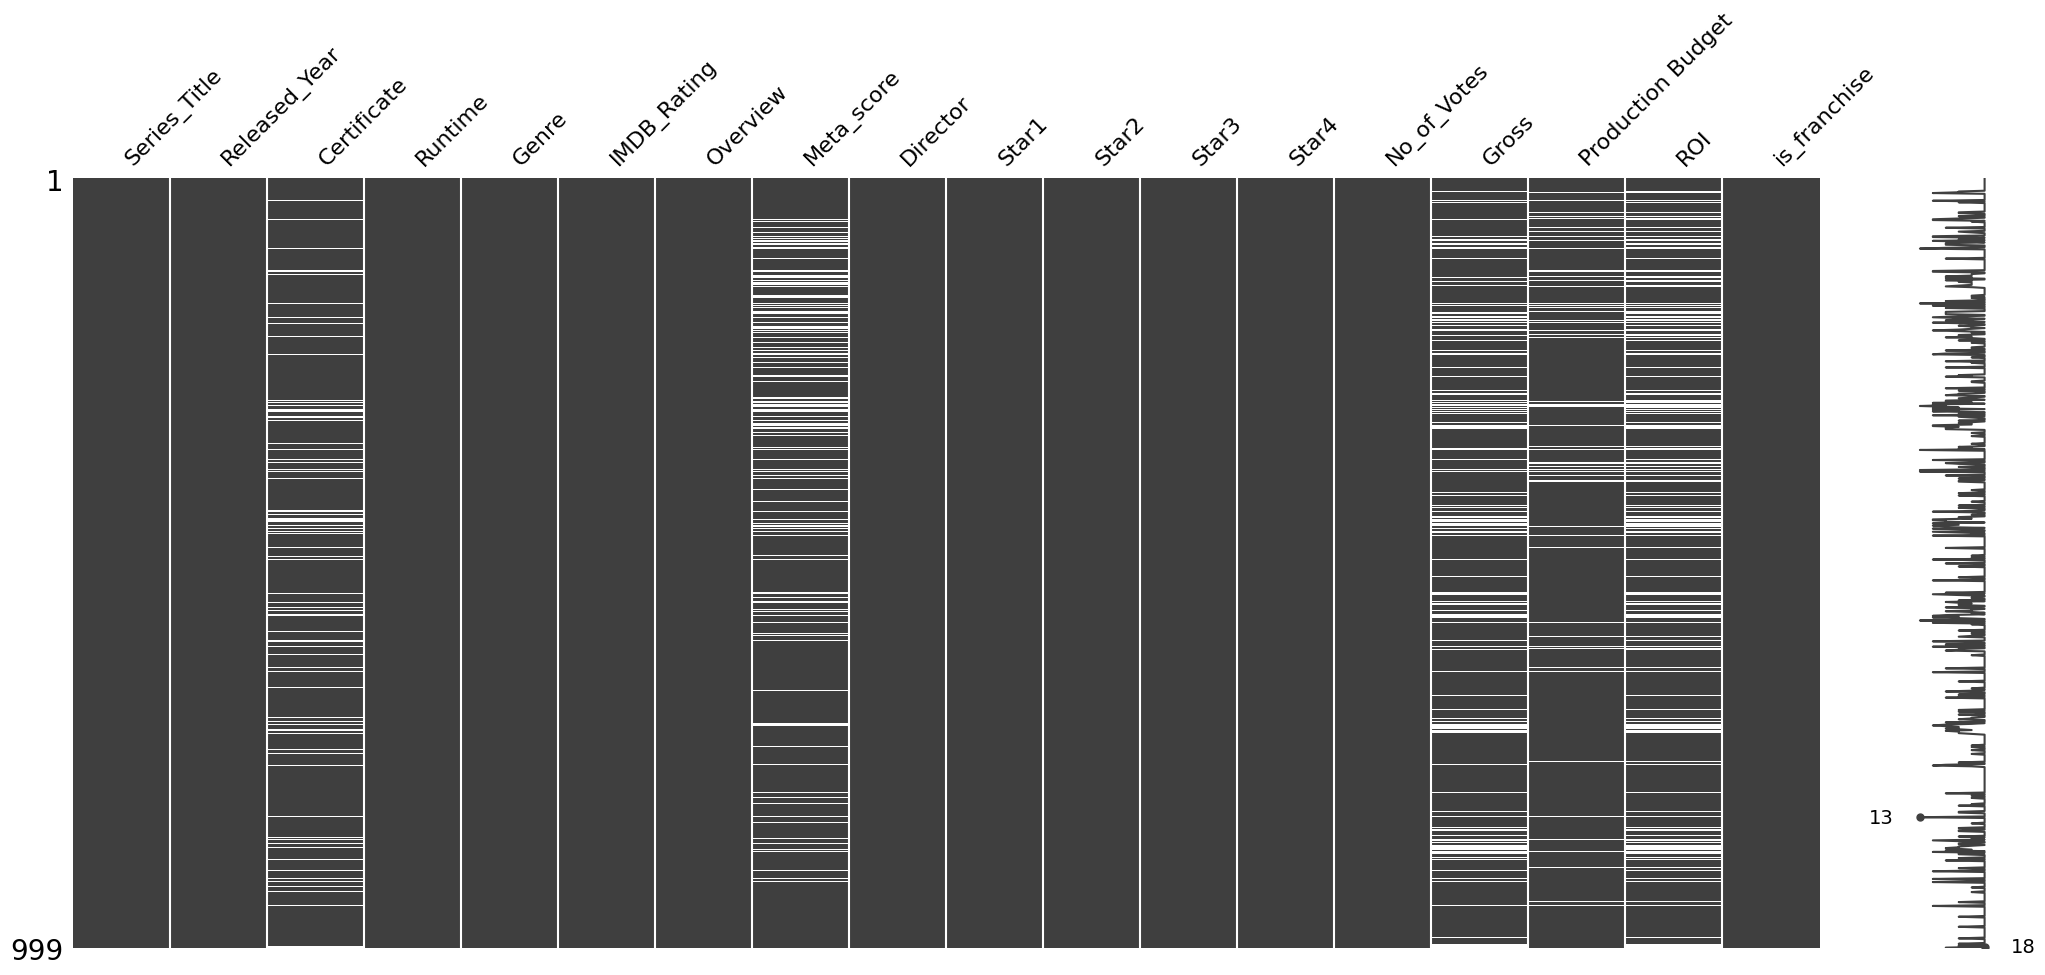

In [43]:
missingno.matrix(df_final);

A maioria das colunas est√° completa, o que √© √≥timo. No entanto, tr√™s delas t√™m uma quantidade consider√°vel de dados faltando. A coluna Gross (Faturamento) √© a que mais se destaca, com quase 17% dos dados ausentes. A de Meta_score tamb√©m tem uma porcentagem alta, com 15,7% de valores faltantes. A coluna Certificate (Classifica√ß√£o et√°ria) tem cerca de 10% de dados ausentes. Por fim, a variavel Production Budget com 7%.

Antes de qualquer an√°lise mais detalhada, principalmente as que envolvem o desempenho financeiro ou as avalia√ß√µes cr√≠ticas dos filmes, ser√° necess√°rio tratar esses dados que est√£o faltando:

* Gross e Budget: essencial, remover linhas faltantes ou buscar dados externos.

* ROI: recalcular ap√≥s preencher Gross/Budget.

* Meta_score: podemos preencher com a m√©dia ou a mediana, mas como nas an√°lises posteriores identificamos muitos outliers, usaremos a mediana, por ser mais robusta a valores extremos.

* Certificate: iremos preencher com a moda.

* Outras colunas: as que n√£o forem cr√≠ticas, podemos deixar missing.

In [44]:
# Remover linhas sem Gross ou Budget
df_clean = df_final.dropna(subset=["Gross", "Production Budget"]).copy()

# Recalcular ROI
df_clean["ROI"] = df_clean["Gross"] / df_clean["Production Budget"]

# Preencher Meta_score com mediana
df_clean["Meta_score"].fillna(df_clean["Meta_score"].median(), inplace=True)

# Preencher Certificate com valor mais frequente
df_clean["Certificate"].fillna(df_clean["Certificate"].mode()[0], inplace=True)

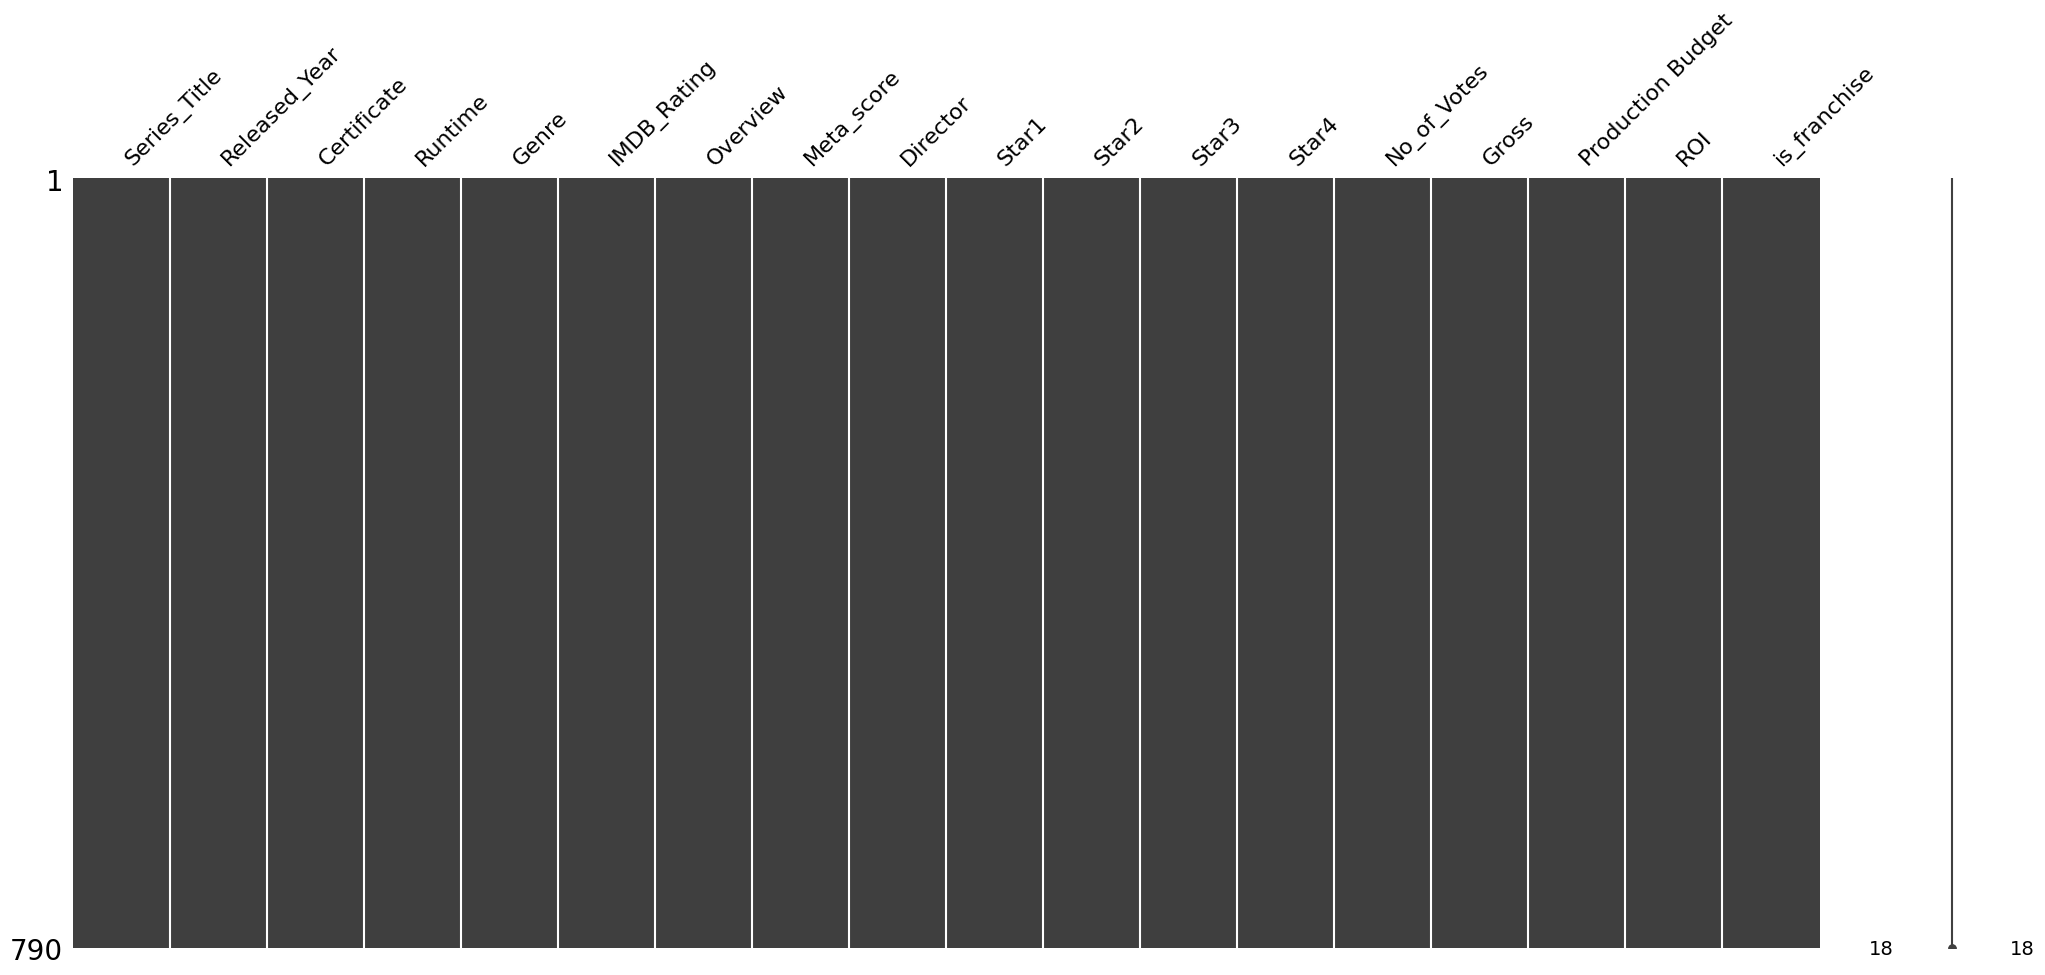

In [45]:
missingno.matrix(df_clean);

In [46]:
# Visualizar o tamanho do dataframe
print(f"Entradas: {df_clean.shape[0]}")
print(f"Colunas: {df_clean.shape[1]}")

Entradas: 790
Colunas: 18


Removemos 209 entradas com valores vazios.

## 1.3 - Estat√≠sticas descritivas das vari√°veis num√©ricas

Vamos entender um pouco como as vari√°veis num√©ricas est√£o se comportando

In [47]:
num_cols = ["IMDB_Rating", "Meta_score", "Runtime", "No_of_Votes", "Gross", "Production Budget", "ROI"]
df_clean[num_cols].describe()

IMDB_Rating  Meta_score     Runtime   No_of_Votes         Gross  \
count   790.000000  790.000000  790.000000  7.900000e+02  7.900000e+02   
mean      7.939494   77.420253  123.949367  3.222348e+05  7.120476e+07   
std       0.279389   12.053875   27.547631  3.408760e+05  1.116031e+08   
min       7.600000   28.000000   45.000000  2.508800e+04  1.305000e+03   
25%       7.700000   71.000000  104.000000  7.544125e+04  4.069150e+06   
50%       7.900000   78.000000  120.000000  1.981540e+05  2.579460e+07   
75%       8.100000   86.000000  137.000000  4.599180e+05  8.972977e+07   
max       9.200000  100.000000  242.000000  2.303232e+06  9.366622e+08   

       Production Budget         ROI  
count       7.900000e+02  790.000000  
mean        6.786121e+07    3.670244  
std         1.047504e+08    9.665604  
min         2.700000e+04    0.000009  
25%         8.000000e+06    0.216313  
50%         2.800000e+07    1.362384  
75%         7.500000e+07    3.288792  
max         5.332000e+08  153.795302

Com essa estat√≠stica descritiva, notamos que o p√∫blico concorda mais sobre as notas do que os cr√≠ticos. A bilheteria m√©dia √© um pouco menor que o or√ßamento, mas h√° uma enorme diferen√ßa entre filmes de sucesso e fracassos financeiros. A popularidade tamb√©m varia muito, com alguns filmes tendo milh√µes de votos e outros poucos.

A dura√ß√£o dos filmes, varia drasticamente de 45 a 242 minutos. Isso mostra que o conjunto de dados inclui desde filmes curtos at√© produ√ß√µes muito longas.

A an√°lise do ROI (Retorno sobre o Investimento) mostra que a ind√∫stria do cinema √© um jogo de alto risco com potencial de alto retorno. Embora a m√©dia de lucro pare√ßa positiva, ela √© puxada para cima por alguns poucos grandes sucessos. A realidade √© que, para cada filme que d√° um lucro gigantesco, muitos outros geram pouco retorno ou acabam em preju√≠zo, como indicam os valores negativos.

## 1.4 - Histograma das vari√°veis num√©ricas

Nos histogramas que vamos criar a seguir iremos em busca de entender qual o padr√£o de comportamento de cada vari√°vel, como a maioria das notas, a dura√ß√£o ou a bilheteria dos filmes.

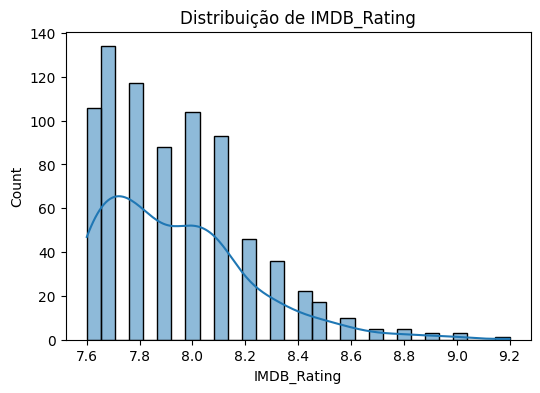

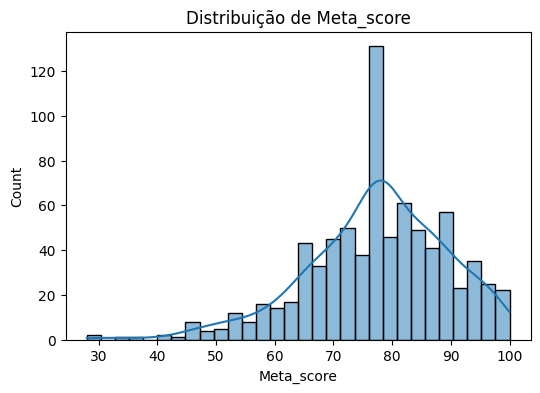

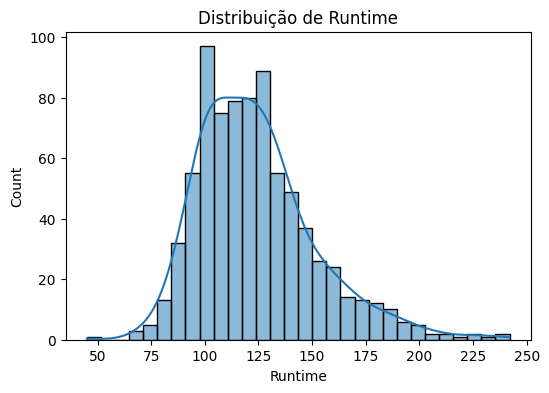

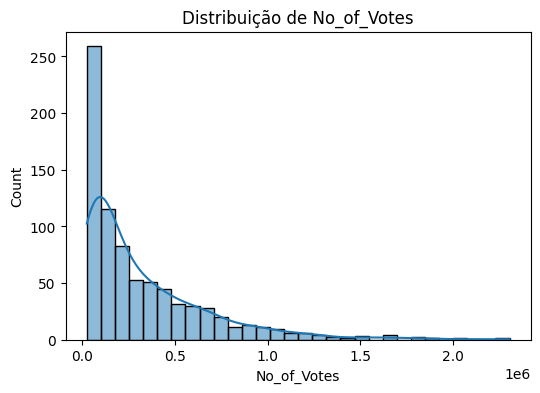

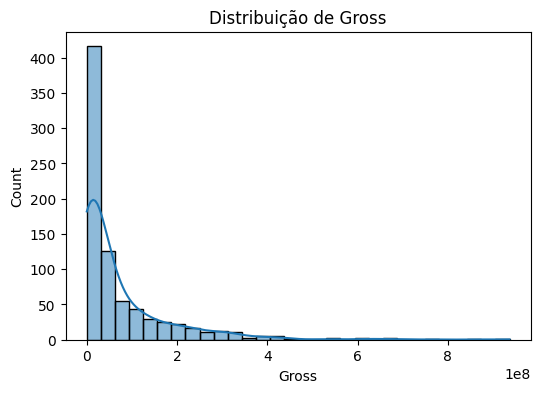

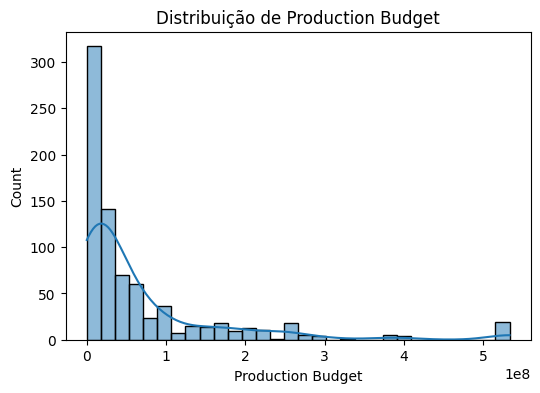

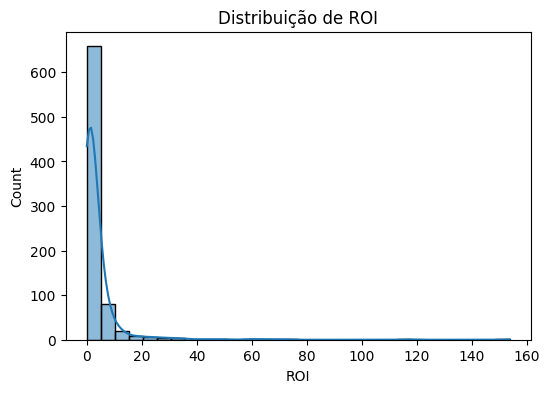

In [48]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_clean[col].dropna(), bins=30, kde=True)
    plt.title(f"Distribui√ß√£o de {col}")
    plt.show()

O histograma da nota IMDB nos mostra que todos os filmes dessa lista s√£o muito bem avaliados, com notas que v√£o de 7.6 a 9.2. O mais interessante √© que as notas n√£o seguem um padr√£o √∫nico. Em vez de se agruparem em um s√≥ ponto, elas se concentram em duas faixas principais, uma em torno de 7.7 e outra em 8.0. Isso mostra que, mesmo dentro de um grupo de filmes de alta qualidade, a distribui√ß√£o de notas n√£o √© uniforme.

Pelo histograma das notas da cr√≠tica, vemos que variam bem mais do que as do p√∫blico, indo de notas baixas at√© a pontua√ß√£o m√°xima de 100. A maioria dos filmes recebeu notas altas, entre 75 e 85. No entanto, o fato de ter uma cauda longa para as notas mais baixas mostra que alguns filmes, mesmo estando nesta lista, n√£o agradaram tanto aos cr√≠ticos.

O histograma do tempo de dura√ß√£o dos fimes, mostra que a maioria dura entre 100 e 110 minutos, o que √© o padr√£o em cinema. A dura√ß√£o dos filmes varia bastante, com alguns bem curtos e outros que passam das 4 horas, mas s√£o as exce√ß√µes.

No histograma da bilheteria, mesmo sendo filmes bem avaliados, a maioria n√£o fez uma bilheteria gigantesca. Na verdade, a grana se concentrou em poucos filmes que foram sucessos enormes, os chamados "blockbusters", que esticam o gr√°fico e fazem a m√©dia subir.

Assim como no histograma de bilheteria, este mostra que a maioria dos filmes tem um or√ßamento modesto. S√≥ que uma pequena parte das produ√ß√µes √© que custa muito caro, na casa das centenas de milh√µes de d√≥lares. O formato do gr√°fico √© bem parecido com o da bilheteria, o que sugere que, geralmente, or√ßamentos menores resultam em bilheterias menores, enquanto os grandes or√ßamentos miram bilheterias gigantescas.

O ROI nos demonstra que a qualidade art√≠stica n√£o garante sucesso financeiro. O sucesso estrondoso, com bilheteria e ROI gigantescos, √© um evento raro, limitado a uma pequena porcentagem dos filmes, que se destacam como outliers.

## 1.5 - Boxplots para identificar outliers

Vamos visualizar alguns boxplots com a inten√ß√£o de ter uma vis√£o r√°pida de como as notas, os or√ßamentos e as bilheterias se distribuem e identificar a presen√ßa de filmes que fogem muito do padr√£o.

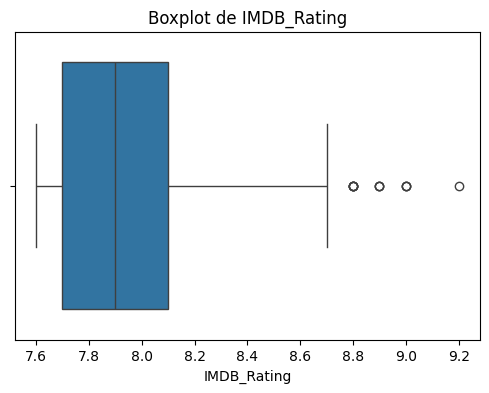

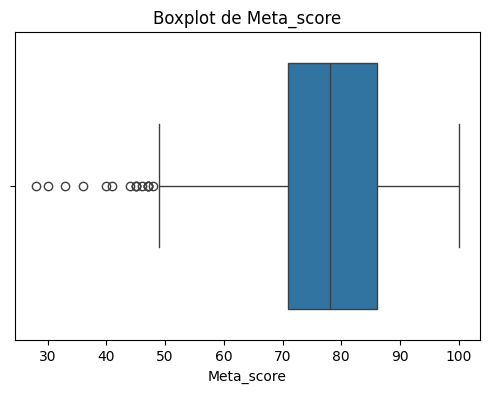

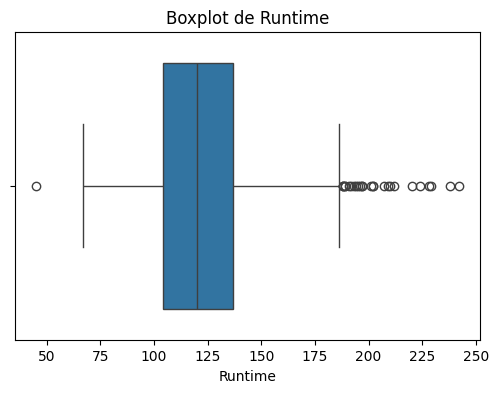

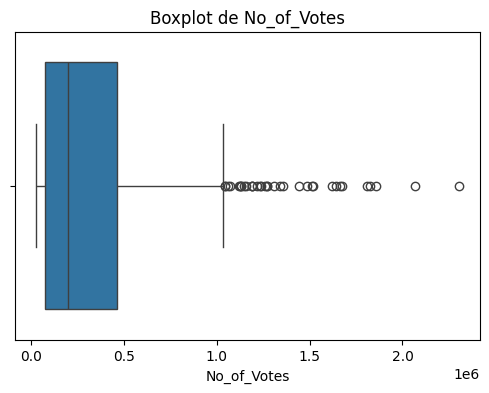

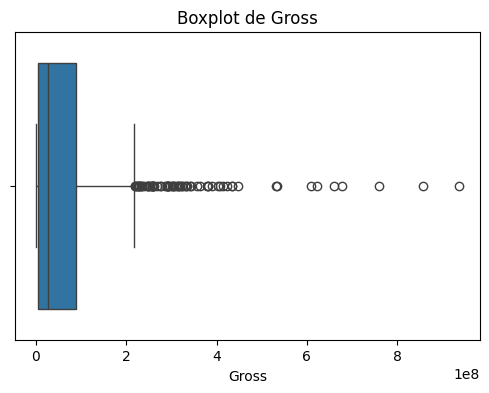

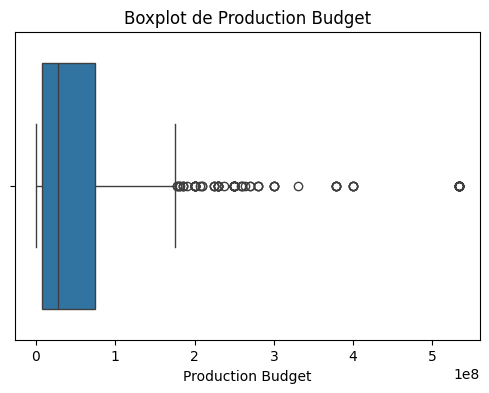

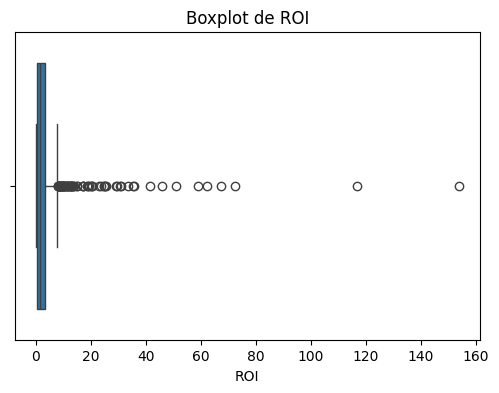

In [49]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_clean[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

* Para bilheteria, or√ßamento, votos e ROI, a maioria dos filmes fica com valores baixos. J√° os grandes sucessos s√£o poucos, mas se destacam tanto que criam uma enorme diferen√ßa nos dados.

* J√° nas avalia√ß√µes (tanto do p√∫blico quanto da cr√≠tica), a maioria dos filmes tem notas altas. A principal diferen√ßa √© que o p√∫blico quase n√£o d√° notas baixas, enquanto os cr√≠ticos ocasionalmente d√£o.

N√£o vamos precisar remover os outliers neste caso. Eles n√£o s√£o erros nos dados, pelo contr√°rio, representam os valores reais de grandes sucessos e produ√ß√µes de alto or√ßamento que realmente ocorrem na ind√∫stria. Por isso, s√£o informa√ß√µes importantes para o nosso estudo.

## 1.6 - Vari√°veis categ√≥ricas

Agora vamos ver alguns gr√°ficos para termos uma vis√£o geral de que tipo de filmes estamos lidando, antes de aprofundar nas an√°lises.

In [50]:
cat_cols = ["Certificate", "Genre", "Director"]

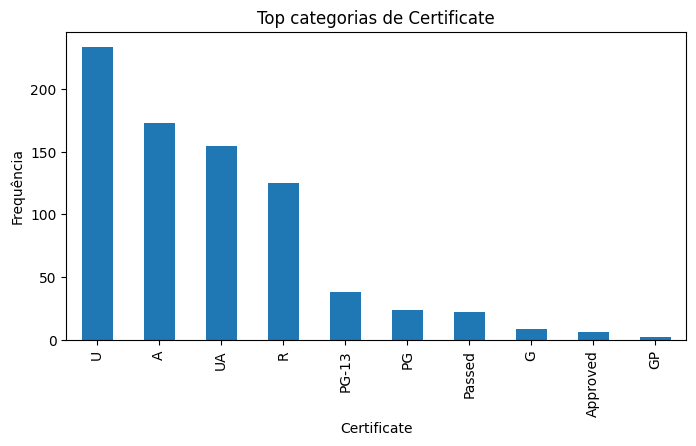

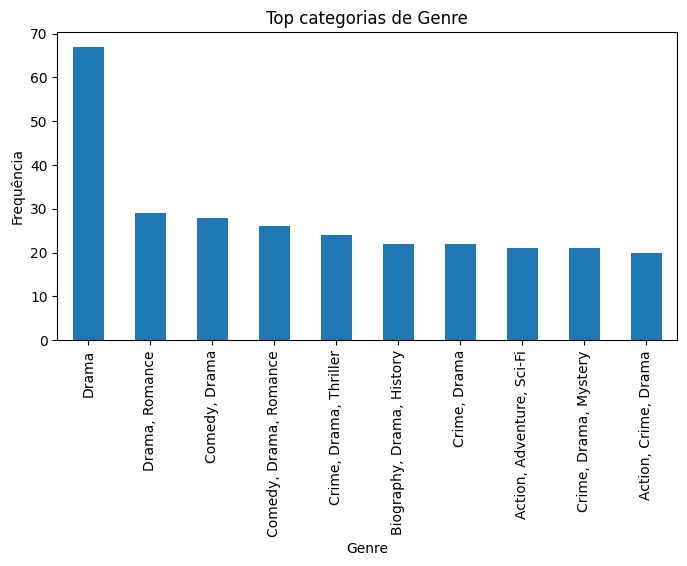

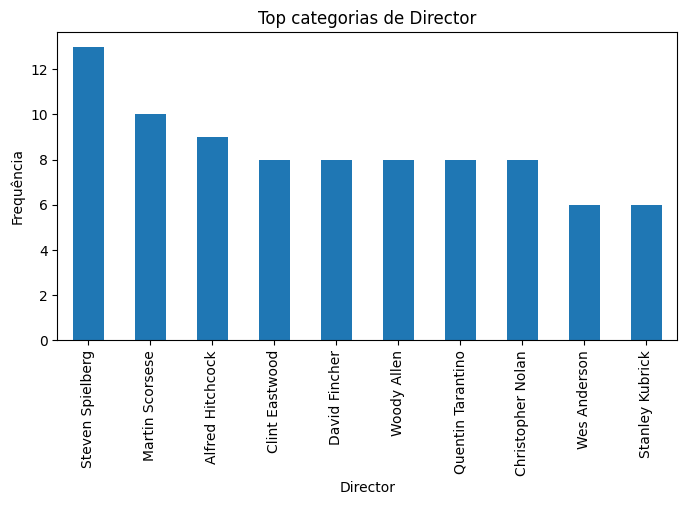

In [51]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    df_clean[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top categorias de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequ√™ncia")
    plt.show()

*Certificado*

Existe uma boa variedade de certificados de censura, o que indica que os filmes v√™m de v√°rios lugares diferentes. As classifica√ß√µes mais comuns s√£o para o p√∫blico geral, mostrando que o acervo tem filmes para todos os gostos.

*G√™nero*

O g√™nero Drama √© o que mais aparece na lista, muitas vezes misturado com outros como Romance e Com√©dia. Isso mostra que o publico est√° cheia de pessoas que gostam de filmes com temas mais s√©rios.

*Diretores*

A lista dos diretores mais frequentes √© um show √† parte, com nomes como Alfred Hitchcock e Steven Spielberg no topo. Ou seja, a cole√ß√£o √© repleta de filmes feitos por diretores muito famosos e respeitados.

## 1.7 - Vari√°vel textual

Vamos criar um histograma com o tamanho das reviews, pois ajudam a ver padr√£o de descri√ß√µes

In [52]:
df_clean["overview_len"] = df_clean["Overview"].fillna("").apply(len)
print(df_clean["overview_len"].describe())

count    790.000000
mean     147.916456
std       43.626344
min       40.000000
25%      116.000000
50%      143.000000
75%      174.000000
max      313.000000
Name: overview_len, dtype: float64


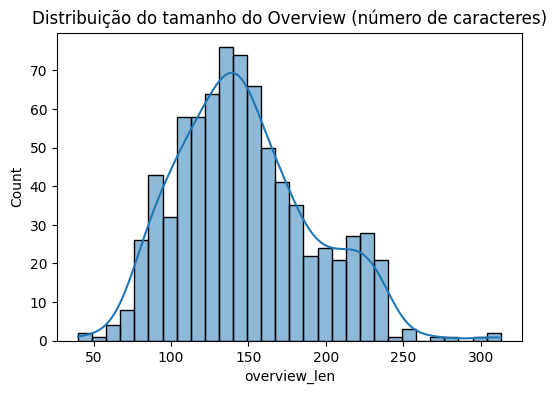

In [53]:
plt.figure(figsize=(6,4))
sns.histplot(df_clean["overview_len"], bins=30, kde=True)
plt.title("Distribui√ß√£o do tamanho do Overview (n√∫mero de caracteres)")
plt.show()

De maneira geral, a maioria dos resumos dos filmes tem um tamanho bem consistente, com cerca de 140 a 150 caracteres. Isso mostra que o padr√£o √© ter um texto de um tamanho padronizado.

Embora o tamanho m√©dio seja previs√≠vel, h√° uma varia√ß√£o consider√°vel, com alguns resumos bem curtos e outros bem longos.

## 1.8 - Vari√°vel Booleana

Agora vamos analisar quantos filmes do nosso conjunto pertencem a franquias.

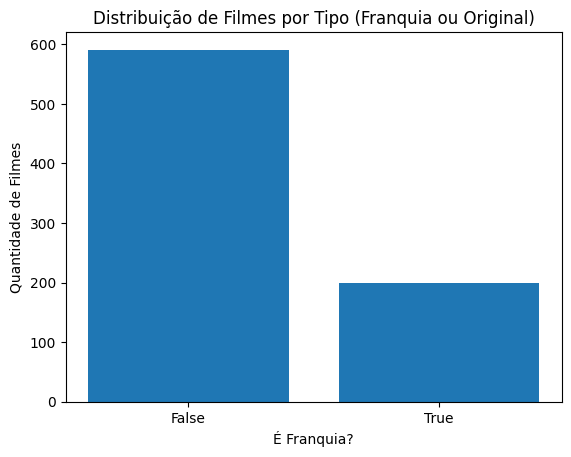

In [54]:
# Contagem dos valores da vari√°vel booleana
counts = df_clean["is_franchise"].value_counts()

# Criando o gr√°fico de barras
plt.bar(counts.index.astype(str), counts.values)
plt.title("Distribui√ß√£o de Filmes por Tipo (Franquia ou Original)")
plt.xlabel("√â Franquia?")
plt.ylabel("Quantidade de Filmes")
plt.show()

O gr√°fico nos mostra que a grande maioria dos filmes n√£o fazem parte de uma franquia. Eles s√£o obras originais ou √∫nicas, o que √© uma caracter√≠stica importante do conjunto.

# 2 - An√°lise Multivariada

Agora vamos analisar como as vari√°veis se relacionam entre si.

## 2.1 - Rela√ß√£o entre Or√ßamento (Budget) e Bilheteria (Gross)

Aqui queremos entender se filmes com or√ßamento maior tendem a ter maior bilheteria. Ou seja, existe correla√ß√£o entre quanto se investe e quanto se arrecada?

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


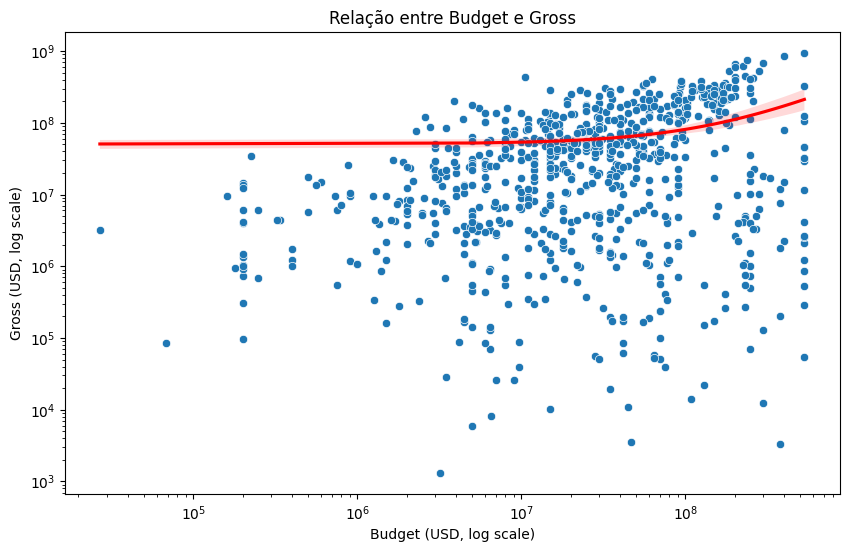

In [55]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x="Production Budget", y="Gross")
sns.regplot(data=df_clean, x="Production Budget", y="Gross", scatter=False, color="red")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Budget (USD, log scale)")
plt.ylabel("Gross (USD, log scale)")
plt.title("Rela√ß√£o entre Budget e Gross")
plt.show();

O gr√°fico de dispers√£o entre or√ßamento e bilheteria mostra que, de modo geral, quanto maior o or√ßamento, maior a bilheteria. Filmes de baixo or√ßamento apresentam resultados muito variados, podendo ter tanto bilheterias baixas quanto surpreendentemente altas, representando risco e oportunidade. J√° filmes com or√ßamentos altos tendem a ter bilheterias elevadas de forma mais previs√≠vel, com menor risco de fracasso financeiro.

Para confirmar as observa√ß√µes do gr√°fico, vamos realizar um teste de hip√≥teses.

Hip√≥teses:

* H0 (nula): N√£o existe correla√ß√£o entre Budget e Gross.

* H1 (alternativa): Existe correla√ß√£o positiva entre Budget e Gross.

In [56]:
# Calcula correla√ß√£o
corr, p_value = pearsonr(df_clean["Production Budget"], df_clean["Gross"])

# Imprime resultado
print(f"Correla√ß√£o: {corr:.2f}, p-valor: {p_value:.4f}")

# Interpreta√ß√£o do teste
alpha = 0.05  # n√≠vel de signific√¢ncia
if p_value < alpha:
    print("Resultado: Rejeitamos H0 ‚Üí Existe correla√ß√£o significativa entre Budget e Gross.")
else:
    print("Resultado: N√£o rejeitamos H0 ‚Üí N√£o h√° evid√™ncia de correla√ß√£o significativa entre Budget e Gross.")

Correla√ß√£o: 0.28, p-valor: 0.0000
Resultado: Rejeitamos H0 ‚Üí Existe correla√ß√£o significativa entre Budget e Gross.


Com base no teste de Pearson, confirmamos a observa√ß√£o feita pelo gr√°fico de dispers√£o, filmes com or√ßamentos maiores tendem a apresentar bilheterias mais altas.

## 2.2 - Qual g√™nero tem maior ROI m√©dio?

Aqui queremos entender quais g√™neros s√£o mais lucrativos proporcionalmente ao investimento.

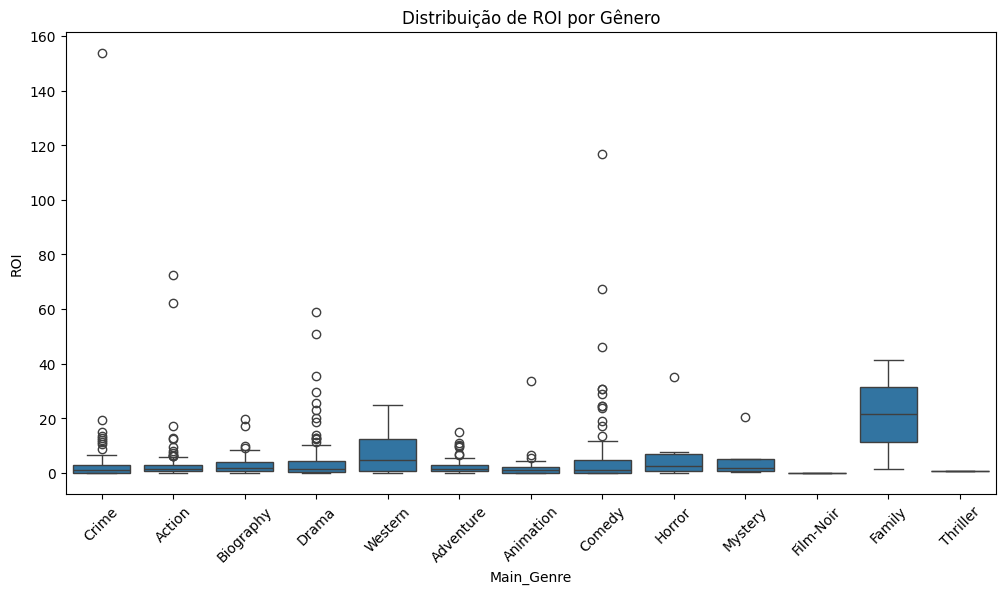

In [57]:
# Considerando o que g√™nero principal √© o da primeira posi√ß√£o
df_clean["Main_Genre"] = df_clean["Genre"].str.split(",").str[0]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean, x="Main_Genre", y="ROI")
plt.xticks(rotation=45)
plt.title("Distribui√ß√£o de ROI por G√™nero")
plt.show()

Na maioria dos casos, os filmes apresentam retorno n√£o t√£o alto, independentemente do g√™nero. Embora ocorram retornos muito altos em eventos raros, representados pelos outliers. O g√™nero 'Fam√≠lia' √© o que se destaca, apresentando o ROI m√©dio mais alto e consistente em compara√ß√£o aos outros g√™neros.

Vamos usar um teste ANOVA, para confirmamos que o ROI m√©dio do genero 'Familia' √© mais alto que os demais.

Hip√≥teses:

* H0: Todos os g√™neros t√™m o mesmo ROI m√©dio.

* H1: Pelo menos um g√™nero tem ROI m√©dio diferente.

Para usar o ANOVA o ROI de cada g√™nero deve seguir aproximadamente uma distribui√ß√£o normal.

Para isso vamos usar o teste de Shapiro, onde:

* H0: os dados s√£o normais.

* Se p > 0.05, n√£o rejeitamos H0 (dados parecem normais).

* Se p ‚â§ 0.05, rejeitamos H0 (dados n√£o s√£o normais).

In [58]:
for name, group in df_clean.groupby("Main_Genre"):
    stat, p_value = shapiro(group["ROI"].dropna())
    print(f"G√™nero: {name}, p-valor: {p_value:.4f}")

G√™nero: Action, p-valor: 0.0000
G√™nero: Adventure, p-valor: 0.0000
G√™nero: Animation, p-valor: 0.0000
G√™nero: Biography, p-valor: 0.0000
G√™nero: Comedy, p-valor: 0.0000
G√™nero: Crime, p-valor: 0.0000
G√™nero: Drama, p-valor: 0.0000
G√™nero: Family, p-valor: nan
G√™nero: Film-Noir, p-valor: nan
G√™nero: Horror, p-valor: 0.0001
G√™nero: Mystery, p-valor: 0.0006
G√™nero: Thriller, p-valor: nan
G√™nero: Western, p-valor: 0.1985


Como podemos ver, quase nenhum grupo segue uma normal, por isso vamos usar o teste de Kruskal

S√≥ por desencargo de consci√™ncia, vamos testar tamb√©m a homogeneidade das vari√¢ncias dos dados. Vale lembrar que, como eles n√£o seguem uma distribui√ß√£o normal, esse teste n√£o seria obrigat√≥rio.

Para isso, iremos usar o test de levene, onde:

* H0: as vari√¢ncias s√£o iguais.

* Se p > 0.05, n√£o rejeitamos H0 (vari√¢ncias homog√™neas).

* Se p ‚â§ 0.05, rejeitamos H0 (vari√¢ncias diferentes).

In [59]:
groups = [group["ROI"].dropna() for name, group in df_clean.groupby("Main_Genre")]
stat, p_value = levene(*groups)
print(f"Levene Test - stat: {stat:.2f}, p-valor: {p_value:.4f}")

Levene Test - stat: 1.70, p-valor: 0.0631


Como temos um p-valor, maior que 0.05, podemos concluir que as variancias s√£o homog√™neas.

Usando o teste de Kruskal

In [60]:
# Agrupando ROI por g√™nero principal
groups = [group["ROI"].dropna() for name, group in df_clean.groupby("Main_Genre")]

# Rodando ANOVA
stat, p_value = kruskal(*groups)
print(f"F-statistic: {stat:.2f}, p-valor: {p_value:.4f}")

# Interpreta√ß√£o do teste
alpha = 0.05  # n√≠vel de signific√¢ncia
if p_value < alpha:
    print("Resultado: Rejeitamos H0 ‚Üí Existe diferen√ßa significativa do ROI entre os g√™neros.")
else:
    print("Resultado: N√£o rejeitamos H0 ‚Üí N√£o h√° evid√™ncia de diferen√ßa significativa do ROI entre os g√™neros.")

F-statistic: 19.66, p-valor: 0.0739
Resultado: N√£o rejeitamos H0 ‚Üí N√£o h√° evid√™ncia de diferen√ßa significativa do ROI entre os g√™neros.


Ao contr√°rio do que sugeria o boxplot, o teste ANOVA n√£o encontrou evid√™ncias suficientes para afirmar que o ROI varia entre os g√™neros. Ou seja, o retorno sobre investimento parece ser, em m√©dia, parecido para todos os tipos de filmes.

## 2.3 - Impacto do tempo de filme (Runtime) no ROI

Buscamos saber se filmes mais longos t√™m maior ROI ou isso n√£o influencia?

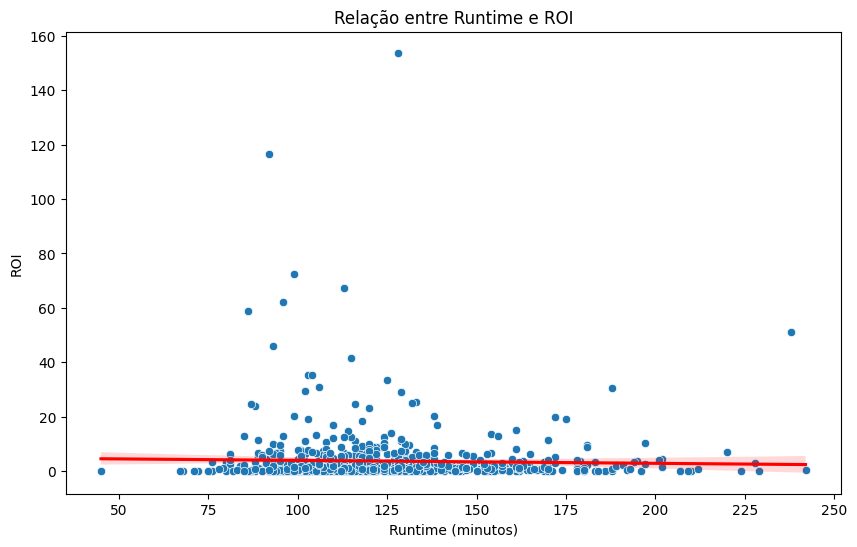

In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x="Runtime", y="ROI")
sns.regplot(data=df_clean, x="Runtime", y="ROI", scatter=False, color="red")
plt.xlabel("Runtime (minutos)")
plt.ylabel("ROI")
plt.title("Rela√ß√£o entre Runtime e ROI")
plt.show()

Podemos notar que n√£o existe uma rela√ß√£o clara entre o tempo de um filme e seu retorno financeiro. A dura√ß√£o n√£o √© um bom preditor de sucesso, j√° que tanto filmes curtos quanto longos podem ter ROI baixo ou alto.

Para confirmar ou n√£o o que podemos notar no gr√°fico, iremos realizar um teste de hipoteses, onde:

Hip√≥teses:

* H0: Runtime n√£o tem efeito sobre ROI.

* H1: Runtime influencia o ROI.

In [62]:
# Correla√ß√£o de Pearson
corr, p_value = pearsonr(df_clean["Runtime"], df_clean["ROI"])
print(f"Correla√ß√£o: {corr:.2f}, p-valor: {p_value:.4f}")

# Teste de hip√≥tese
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos H0: Existe evid√™ncia de correla√ß√£o significativa entre Runtime e ROI.")
else:
    print("N√£o rejeitamos H0: N√£o h√° evid√™ncia suficiente de correla√ß√£o entre Runtime e ROI.")

Correla√ß√£o: -0.03, p-valor: 0.3860
N√£o rejeitamos H0: N√£o h√° evid√™ncia suficiente de correla√ß√£o entre Runtime e ROI.


O teste de hip√≥teses confirma que n√£o h√° evid√™ncias de correla√ß√£o significativa entre a dura√ß√£o do filme e o retorno sobre investimento. Em outras palavras, o tempo de um filme n√£o influencia de forma relevante o seu desempenho financeiro.

## 2.4 - Efeito de diretores no ROI

Agora queremos descobrir se alguns diretores ou atores conseguem gerar maior ROI consistentemente?

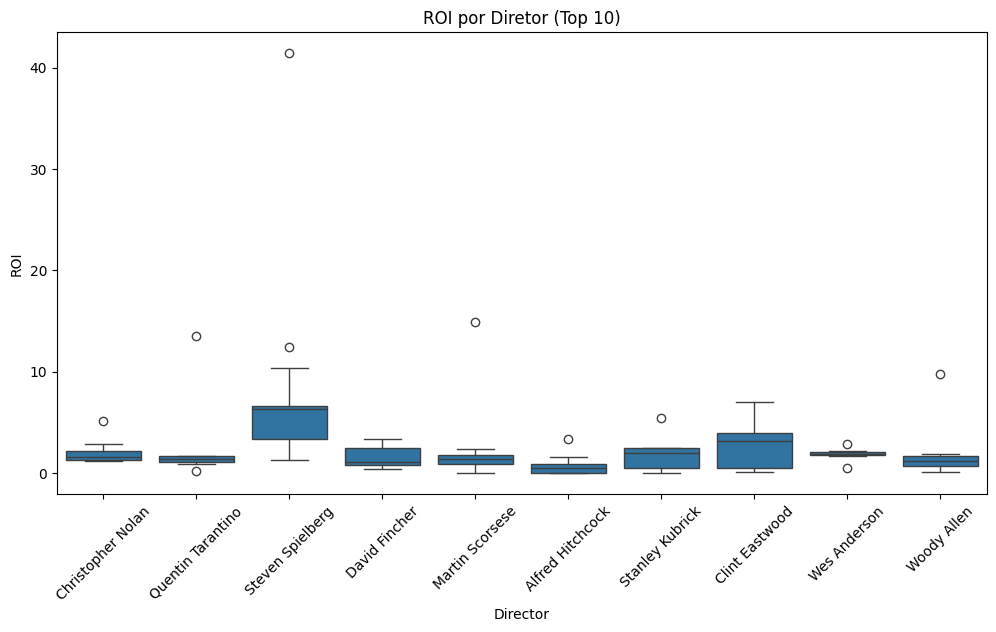

In [63]:
top_directors = df_clean["Director"].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean[df_clean["Director"].isin(top_directors)], x="Director", y="ROI")
plt.xticks(rotation=45)
plt.title("ROI por Diretor (Top 10)")
plt.show()

Podemos notar que, para a maioria deles, o retorno financeiro costuma ser n√£o t√£o alto, mesmo em casos de grande reconhecimento. Ainda assim, quase todos t√™m alguns filmes que fogem √† regra e alcan√ßam grande sucesso, evidenciados pelos outliers. Entre eles, Steven Spielberg se destaca, j√° que seus filmes apresentam, em m√©dia, ROI mais alto e consistente, al√©m de estar entre os que t√™m os maiores sucessos individuais.

Como no caso dos g√™neros, vamos testar a normalidade e variancia dos dados, para sabermos se usaremos o teste ANOVA ou Kruskal.

Vamos iniciar com o teste de shapiro para verificar as normalidades dos dados para cada diretor.

In [64]:
df_top = df_clean[df_clean["Director"].isin(top_directors)]
# Agrupar ROI por diretor
groups = [group["ROI"].dropna() for _, group in df_top.groupby("Director")]

In [65]:
normalidade = {}
for director, group in df_top.groupby("Director"):
    stat, p = shapiro(group["ROI"].dropna())
    normalidade[director] = p
    print(f"{director}: p-valor = {p:.4f}")

Alfred Hitchcock: p-valor = 0.0079
Christopher Nolan: p-valor = 0.0070
Clint Eastwood: p-valor = 0.3079
David Fincher: p-valor = 0.1590
Martin Scorsese: p-valor = 0.0000
Quentin Tarantino: p-valor = 0.0000
Stanley Kubrick: p-valor = 0.3733
Steven Spielberg: p-valor = 0.0001
Wes Anderson: p-valor = 0.4676
Woody Allen: p-valor = 0.0002


A maioria dos diretores apresenta distribui√ß√µes de ROI n√£o normais, como o ANOVA √© testes estat√≠sticos que assume normalidade, iremos usar novamente o teste Kruskal.

In [66]:
# Rodar Kruskal-Wallis
stat, p_value = kruskal(*groups)
print(f"Kruskal-Wallis: estat√≠stica = {stat:.2f}, p-valor = {p_value:.4f}")

# Interpreta√ß√£o autom√°tica
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos H‚ÇÄ: Pelo menos um diretor tem ROI m√©dio diferente.")
else:
    print("N√£o rejeitamos H‚ÇÄ: N√£o h√° evid√™ncia suficiente de diferen√ßa de ROI entre os diretores.")

Kruskal-Wallis: estat√≠stica = 25.41, p-valor = 0.0025
Rejeitamos H‚ÇÄ: Pelo menos um diretor tem ROI m√©dio diferente.


Como vimos nos gr√°ficos, o teste Kruskal-Wallis comprova que h√° diferen√ßas significativas no ROI m√©dio entre os diretores analisados. Ou seja, pelo menos um diretor apresenta um retorno sobre investimento diferente dos demais.

## 2.5 - Efeito dos atores no ROI

Aqui buscamos identificar se os atores principais dos filmes, tem alguma influ√™ncia no ROI, assim como fizemos para diretores, mas temos um problema, como s√£o v√°rias colunas de atores (Star1, Star2, Star3, Star4), o que iremos fazer para contornar isso √© "desempilhar" fazer um melt esses dados em uma √∫nica coluna chamada, por exemplo, "Actor". Assim iremos junta todos os atores em uma lista √∫nica, mantendo o ROI associado ao filme.

In [67]:
# Reorganizar colunas de atores
actors_df = df_clean.melt(
    id_vars=["ROI"], 
    value_vars=["Star1", "Star2", "Star3", "Star4"], 
    var_name="Star_Position", 
    value_name="Actor"
)

In [68]:
# Filtrar top 10 atores mais frequentes
top_actors = actors_df["Actor"].value_counts().head(10).index
actors_top_df = actors_df[actors_df["Actor"].isin(top_actors)]

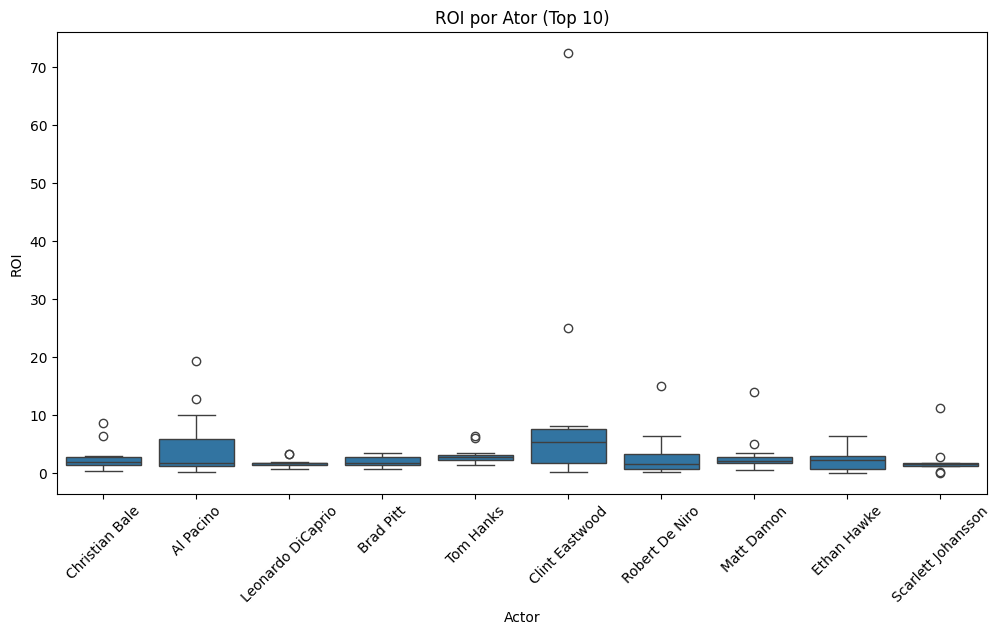

In [69]:
# Visualiza√ß√£o
plt.figure(figsize=(12,6))
sns.boxplot(data=actors_top_df, x="Actor", y="ROI")
plt.xticks(rotation=45)
plt.title("ROI por Ator (Top 10)")
plt.show()

Os boxplots nos mostram que os filmes de Clint Eastwood se destacam, com ROI m√©dio mais alto e consistente, al√©m de incluir alguns dos maiores sucessos individuais. Mesmo para os atores mais famosos, um retorno elevado √© a exce√ß√£o, n√£o a regra, com poucos filmes sendo os respons√°veis por gerar os maiores lucros.

Vamor novamente testar a normalidade e variancia dos dados, assim com fizemos para os diretores.

In [70]:
normalidade = {}
for actor, group in actors_top_df.groupby("Actor"):
    stat, p_value = shapiro(group["ROI"].dropna())
    normalidade[actor] = p_value
    print(f"{actor}: p-valor = {p_value:.4f}")

alpha = 0.05
for actor, p_value in normalidade.items():
    if p_value > alpha:
        print(f"{actor}: distribui√ß√£o do ROI parece normal.")
    else:
        print(f"{actor}: distribui√ß√£o do ROI N√ÉO √© normal.")

Al Pacino: p-valor = 0.0030
Brad Pitt: p-valor = 0.7701
Christian Bale: p-valor = 0.0040
Clint Eastwood: p-valor = 0.0000
Ethan Hawke: p-valor = 0.1909
Leonardo DiCaprio: p-valor = 0.0633
Matt Damon: p-valor = 0.0000
Robert De Niro: p-valor = 0.0002
Scarlett Johansson: p-valor = 0.0001
Tom Hanks: p-valor = 0.0038
Al Pacino: distribui√ß√£o do ROI N√ÉO √© normal.
Brad Pitt: distribui√ß√£o do ROI parece normal.
Christian Bale: distribui√ß√£o do ROI N√ÉO √© normal.
Clint Eastwood: distribui√ß√£o do ROI N√ÉO √© normal.
Ethan Hawke: distribui√ß√£o do ROI parece normal.
Leonardo DiCaprio: distribui√ß√£o do ROI parece normal.
Matt Damon: distribui√ß√£o do ROI N√ÉO √© normal.
Robert De Niro: distribui√ß√£o do ROI N√ÉO √© normal.
Scarlett Johansson: distribui√ß√£o do ROI N√ÉO √© normal.
Tom Hanks: distribui√ß√£o do ROI N√ÉO √© normal.


A maioria dos atores apresenta distribui√ß√µes de ROI n√£o normais, testes n√£o param√©tricos podem ser mais adequados, por isso usaremos o teste Kruskal.

In [71]:
# Teste estat√≠stico Kruskal-Wallis
groups = [group["ROI"].dropna() for name, group in actors_top_df.groupby("Actor")]
stat, p_value = kruskal(*groups)
print(f"F-statistic: {stat:.2f}, p-valor: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Rejeitamos H0: Pelo menos um ator tem ROI m√©dio diferente.")
else:
    print("N√£o rejeitamos H0: N√£o h√° evid√™ncia suficiente de diferen√ßa de ROI entre os atores.")

F-statistic: 10.48, p-valor: 0.3131
N√£o rejeitamos H0: N√£o h√° evid√™ncia suficiente de diferen√ßa de ROI entre os atores.


O teste nos indicou que n√£o h√° evid√™ncias suficientes para afirmar que o ROI m√©dio difere entre os atores analisados. Em outras palavras, o retorno sobre investimento parece ser, em m√©dia, semelhante para todos eles.

## 2.6 - Avaliar rela√ß√£o entre IMDB_Rating e ROI

Queremos aqui avaliar se filmes bem avaliados t√™m maior ROI?

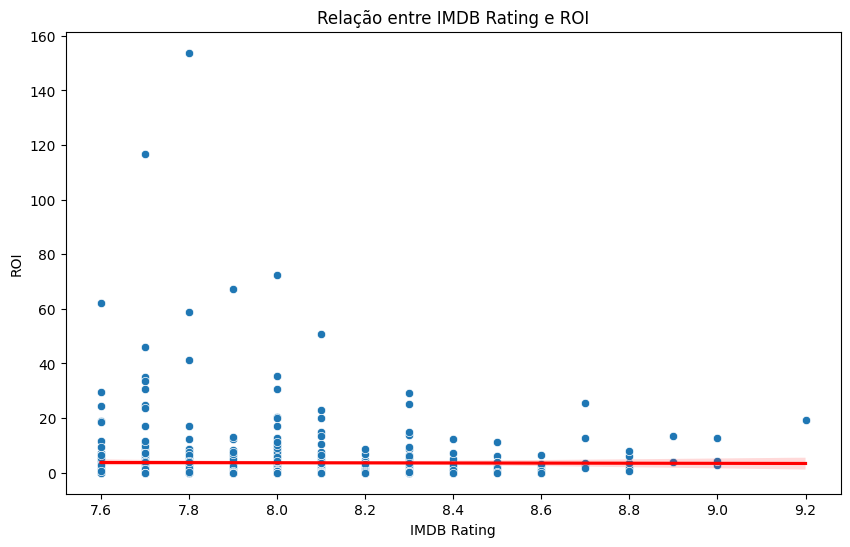

In [72]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x="IMDB_Rating", y="ROI")
sns.regplot(data=df_clean, x="IMDB_Rating", y="ROI", scatter=False, color="red")
plt.xlabel("IMDB Rating")
plt.ylabel("ROI")
plt.title("Rela√ß√£o entre IMDB Rating e ROI")
plt.show()

O gr√°fico mostra que n√£o h√° uma rela√ß√£o clara entre a avalia√ß√£o do p√∫blico e o retorno financeiro. Filmes com notas semelhantes podem ter ROI muito diferentes, e a maioria dos filmes apresenta retorno n√£o t√£o alto. Os poucos casos de ROI elevado s√£o raros e acontecem independentemente da nota, indicando que a percep√ß√£o de qualidade n√£o garante sucesso financeiro.

## 2.7 - Ser franquia influencia no ROI?

Aqui queremos investigar se filmes de franquia apresent√£o um retorno de investimento maior.

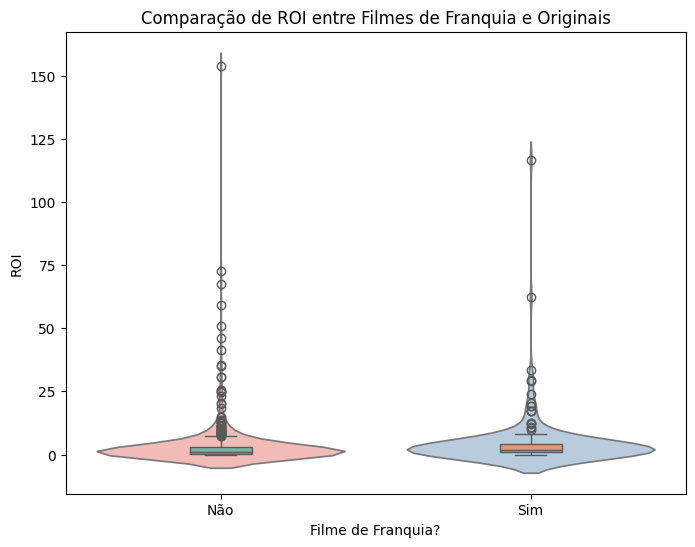

In [73]:
plt.figure(figsize=(8,6))

# Violino para mostrar distribui√ß√£o
sns.violinplot(data=df_clean, x="is_franchise", y="ROI", inner=None, palette="Pastel1")

# Boxplot por cima do violino
sns.boxplot(data=df_clean, x="is_franchise", y="ROI", width=0.2, palette="Set2")

plt.xlabel("Filme de Franquia?")
plt.ylabel("ROI")
plt.xticks([0,1], ["N√£o", "Sim"])
plt.title("Compara√ß√£o de ROI entre Filmes de Franquia e Originais")
plt.show()

Com o gr√°fico podemops notar que na maioria dos casos, ambos t√™m retorno financeiro baixo. Ainda assim, tanto filmes originais quanto de franquia podem se tornar grandes sucessos, j√° que existem alguns outliers com ROI muito alto. Filmes originais tendem a ter uma concentra√ß√£o maior de retornos baixos, mas tamb√©m incluem os casos de ROI mais elevados.

# 3 - An√°lise Multivariada (IMDB)

## 3.1 - Rela√ß√£o entre Or√ßamento (Budget) e IMDB Rating

Queremos entender se filmes com or√ßamento maior tendem a receber notas mais altas no IMDB. Se existe correla√ß√£o entre quanto se investe e a avalia√ß√£o do p√∫blico?

Para confirmar ou n√£o, o que estamos buscando, al√©m da visualiza√ß√£o gr√°fica, vamos fazer um teste de hipoteses.

Hipoteses:

* H0: N√£o existe correla√ß√£o entre Budget e IMDB_Rating.

* H1: Existe correla√ß√£o significativa entre Budget e IMDB_Rating.

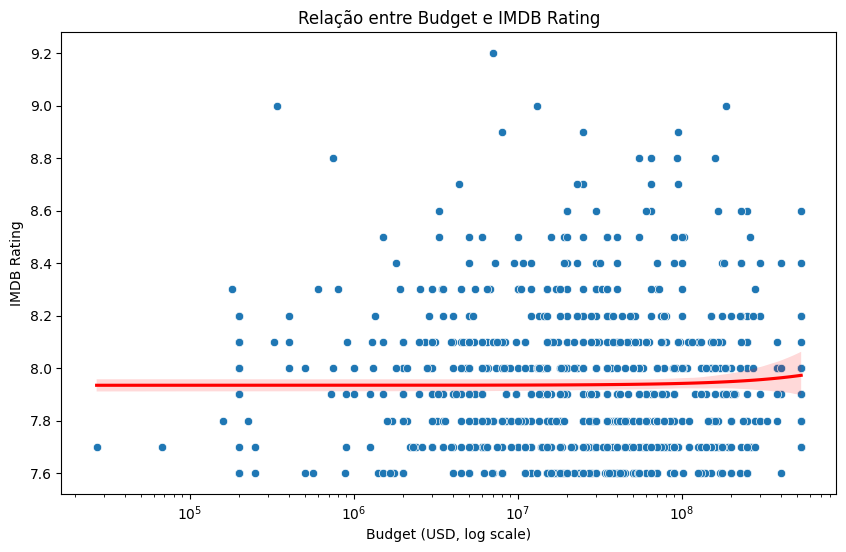

In [74]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x="Production Budget", y="IMDB_Rating")
sns.regplot(data=df_clean, x="Production Budget", y="IMDB_Rating", scatter=False, color="red")
plt.xscale("log")
plt.xlabel("Budget (USD, log scale)")
plt.ylabel("IMDB Rating")
plt.title("Rela√ß√£o entre Budget e IMDB Rating")
plt.show()

Segundo nosso gr√°fico, gastar mais n√£o garante nota alta no IMDB, filmes m√©dios equilibram risco e qualidade. O sucesso talvez depende mais de roteiro, dire√ß√£o, elenco e marketing, essa hipotese iremos testar mais aidante. Uma possivel estrat√©gia seria combinar filmes mid-budget de alto conceito, uma aposta maior com IP conhecida e projetos baratos de alto ROI.

In [75]:
corr, p_value = pearsonr(df_clean["Production Budget"].dropna(), df_clean["IMDB_Rating"].dropna())
if p_value < 0.05:
    print(f"Correla√ß√£o: {corr:.2f}, p-valor: {p_value:.4f} Rejeitamos H0, existe rela√ß√£o significativa")
else:
    print(f"Correla√ß√£o: {corr:.2f}, p-valor: {p_value:.4f} N√£o rejeitamos H0, n√£o h√° rela√ß√£o significativa")

Correla√ß√£o: 0.03, p-valor: 0.4540 N√£o rejeitamos H0, n√£o h√° rela√ß√£o significativa


N√£o h√° evid√™ncia estat√≠stica de rela√ß√£o entre o or√ßamento do filme e a nota do IMDB. Podemos confirmar agora que, gastar mais n√£o garante avalia√ß√µes melhores, fortlecendo a hipotese de que fatores como roteiro, dire√ß√£o e elenco t√™m mais impacto na nota do que o valor investido.

## 3.2 - Rela√ß√£o entre Runtime e IMDB Rating

Agora queremos saber se filmes mais longos tendem a ser melhor avaliados? Queremos analisar se o tempo de dura√ß√£o influencia as notas do IMDB.

Hip√≥teses:

* H0: Runtime n√£o tem efeito sobre IMDB_Rating.

* H1: Runtime influencia IMDB_Rating.

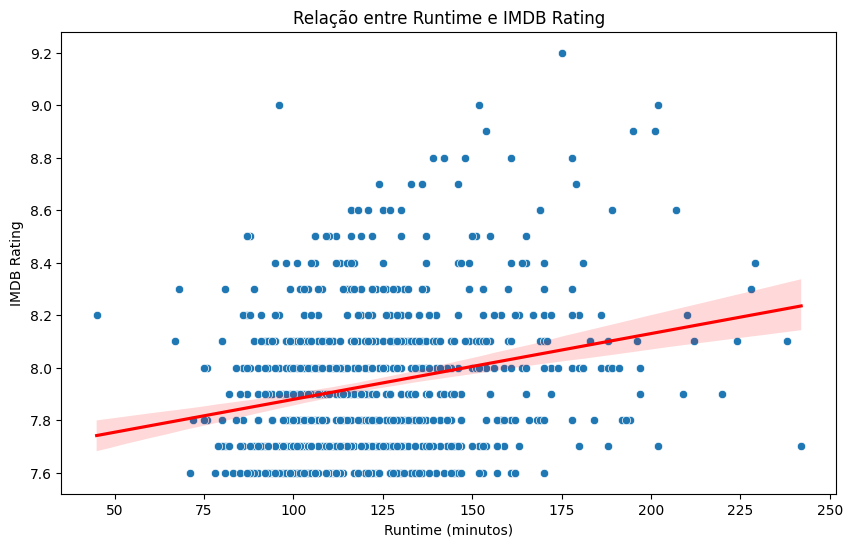

In [76]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x="Runtime", y="IMDB_Rating")
sns.regplot(data=df_clean, x="Runtime", y="IMDB_Rating", scatter=False, color="red")
plt.xlabel("Runtime (minutos)")
plt.ylabel("IMDB Rating")
plt.title("Rela√ß√£o entre Runtime e IMDB Rating")
plt.show()

In [77]:
corr, p_value = pearsonr(df_clean["Runtime"].dropna(), df_clean["IMDB_Rating"].dropna())
if p_value < 0.05:
    print(f"Correla√ß√£o: {corr:.2f}, p-valor: {p_value:.4f} Rejeitamos H0, existe rela√ß√£o significativa")
else:
    print(f"Correla√ß√£o: {corr:.2f}, p-valor: {p_value:.4f} N√£o rejeitamos H0, n√£o h√° rela√ß√£o significativa")

Correla√ß√£o: 0.25, p-valor: 0.0000 Rejeitamos H0, existe rela√ß√£o significativa


A partir do gr√°fico e do teste de Pearson, podemos confirmar que filmes mais longos tendem a ter notas um pouco maiores no IMDB, mas o efeito √© pequeno, n√£o √© porque um filme ganha 30 minutos a mais que a avalia√ß√£o dispara. Filmes entre 100 e 140 minutos parecem ser os mais bem avaliados, oferecendo tempo suficiente para desenvolver personagens e trama sem cansar o p√∫blico. Para a PProductions, o ideal √© evitar extremos: curtas demais podem parecer superficiais e longos demais podem cansar. A faixa recomendada √© de 110 a 150 minutos. 

An√°lisaremos tamb√©m conforme uma hipotese, onde o g√™nero dramas, √©picos e sci‚Äëfi podem ser mais longos, enquanto com√©dias e terror funcionam melhor mais curtos. Tentando entender se no fim, o importante √© como o tempo √© usado, com ritmo e arcos narrativos bem planejados.

## 3.3 - Efeito do g√™nero e tempo no IMDB Rating

Queremos ver se determinados g√™neros tendem a receber notas mais altas.

Como nos casos anteriores, para tornar nossa an√°lise mais robusta, vamos confirmar os resultados com um teste de hip√≥teses.

Hip√≥teses:

* H0: Todos os g√™neros t√™m o mesmo IMDB_Rating m√©dio.

* H1: Pelo menos um g√™nero tem IMDB_Rating m√©dio diferente.

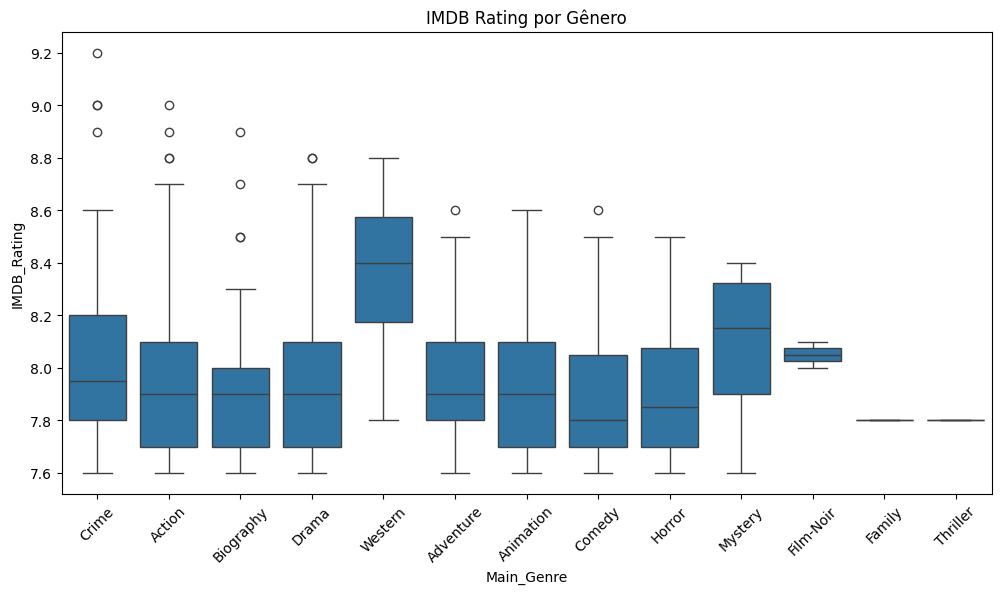

In [78]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean, x="Main_Genre", y="IMDB_Rating")
plt.xticks(rotation=45)
plt.title("IMDB Rating por G√™nero")
plt.show()

Pelo gr√°fico podemos notar que, g√™neros como Western, Mystery e Film-Noir costumam ter notas mais altas no IMDB, mas Mystery e Western t√™m avalia√ß√µes bem variadas, indo de medianas a excelentes. Family e Thriller t√™m notas mais baixas e consistentes, com pouca varia√ß√£o. 

Para notas altas, apostar em Western, Mystery ou Film-Noir, para manter a consist√™ncia das notas, Family e Thriller.


Como estamos falando sobre m√©dianas, teremos que usar o teste ANOVA ou Kruskal, para isso teremos que testar a normalidade doa dados.

In [79]:
# Teste de normalidade por g√™nero
normalidade = {}
for genre, group in df_clean.groupby("Main_Genre"):
    stat, p_value = shapiro(group["IMDB_Rating"].dropna())
    normalidade[genre] = p_value
    print(f"{genre}: p-valor = {p_value:.4f}")

# Interpreta√ß√£o
alpha = 0.05
for genre, p_value in normalidade.items():
    if p_value > alpha:
        print(f"{genre}: distribui√ß√£o do IMDB_Rating parece normal.")
    else:
        print(f"{genre}: distribui√ß√£o do IMDB_Rating N√ÉO √© normal.")

Action: p-valor = 0.0000
Adventure: p-valor = 0.0126
Animation: p-valor = 0.0008
Biography: p-valor = 0.0000
Comedy: p-valor = 0.0000
Crime: p-valor = 0.0000
Drama: p-valor = 0.0000
Family: p-valor = nan
Film-Noir: p-valor = nan
Horror: p-valor = 0.1761
Mystery: p-valor = 0.1214
Thriller: p-valor = nan
Western: p-valor = 0.8994
Action: distribui√ß√£o do IMDB_Rating N√ÉO √© normal.
Adventure: distribui√ß√£o do IMDB_Rating N√ÉO √© normal.
Animation: distribui√ß√£o do IMDB_Rating N√ÉO √© normal.
Biography: distribui√ß√£o do IMDB_Rating N√ÉO √© normal.
Comedy: distribui√ß√£o do IMDB_Rating N√ÉO √© normal.
Crime: distribui√ß√£o do IMDB_Rating N√ÉO √© normal.
Drama: distribui√ß√£o do IMDB_Rating N√ÉO √© normal.
Family: distribui√ß√£o do IMDB_Rating N√ÉO √© normal.
Film-Noir: distribui√ß√£o do IMDB_Rating N√ÉO √© normal.
Horror: distribui√ß√£o do IMDB_Rating parece normal.
Mystery: distribui√ß√£o do IMDB_Rating parece normal.
Thriller: distribui√ß√£o do IMDB_Rating N√ÉO √© normal.
Western: di

Como nem todas as categorias de filmes s√£o normais, vamos usar o teste de Kruskal.

In [80]:
groups = [group["IMDB_Rating"].dropna() for name, group in df_clean.groupby("Main_Genre")]
stat, p_value = kruskal(*groups)
if p_value < 0.05:
    print(f"Kruskal-Wallis: estat√≠stica = {stat:.2f}, p-valor = {p_value:.4f} Rejeitamos H0, as medianas de IMDB s√£o semelhantes entre g√™neros")
else:
    print(f"Kruskal-Wallis: estat√≠stica = {stat:.2f}, p-valor = {p_value:.4f} NN√£o rejeitamos H0, as medianas de IMDB s√£o semelhantes entre g√™neros")

Kruskal-Wallis: estat√≠stica = 17.73, p-valor = 0.1243 NN√£o rejeitamos H0, as medianas de IMDB s√£o semelhantes entre g√™neros


Nosso teste de hip√≥teses n√£o confirma que o g√™nero impacta significativamente as notas, mas vamos manter a conclus√£o inicial e continuar explorando essa vari√°vel nos pr√≥ximos modelos de machine learning.

## 3.4 - Efeito de Diretores no IMDB Rating

Ser√° que apenas o nome do diretor estar vinculado ao filme consegue gerar notas mais altas?

Hip√≥teses a serem testads:

* H0: O IMDB m√©dio √© o mesmo para todos os diretores.

* H1: Pelo menos um diretor tem IMDB m√©dio diferente.

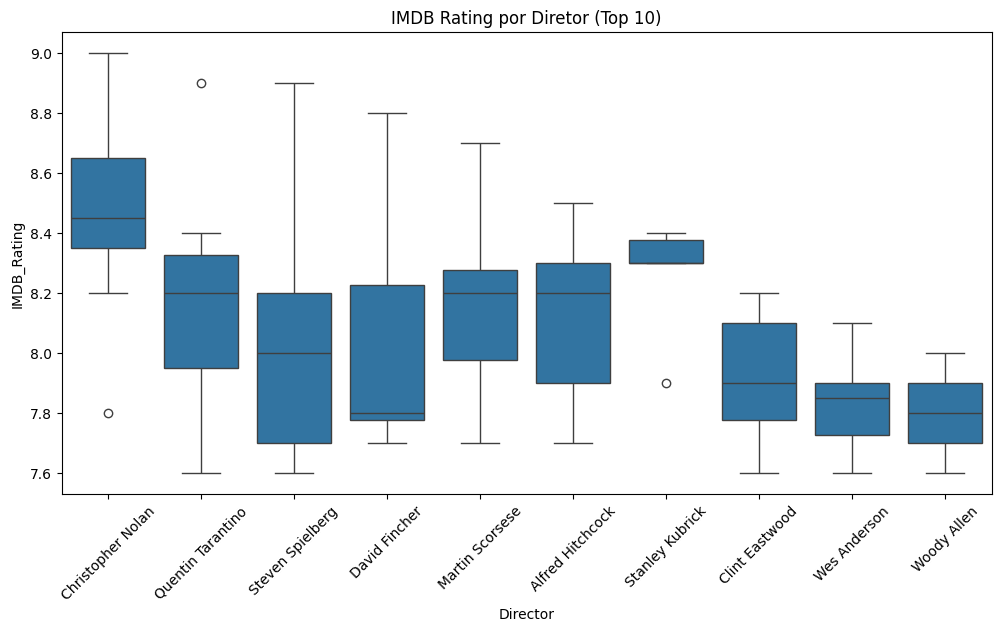

In [81]:
top_directors = df_clean["Director"].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean[df_clean["Director"].isin(top_directors)], x="Director", y="IMDB_Rating")
plt.xticks(rotation=45)
plt.title("IMDB Rating por Diretor (Top 10)")
plt.show()

In [82]:
groups = [group["IMDB_Rating"].dropna() for name, group in df_clean[df_clean["Director"].isin(top_directors)].groupby("Director")]
stat, p_value = kruskal(*groups)
if p_value < 0.05:
    print(f"Kruskal-Wallis: estat√≠stica = {stat:.2f}, p-valor = {p_value:.4f} Rejeitamos H0, pelo menos um diretor difere")
else:
    print(f"Kruskal-Wallis: estat√≠stica = {stat:.2f}, p-valor = {p_value:.4f} N√£o rejeitamos H0, IMDB m√©dio √© semelhante entre diretores")

Kruskal-Wallis: estat√≠stica = 23.78, p-valor = 0.0047 Rejeitamos H0, pelo menos um diretor difere


Podemos notar que Christopher Nolan se destaca com notas medianas altas e pouca varia√ß√£o no IMDb, indicando consist√™ncia na qualidade de seus filmes. Alfred Hitchcock, Stanley Kubrick e Quentin Tarantino tamb√©m mant√™m avalia√ß√µes elevadas, mas com um pouco mais de dispers√£o. Diretores como Steven Spielberg e David Fincher apresentam maior varia√ß√£o nas notas, com alguns filmes muito elogiados e outros mais modestos. J√° considerando o ROI, Spielberg lidera com grande retorno financeiro, seguido por Clint Eastwood e Tarantino, enquanto Hitchcock e Fincher t√™m retornos mais baixos. Wes Anderson e Woody Allen ficam com medianas mais baixas de nota e retornos modestos, mostrando que nem sempre filmes bem avaliados s√£o os mais lucrativos.

## 3.5 - Efeito de Atores no IMDB Rating

Vamos averiguar se alguns atores geram filmes com notas mais altas?

Hip√≥teses que iremos testar:

* H0: O IMDB m√©dio √© o mesmo para todos os atores.

* H1: Pelo menos um ator tem IMDB m√©dio diferente.

Iremos fazer o mesmo tratamento para lidar com as vari√°veis de atores, como fizemos anteriormente.

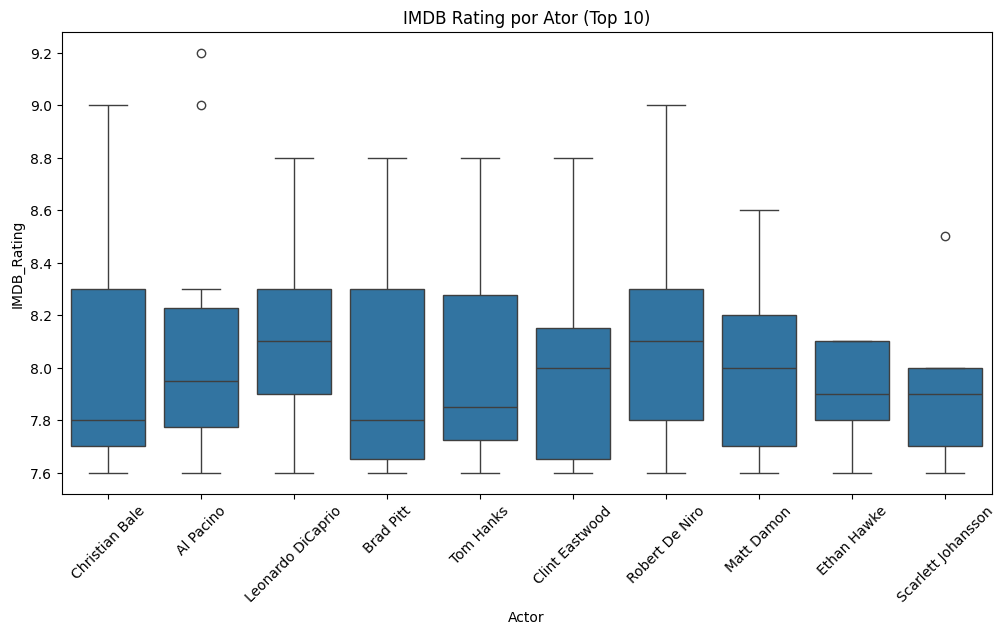

In [83]:
actors_df = df_clean.melt(
    id_vars=["IMDB_Rating"],
    value_vars=["Star1","Star2","Star3","Star4"],
    var_name="Star_Position", value_name="Actor"
)

top_actors = actors_df["Actor"].value_counts().head(10).index
actors_top_df = actors_df[actors_df["Actor"].isin(top_actors)]

plt.figure(figsize=(12,6))
sns.boxplot(data=actors_top_df, x="Actor", y="IMDB_Rating")
plt.xticks(rotation=45)
plt.title("IMDB Rating por Ator (Top 10)")
plt.show()

In [84]:
groups = [group["IMDB_Rating"].dropna() for name, group in actors_top_df.groupby("Actor")]
stat, p_value = kruskal(*groups)
if p_value < 0.05:
    print(f"Kruskal-Wallis: estat√≠stica = {stat:.2f}, p-valor = {p_value:.4f} Rejeitamos H0, pelo menos um ator difere")
else:
    print(f"Kruskal-Wallis: estat√≠stica = {stat:.2f}, p-valor = {p_value:.4f} N√£o rejeitamos H0, IMDB m√©dio √© semelhante entre atores")

Kruskal-Wallis: estat√≠stica = 4.67, p-valor = 0.8622 N√£o rejeitamos H0, IMDB m√©dio √© semelhante entre atores


Podemos observar, tanto pelo gr√°fico quanto pelo teste de hip√≥teses, que a presen√ßa de um determinado ator n√£o influencia de forma significativa a nota do filme.

## 3.6 - Rela√ß√£o entre ROI e IMDB_Rating por franquia

Seria interessante saber se filmes de franquia com maior ROI recebem notas melhores? Com isso queremos entender se a lucratividade proporcional influencia a avalia√ß√£o do p√∫blico, e se isso muda para franquias versus filmes originais.

Hip√≥teses que iremos testar:

* H0: ROI n√£o influencia IMDB_Rating, independentemente de ser franquia.

* H1: ROI influencia IMDB_Rating, e o efeito difere entre franquias e filmes originais.

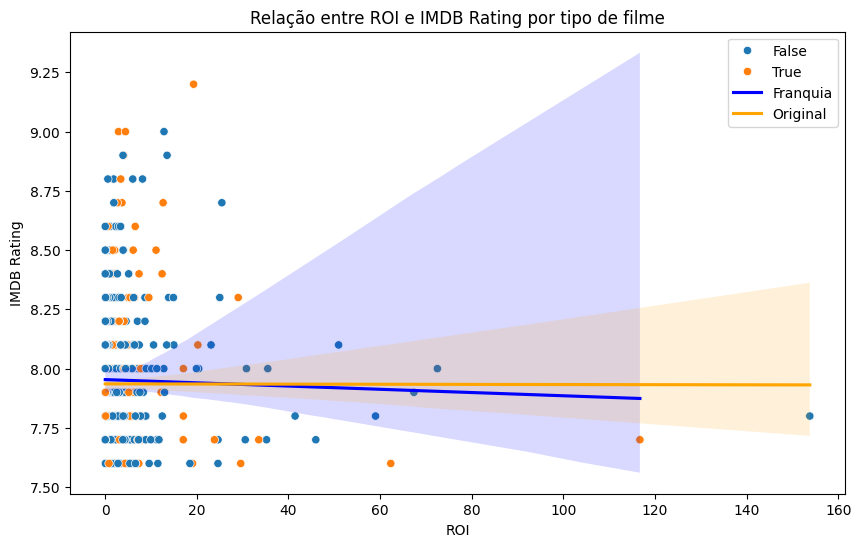

In [85]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x="ROI", y="IMDB_Rating", hue="is_franchise")
sns.regplot(data=df_clean[df_clean["is_franchise"]==True], x="ROI", y="IMDB_Rating", scatter=False, color="blue", label="Franquia")
sns.regplot(data=df_clean[df_clean["is_franchise"]==False], x="ROI", y="IMDB_Rating", scatter=False, color="orange", label="Original")
plt.xlabel("ROI")
plt.ylabel("IMDB Rating")
plt.title("Rela√ß√£o entre ROI e IMDB Rating por tipo de filme")
plt.legend()
plt.show()

In [86]:
corr_franchise, p_franchise = spearmanr(df_clean[df_clean["is_franchise"]==True]["ROI"].dropna(),
                                        df_clean[df_clean["is_franchise"]==True]["IMDB_Rating"].dropna())
corr_original, p_original = spearmanr(df_clean[df_clean["is_franchise"]==False]["ROI"].dropna(),
                                      df_clean[df_clean["is_franchise"]==False]["IMDB_Rating"].dropna())

if p_franchise < 0.05:
    print(f"Franquia: Correla√ß√£o = {corr_franchise:.2f}, p-valor = {p_franchise:.4f} Rejeitamos H0")
else:
    print(f"Franquia: Correla√ß√£o = {corr_franchise:.2f}, p-valor = {p_franchise:.4f} N√£o rejeitamos H0")

if p_original < 0.05:
    print(f"Original: Correla√ß√£o = {corr_original:.2f}, p-valor = {p_original:.4f} Rejeitamos H0")
else:
    print(f"Original: Correla√ß√£o = {corr_original:.2f}, p-valor = {p_original:.4f} N√£o rejeitamos H0")

Franquia: Correla√ß√£o = 0.11, p-valor = 0.1091 N√£o rejeitamos H0
Original: Correla√ß√£o = -0.03, p-valor = 0.4684 N√£o rejeitamos H0


Pelo que podemos ver no gr√°fico e pelo teste de hipoteses que n√£o h√° uma rela√ß√£o clara entre a nota de um filme e seu retorno financeiro, seja ele de franquia ou original. Filmes bem avaliados n√£o garantem ROI alto, e os maiores sucessos financeiros aparecem em todas as faixas de nota, qualidade e sucesso financeiro nem sempre andam juntos.

## 3.7 - Efeito do Ano de Lan√ßamento no IMDB Rating

Queremos saber se filmes mais recentes tendem a ter notas mais altas ou baixas no IMDB. Isso ajuda a verificar tend√™ncias de avalia√ß√£o ao longo do tempo, al√©m de capturar poss√≠veis mudan√ßas de padr√£o de produ√ß√£o e gosto do p√∫blico.

Hip√≥teses que testaremos:

* H0: N√£o h√° rela√ß√£o entre Released_Year e IMDB_Rating.

* H1: Existe uma rela√ß√£o entre Released_Year e IMDB_Rating (filmes mais recentes t√™m notas diferentes dos antigos).

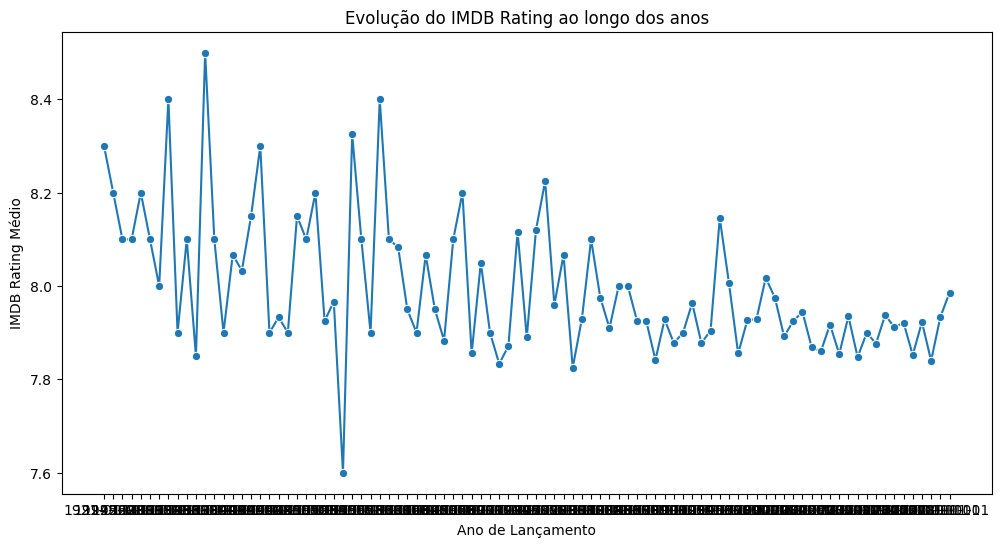

In [87]:
# Calcular a nota m√©dia por ano
df_yearly = df_clean.groupby("Released_Year")["IMDB_Rating"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_yearly, x="Released_Year", y="IMDB_Rating", marker="o")
plt.xlabel("Ano de Lan√ßamento")
plt.ylabel("IMDB Rating M√©dio")
plt.title("Evolu√ß√£o do IMDB Rating ao longo dos anos")
plt.show()

O gr√°fico mostra que a nota m√©dia dos filmes no IMDb caiu um pouco ao longo dos anos, enquanto nos primeiros anos (1920-1950) a m√©dia ficava acima de 8,2, nas √∫ltimas d√©cadas se estabilizou em torno de 7,9. Al√©m disso, as avalia√ß√µes eram mais inst√°veis no passado, com altos e baixos, enquanto recentemente a m√©dia anual tem se mantido mais est√°vel.

In [88]:
df_clean["Released_Year"] = pd.to_datetime(df_clean["Released_Year"]).dt.year

corr, p_value = spearmanr(df_clean["Released_Year"], df_clean["IMDB_Rating"])

if p_value < 0.05:
    print(f"Correla√ß√£o de Spearman = {corr:.2f}, p-valor = {p_value:.4f} ‚Üí Rejeitamos H0: h√° rela√ß√£o significativa entre ano e IMDB Rating")
else:
    print(f"Correla√ß√£o de Spearman = {corr:.2f}, p-valor = {p_value:.4f} ‚Üí N√£o rejeitamos H0: n√£o h√° rela√ß√£o significativa")

Correla√ß√£o de Spearman = -0.16, p-valor = 0.0000 ‚Üí Rejeitamos H0: h√° rela√ß√£o significativa entre ano e IMDB Rating


Podemos confirmar nossa hip√≥tese obtida atrav√©s da an√°lise gr√°fica de que as notas est√£o decaindo ao longo doa anos.

## 3.8 - Efeito da Classifica√ß√£o Indicativa (Certificate) no IMDB Rating

Queremos saber aqui se a classifica√ß√£o indicativa pode influenciar a recep√ß√£o cr√≠tica e do p√∫blico. Por exemplo, filmes "A" (livre) podem ser mais voltados para toda a fam√≠lia, enquanto filmes "R" (restritos) podem atrair um p√∫blico mais espec√≠fico. Por isso queremos verificar se existe diferen√ßa estatisticamente significativa no IMDB Rating entre as categorias de Certificate.

Hip√≥teses que iremos testar:

* H0: N√£o h√° diferen√ßa significativa no IMDB Rating entre os diferentes Certificates.

* H1: Pelo menos uma categoria de Certificate apresenta IMDB Rating significativamente diferente.

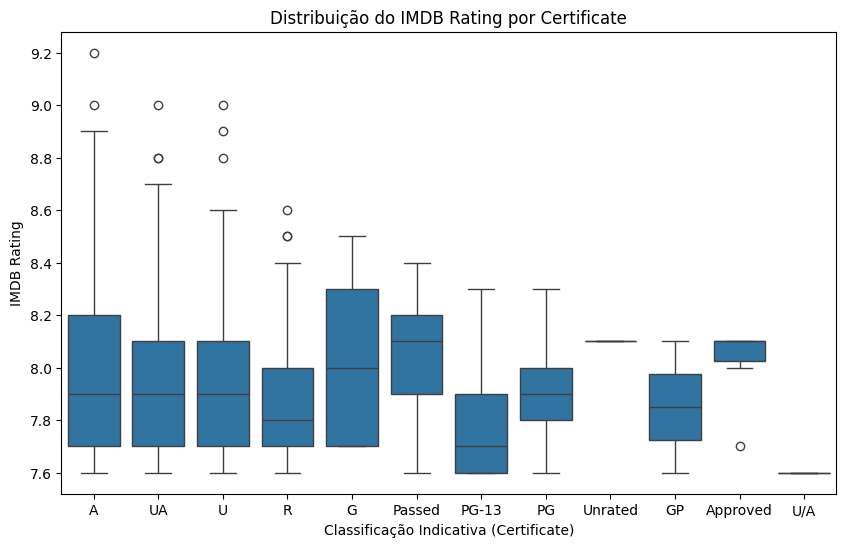

In [89]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_clean, x="Certificate", y="IMDB_Rating")
plt.title("Distribui√ß√£o do IMDB Rating por Certificate")
plt.xlabel("Classifica√ß√£o Indicativa (Certificate)")
plt.ylabel("IMDB Rating")
plt.show()

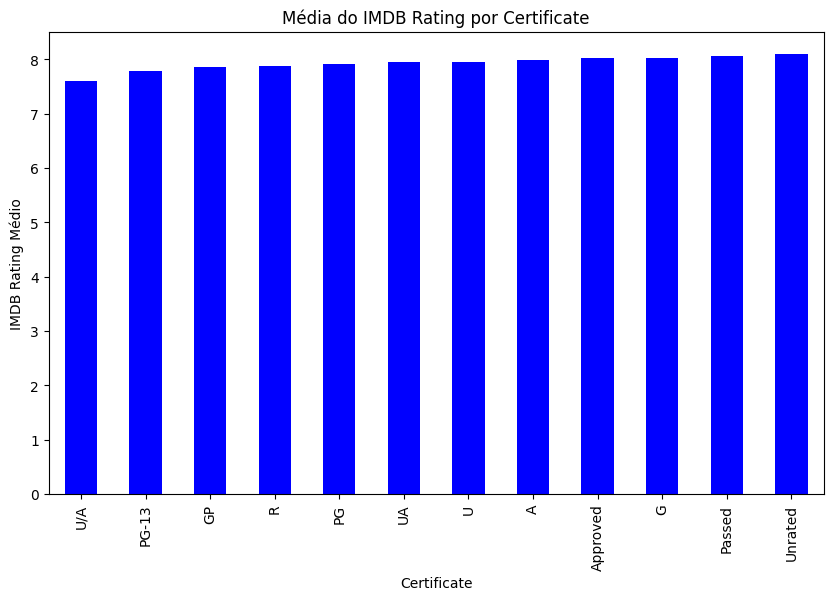

In [90]:
df_clean.groupby("Certificate")["IMDB_Rating"].mean().sort_values().plot(
    kind="bar", figsize=(10,6), color="blue"
)
plt.title("M√©dia do IMDB Rating por Certificate")
plt.ylabel("IMDB Rating M√©dio")
plt.show()

Vemos nos gr√°ficos que independente da classifica√ß√£o indicativa, os filmes costumam ter notas altas no IMDB. As medianas ficam bem pr√≥ximas (entre 7.8 e 8.1), ent√£o n√£o d√° pra dizer que uma classifica√ß√£o tem qualidade melhor que outra. O que muda mais √© a dispers√£o, algumas categorias como A, UA, U e R t√™m mais varia√ß√£o nas notas e aparecem com os outliers mais altos, mas no geral todas mant√™m um padr√£o parecido de avalia√ß√£o.


Vamos calcular a normalidade dos grupos, para sabermos se usaremos o teste ANOVA ou Kruskal.

In [91]:
for cert, group in df_clean.groupby("Certificate"):
    stat, p_value = shapiro(group["IMDB_Rating"])
    print(f"{cert}: W={stat:.3f}, p={p_value:.4f} -> {'Normal' if p_value>0.05 else 'N√£o normal'}")

A: W=0.906, p=0.0000 -> N√£o normal
Approved: W=0.634, p=0.0012 -> N√£o normal
G: W=0.842, p=0.0605 -> Normal
GP: W=nan, p=nan -> N√£o normal
PG: W=0.960, p=0.4445 -> Normal
PG-13: W=0.879, p=0.0007 -> N√£o normal
Passed: W=0.950, p=0.3173 -> Normal
R: W=0.907, p=0.0000 -> N√£o normal
U: W=0.927, p=0.0000 -> N√£o normal
U/A: W=nan, p=nan -> N√£o normal
UA: W=0.902, p=0.0000 -> N√£o normal
Unrated: W=nan, p=nan -> N√£o normal


A maioria das classes n√£o seguem uma distribui√ß√£o normal, logo usaremos o Kruskal.

In [92]:
groups = [group["IMDB_Rating"].dropna() for name, group in df.groupby("Certificate")]

# Primeiro checamos se todos s√£o normais
normalidade = all(shapiro(group).pvalue > 0.05 for group in groups)

if normalidade:
    stat, p_value = f_oneway(*groups)
    teste = "ANOVA"
else:
    stat, p_value = kruskal(*groups)
    teste = "Kruskal-Wallis"

if p_value < 0.05:
    print(f"{teste}: Estat√≠stica={stat:.2f}, p={p_value:.4f} Rejeitamos H‚ÇÄ: h√° diferen√ßa significativa entre Certificates")
else:
    print(f"{teste}: Estat√≠stica={stat:.2f}, p={p_value:.4f} N√£o rejeitamos H‚ÇÄ: n√£o h√° diferen√ßa significativa")

Kruskal-Wallis: Estat√≠stica=42.95, p=0.0002 Rejeitamos H‚ÇÄ: h√° diferen√ßa significativa entre Certificates


O teste de hip√≥tese mais uma vez vai contra o que vimos no gr√°fico. Mais adiante, vamos aprofundar a an√°lise com modelos de machine learning para entender melhor o quanto a classifica√ß√£o pode realmente impactar na nota do filme.

## 3.9 - Rela√ß√£o entre N√∫mero de Votos (No_of_Votes) e IMDB Rating

Buscamos agora tentar entender se filmes mais populares (com mais votos) tendem a ter notas diferentes no IMDb. 

A hip√≥tese √© que:

* Filmes com muitos votos podem ter uma nota mais representativa da opini√£o geral.

* Filmes com poucos votos podem ter maior variabilidade, influenciados por um p√∫blico mais restrito.

* H0: N√£o existe correla√ß√£o entre n√∫mero de votos e IMDB Rating.

* H1: Existe correla√ß√£o significativa entre n√∫mero de votos e IMDB Rating.

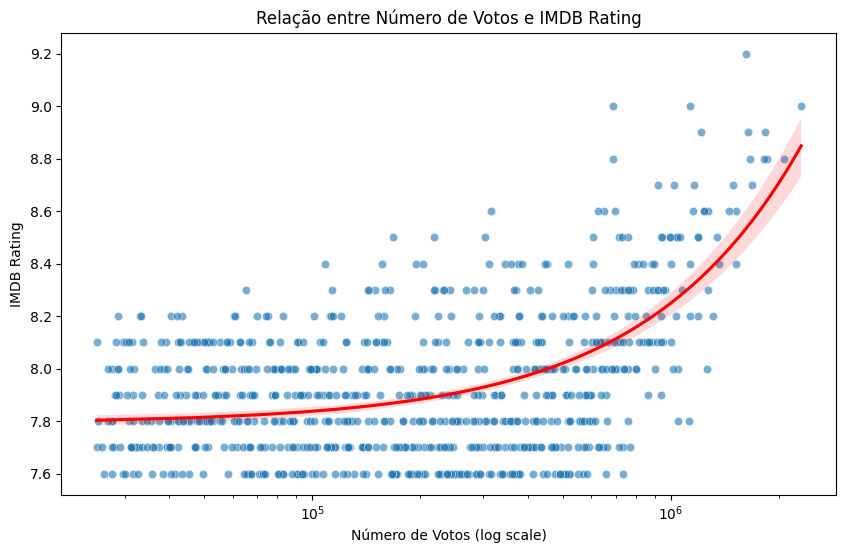

In [93]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x="No_of_Votes", y="IMDB_Rating", alpha=0.6)
sns.regplot(data=df_clean, x="No_of_Votes", y="IMDB_Rating", scatter=False, color="red")
plt.xscale("log")
plt.xlabel("N√∫mero de Votos (log scale)")
plt.ylabel("IMDB Rating")
plt.title("Rela√ß√£o entre N√∫mero de Votos e IMDB Rating")
plt.show()

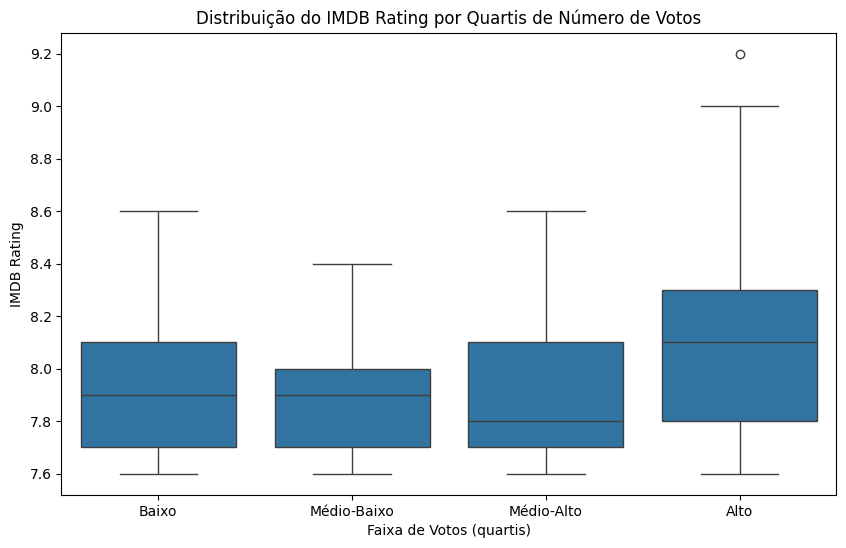

In [94]:
# Criar faixas de votos (quantis)
df["votes_bin"] = pd.qcut(df["No_of_Votes"], q=4, labels=["Baixo", "M√©dio-Baixo", "M√©dio-Alto", "Alto"])

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="votes_bin", y="IMDB_Rating")
plt.title("Distribui√ß√£o do IMDB Rating por Quartis de N√∫mero de Votos")
plt.xlabel("Faixa de Votos (quartis)")
plt.ylabel("IMDB Rating")
plt.show()

O gr√°fico mostra que filmes com mais votos no IMDb tendem a ter notas um pouco mais altas. A linha de tend√™ncia sobe de leve, indicando que quanto maior a popularidade, melhor a percep√ß√£o de qualidade. Esse efeito fica mais claro nos filmes com enorme n√∫mero de votos, que geralmente t√™m notas mais concentradas em faixas altas, sugerindo um consenso positivo. Mas √© bom mencionar que n√£o √© que muitos votos fa√ßam a nota subir, provavelmente, filmes bem avaliados atraem mais gente e, consequentemente, mais votos.

Vamos usar o teste de hipoteses de Spearman, pois ele n√£o exige linearidade dos dados.

In [95]:
corr_s, p_s = spearmanr(df_clean["No_of_Votes"], df_clean["IMDB_Rating"])
print(f"Correla√ß√£o de Spearman: r={corr_s:.3f}, p={p_s:.4f}")

if p_s < 0.05:
    print("Resultado: Rejeitamos H‚ÇÄ: Existe correla√ß√£o significativa entre n√∫mero de votos e IMDB Rating.")
else:
    print("Resultado: N√£o rejeitamos H‚ÇÄ: N√£o h√° evid√™ncia de correla√ß√£o significativa.")

Correla√ß√£o de Spearman: r=0.304, p=0.0000
Resultado: Rejeitamos H‚ÇÄ: Existe correla√ß√£o significativa entre n√∫mero de votos e IMDB Rating.


O teste confirma nossa hipotese visual, que a quantidade de avalia√ß√µes feitas no filme, impactam sua nota final no IMDB.

## 3.10 - Rela√ß√£o entre tamanho do Resumo e IMDB Rating

Aqui a gente que saber se o tamanho do resumo do filme (overview) influencia na nota do IMDb.

Filmes com resumos mais longos podem dar mais contexto e atrair um p√∫blico diferente.

* H0: N√£o existe correla√ß√£o entre o comprimento do resumo (overview_len) e o IMDB Rating.

Filmes com resumos curtos podem ter descri√ß√µes gen√©ricas, talvez sem impactar tanto na percep√ß√£o do p√∫blico.

* H1: Existe correla√ß√£o significativa entre o comprimento do resumo e o IMDB Rating.

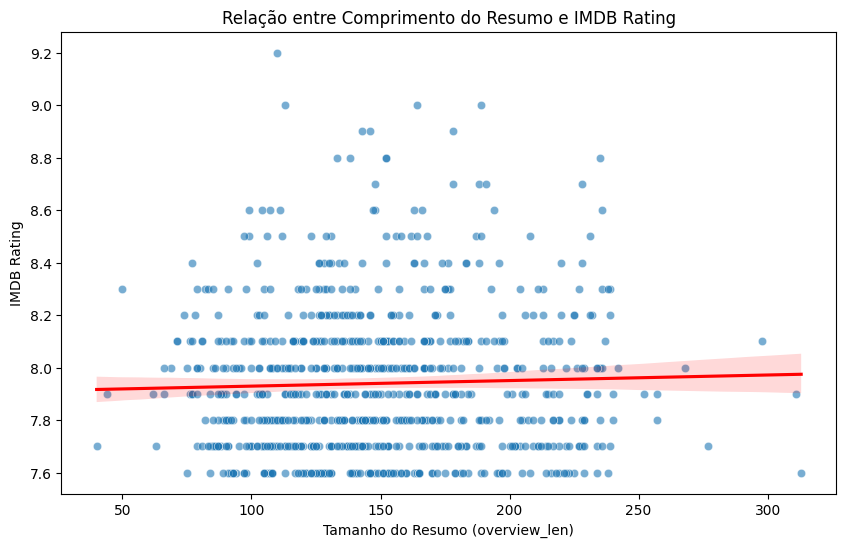

In [96]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x="overview_len", y="IMDB_Rating", alpha=0.6)
sns.regplot(data=df_clean, x="overview_len", y="IMDB_Rating", scatter=False, color="red")
plt.xlabel("Tamanho do Resumo (overview_len)")
plt.ylabel("IMDB Rating")
plt.title("Rela√ß√£o entre Comprimento do Resumo e IMDB Rating")
plt.show()

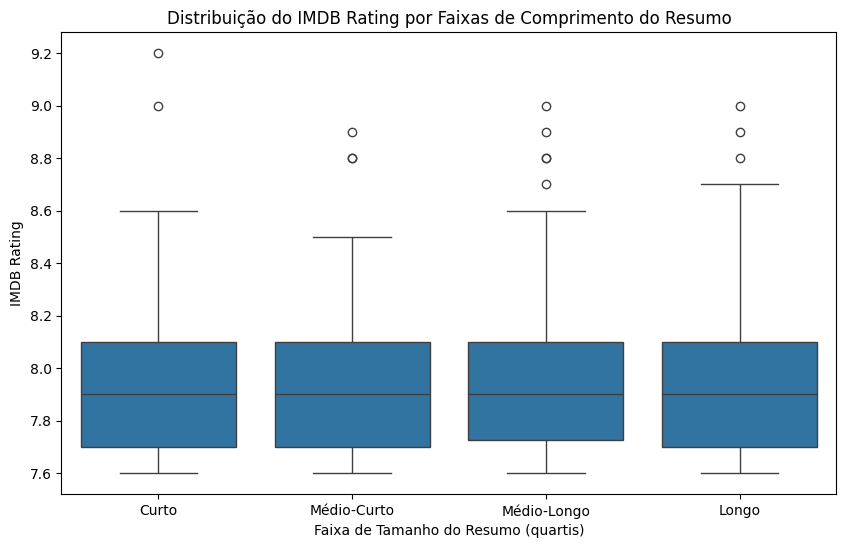

In [97]:
# Criar faixas (quartis)
df_clean["overview_bin"] = pd.qcut(df_clean["overview_len"], q=4, labels=["Curto", "M√©dio-Curto", "M√©dio-Longo", "Longo"])

plt.figure(figsize=(10,6))
sns.boxplot(data=df_clean, x="overview_bin", y="IMDB_Rating")
plt.title("Distribui√ß√£o do IMDB Rating por Faixas de Comprimento do Resumo")
plt.xlabel("Faixa de Tamanho do Resumo (quartis)")
plt.ylabel("IMDB Rating")
plt.show()

Visualmente n√£o existe nenhuma rela√ß√£o entre o o tamanho do resumo do filme com suas notas IMDB, vamos confirmar ou negar isso com um teste de hip√≥teses.

In [98]:
corr_s, p_s = spearmanr(df_clean["overview_len"], df_clean["IMDB_Rating"])
print(f"Correla√ß√£o de Spearman: r={corr_s:.3f}, p={p_s:.4f}")

if p_s < 0.05:
    print("Resultado: Rejeitamos H‚ÇÄ: Existe correla√ß√£o significativa entre tamanho do resumo e IMDB Rating.")
else:
    print("Resultado: N√£o rejeitamos H‚ÇÄ: N√£o h√° evid√™ncia de correla√ß√£o significativa.")

Correla√ß√£o de Spearman: r=0.032, p=0.3620
Resultado: N√£o rejeitamos H‚ÇÄ: N√£o h√° evid√™ncia de correla√ß√£o significativa.


Como visto na an√°lise visual, n√£o existe uma correla√ß√£o entre as duas vari√°veis.

# 4 - EDA textual para a vari√°vel (Overview)

Vamos inicialmente preparar stopwords e fun√ß√µes de limpeza.

In [101]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ----------------- ---------------------- 5.5/12.8 MB 36.9 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 35.5 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [103]:
# garantir recursos do NLTK
nltk.download('stopwords'); nltk.download('vader_lexicon')
STOPWORDS = set(stopwords.words('english'))

# spaCy (lemmas)
nlp = spacy.load("en_core_web_sm", disable=["ner","parser"])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\winic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\winic\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [104]:
def clean_text(s: str) -> str:
    if pd.isna(s): return ""
    s = s.lower()
    s = re.sub(r"[^a-z0-9\s']", " ", s) # remove pontua√ß√£o n√£o alfanum√©rica
    s = re.sub(r"\s+", " ", s).strip()
    return s

def lemmatize_doc(doc: str) -> str:
    sp = nlp(doc)
    toks = [t.lemma_ for t in sp if t.is_alpha and t.text not in STOPWORDS]
    return " ".join(toks)

In [105]:
# cria vers√£o limpa/lematizada (se quiser acelerar, pule a lematiza√ß√£o no primeiro ciclo)
df_clean["overview_clean"] = df_clean["Overview"].astype(str).map(clean_text).map(lemmatize_doc)

## 4.1 - Frequ√™ncias e nuvem de palavras

Aqui queremos entender quais os temas recorrentes e diferen√ßas por g√™nero.

Vamos usar TF-IDF , pois ele ajuda a identificar palavras informativas, e n√£o apenas as mais frequentes. Por exemplo, ‚Äúmurder‚Äù √© mais importante que ‚Äúthe‚Äù ou ‚Äúand‚Äù.

In [106]:
# Frequ√™ncias globais com TF-IDF (para ordenar termos informativos)
vec = TfidfVectorizer(max_features=5000, ngram_range=(1,2), min_df=3, max_df=0.8)
X = vec.fit_transform(df_clean["overview_clean"])
idf = dict(zip(vec.get_feature_names_out(), vec.idf_))
top_terms = sorted(idf.items(), key=lambda x: -x[1])[:30]  # termos + "raros"/informativos
pd.DataFrame(top_terms, columns=["term","idf"]).head(15)

term       idf
0        abandon  6.287004
1        ability  6.287004
2          abuse  6.287004
3         accept  6.287004
4       activist  6.287004
5          actor  6.287004
6        actress  6.287004
7          adolf  6.287004
8   adolf hitler  6.287004
9        advisor  6.287004
10       alabama  6.287004
11     alcoholic  6.287004
12      alliance  6.287004
13       amateur  6.287004
14     ambitious  6.287004

Aqui vamos criar uma WordCloud com todos os resumos juntos. A nuvem de palavras mostra de forma visual quais termos aparecem mais, quanto maior a palavra, mais frequente ela √©, dando uma ideia r√°pida dos temas principais dos filmes.

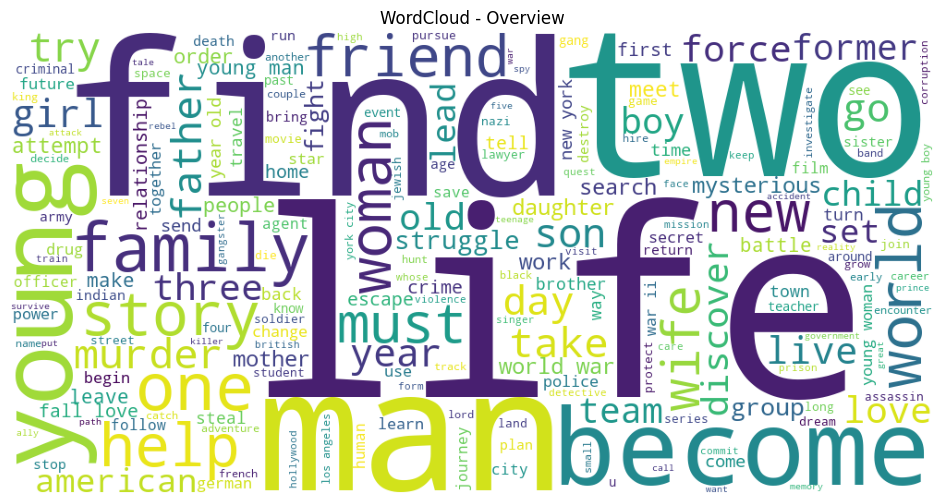

In [107]:
# Nuvem de palavras (global)
text_all = " ".join(df_clean["overview_clean"].tolist())
wc = WordCloud(width=1000, height=500, background_color="white").generate(text_all)
plt.figure(figsize=(12,6)); plt.imshow(wc); plt.axis("off"); plt.title("WordCloud - Overview"); plt.show()

Vamos agrupar os filmes por g√™nero e calcular a m√©dia do TF-IDF de cada palavra dentro de cada grupo. Com isso, podemos a identificar quais termos s√£o mais representativos de cada g√™nero, por exemplo, ‚Äúheist‚Äù e ‚Äúdetective‚Äù aparecem mais em Crime, enquanto ‚Äúspace‚Äù e ‚Äúbattle‚Äù s√£o comuns em Action.

In [108]:
# Palavras destacadas por g√™nero (m√©dia TF-IDF por classe)
genre_means = {}
for g, sub in df_clean.groupby("Main_Genre"):
    if len(sub) < 10: continue
    Xg = vec.transform(sub["overview_clean"])
    genre_means[g] = np.asarray(Xg.mean(axis=0)).ravel()

In [109]:
genre_top = {}
terms = vec.get_feature_names_out()
for g, arr in genre_means.items():
    idx = arr.argsort()[::-1][:15]
    genre_top[g] = [terms[i] for i in idx]

In [110]:
pd.DataFrame.from_dict(genre_top, orient="index").T

Action  Adventure Animation   Biography     Comedy        Crime   Drama  \
0       must      world     young       story        two       murder    life   
1        one       find      girl    american       life       police   woman   
2        man     friend       boy        life        day        crime     man   
3      fight  astronaut       toy      become     friend        young   young   
4      force    magical       set        lead        man          two    find   
5     former     search     great          ii      young         life    love   
6       team  encounter     world        year       love          man     two   
7   assassin     across  princess         man       find    detective     war   
8        war     school      must       world       fall  investigate   world   
9       find       trip       old  true story        new       family     new   
10     world      story      home      famous        get          one    year   
11     agent         go      live        king       meet         find    wife   
12     young        war     curse      war ii  fall love          son  father   
13      army       true    family        take     become        small  family   
14    battle      quest     power     inspire       girl        three   story   

              Horror  
0                two  
1          convinced  
2   become convinced  
3       child become  
4              haunt  
5                old  
6              house  
7                run  
8               soon  
9              young  
10            mother  
11             child  
12        mysterious  
13            assume  
14          research

Com nossa an√°lise, podemos ver que cada g√™nero de filme tem temas e vocabul√°rio pr√≥prios, a√ß√£o, aventura e anima√ß√£o focam em combates, miss√µes e explora√ß√£o. J√° drama, crime e terror lidam com rela√ß√µes humanas, conflitos e tens√£o, com√©dias mostram situa√ß√µes leves e amorosas, biografias contam hist√≥rias de vida e conquistas. Algumas palavras, como ‚Äúyoung‚Äù, ‚Äúman‚Äù e ‚Äúlife‚Äù, aparecem em v√°rios g√™neros, refletindo temas universais de personagens e at√© de crescimento.

## 4.2 - Classificar Main_Genre a partir do Overview

Agora estamos exclusivamente em busca da resposta de uma das perguntas do desafio, ‚Äú√© poss√≠vel inferir o g√™nero do filme pelo resumo?‚Äù.

Para isso iremos testar as hipoteses:

* H0 = texto n√£o cont√©m informa√ß√£o suficiente

* H1 = cont√©m (modelo supera o acaso)

Agora vamos pegar s√≥ os filmes com g√™nero definido e resumos preenchidos. O `X_text` vai ser nosso input (os resumos) e `y` o alvo (o g√™nero). Dividimos os dados em treino (80%) e teste (20%).

Assim garantimos que o modelo aprenda de forma justa, sem usar dados vazios ou sofrer com desequil√≠brios entre os g√™neros.

In [111]:
# alvo e split
mask = df_clean["Main_Genre"].notna() & df_clean["overview_clean"].str.len().gt(0)
X_text = df_clean.loc[mask, "overview_clean"].values
y = df_clean.loc[mask, "Main_Genre"].values

In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=42
)

Nesse passo vamor criar um pipeline que primeiro transforma os textos em n√∫meros com TF-IDF e depois vai aplicar um classificador LinearSVC (SVM linear).

* `ngram_range=(1,2)`: usamos palavras isoladas e pares de palavras para capturar mais contexto.
* `min_df=3` e `max_df=0.8`: removemos palavras muito raras ou muito comuns.
* `class_weight="balanced"`: ajusta os pesos para lidar com g√™neros desbalanceados.

Como o LinearSVC funciona bem com textos que t√™m muitas features, como acontece com TF-IDF, e o pipeline facilita fazer tudo em um passo s√≥, que ser√° transformar os dados e treinar o modelo.

In [113]:
# Pipeline: TF-IDF + classificador linear (robusto p/ texto)
clf = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,2), min_df=3, max_df=0.8)),
    ("clf", LinearSVC(class_weight="balanced", random_state=42))
])
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, min_df=3, ngram_range=(1, 2))),
                ('clf', LinearSVC(class_weight='balanced', random_state=42))])

Vamos usar o modelo para prever os g√™neros no conjunto de teste e mostramos m√©tricas detalhadas como precision, recall e F1-score, al√©m da matriz de confus√£o, que ir√° nos mostrar quais g√™neros foram confundidos.

Fazendo isso teremos ajuda a ver como o modelo est√° se saindo, entendendo onde acerta e onde erra. Com a matriz de confus√£o sendo √∫til na identifica√ß√£o de padr√µes de erro, por exemplo, quando o modelo confunde Action com Adventure.

              precision    recall  f1-score   support

      Action       0.25      0.30      0.27        23
   Adventure       0.44      0.70      0.54        10
   Animation       0.30      0.27      0.29        11
   Biography       0.20      0.27      0.23        11
      Comedy       0.24      0.21      0.23        28
       Crime       0.25      0.30      0.27        20
       Drama       0.56      0.38      0.45        53
      Family       0.00      0.00      0.00         0
   Film-Noir       0.00      0.00      0.00         1
      Horror       0.00      0.00      0.00         1
     Western       0.00      0.00      0.00         0

    accuracy                           0.33       158
   macro avg       0.20      0.22      0.21       158
weighted avg       0.36      0.33      0.34       158



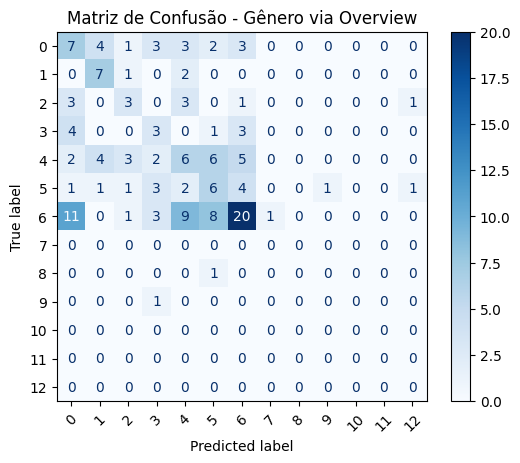

In [114]:
# Avalia√ß√£o
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred, labels=np.unique(y))).plot(
    xticks_rotation=45, cmap="Blues", values_format='d'
)
plt.title("Matriz de Confus√£o - G√™nero via Overview")
plt.show()

Agora vamos criar um modelo simples que sempre prev√™ o g√™nero mais comum e comparamos a acur√°cia do nosso modelo real com essa baseline.

Essa baseline serve para checar se o modelo realmente aprendeu algo. Se o LinearSVC tiver acur√°cia bem maior, quer dizer que os resumos realmente trazem informa√ß√£o sobre o g√™nero.

In [115]:
# Baseline para compara√ß√£o
dummy = DummyClassifier(strategy="most_frequent")
pipe_dummy = Pipeline([("tfidf", TfidfVectorizer(ngram_range=(1,2), min_df=3, max_df=0.8)), ("dum", dummy)])
pipe_dummy.fit(X_train, y_train)
base_acc = pipe_dummy.score(X_test, y_test)
model_acc = clf.score(X_test, y_test)
print(f"Acur√°cia baseline (g√™nero mais comum): {base_acc:.3f}")
print(f"Acur√°cia modelo (LinearSVC): {model_acc:.3f}")

Acur√°cia baseline (g√™nero mais comum): 0.335
Acur√°cia modelo (LinearSVC): 0.329


Agora queremos validar estatisticamente se o desempenho excede o acaso ou n√£o.

In [116]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score, perm_scores, pvalue = permutation_test_score(
    clf, X_text, y, scoring="f1_macro", cv=cv, n_permutations=200, n_jobs=-1, random_state=42
)
print(f"F1_macro (CV real): {score:.3f} | p-valor (permuta√ß√µes): {pvalue:.4f}")

if pvalue < 0.05:
    print("Rejeitamos H‚ÇÄ: o desempenho √© maior que o esperado ao acaso.")
else:
    print("N√£o rejeitamos H‚ÇÄ: n√£o h√° evid√™ncia de desempenho acima do acaso.")

F1_macro (CV real): 0.222 | p-valor (permuta√ß√µes): 0.0050
Rejeitamos H‚ÇÄ: o desempenho √© maior que o esperado ao acaso.


O objetivo era verificar se os resumos dos filmes davam informa√ß√£o suficiente para identificar o g√™nero principal usando TF-IDF e LinearSVC. Inicialmente, o modelo n√£o superou a baseline de sempre prever o g√™nero mais comum (acur√°cia de 32,9% contra 33,5%), com F1-scores baixos, principalmente para g√™neros raros, sugerindo que os resumos eram gen√©ricos e pouco discriminativos. Por√©m, ao aplicar o teste de permuta√ß√£o, obtivemos um p-valor de 0,005, permitindo rejeitar a hip√≥tese nula. Isso indica que, apesar do desempenho limitado e do F1\_macro baixo (0,222), o modelo consegue capturar um sinal estatisticamente significativo nos resumos, mostrando que o texto realmente cont√©m informa√ß√£o relevante sobre o g√™nero.

Para melhorar nosso modelo, poderiamos tentar algumas estrat√©gias, como agrupar g√™neros raros para reduzir o desbalanceamento, aumentar o tamanho do dataset para cada g√™nero, usar modelos de NLP mais avan√ßados como BERT ou embeddings pr√©-treinados que capturam melhor o contexto sem√¢ntico, e combinar as informa√ß√µes textuais com dados estruturados como dura√ß√£o, n√∫mero de votos e ROI. Essas melhorias podem ajudar o modelo a identificar padr√µes mais claros e aumentar o desempenho geral.

## 4.3 - Interpretabilidade, os termos que mais pesam por g√™nero

Agora queremos descobrir quais palavras (ou n-grams) ‚Äúpuxam‚Äù a previs√£o para cada g√™nero, ou seja, buscamos entender o vocabul√°rio caracter√≠stico que o modelo usa para decidir uma classe.

O pipeline ir√° pegar os textos, transformar em vetores TF-IDF e treinar uma regress√£o log√≠stica. O que queremos √© usar esse modelo que √© f√°cil de interpretar, j√° que cada coeficiente mostra como uma palavra influencia na chance de um g√™nero aparecer. Al√©m disso, usamos `class_weight="balanced"` para lidar melhor com o desbalanceamento entre as classes.

In [117]:
# re-treinar com LogisticRegression One-vs-Rest (coeficientes interpret√°veis)
interp = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,2), min_df=3, max_df=0.8)),
    ("lr", LogisticRegression(max_iter=500, n_jobs=-1, class_weight="balanced"))
])
interp.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, min_df=3, ngram_range=(1, 2))),
                ('lr',
                 LogisticRegression(class_weight='balanced', max_iter=500,
                                    n_jobs=-1))])

Aqui a gente pega o `tfidf` (que guarda o vocabul√°rio e a ordem das features) e o `lr` (modelo treinado). O `terms` √© a lista de todas as palavras e n-grams na mesma ordem da matriz TF-IDF, e `classes` s√£o os g√™neros. Fazemos isso porque precisamos ligar cada peso do modelo √† palavra correspondente para conseguir interpretar os coeficientes.

In [118]:
tfidf = interp.named_steps["tfidf"]
lr = interp.named_steps["lr"]
terms = np.array(tfidf.get_feature_names_out())
classes = lr.classes_

Aqui a gente pega os coeficientes do modelo para um g√™nero espec√≠fico, ordena do maior pro menor e mostra as k palavras com maior peso. As que t√™m coeficientes mais altos s√£o as que mais ‚Äúpuxam‚Äù a previs√£o pra aquele g√™nero. E, se quiser ver as que jogam contra a classe, √© s√≥ olhar os coeficientes mais negativos.

In [119]:
def top_terms_for_class(cidx, k=15):
    coefs = lr.coef_[cidx]
    idx = np.argsort(coefs)[::-1][:k]
    return list(zip(terms[idx], coefs[idx]))

In [120]:
for i, c in enumerate(classes):
    print(f"\nTop termos para classe: {c}")
    for term, weight in top_terms_for_class(i, 12):
        print(f"  {term:25s} {weight: .3f}")


Top termos para classe: Action
  fight                      0.694
  must                       0.674
  army                       0.632
  mission                    0.612
  mutant                     0.592
  assassin                   0.559
  team                       0.551
  agent                      0.545
  warrior                    0.529
  former                     0.523
  save                       0.502
  avenger                    0.501

Top termos para classe: Adventure
  magical                    0.890
  astronaut                  0.827
  encounter                  0.821
  mountain                   0.813
  trip                       0.806
  true                       0.725
  roman                      0.712
  gold                       0.684
  quest                      0.671
  undergo                    0.644
  possession                 0.611
  prospector                 0.594

Top termos para classe: Animation
  girl                       1.138
  young                

Vamos transformar o que a gente cconseguiu em gr√°ficos de barras horizontais, no estilo de feature importance para cada classe.

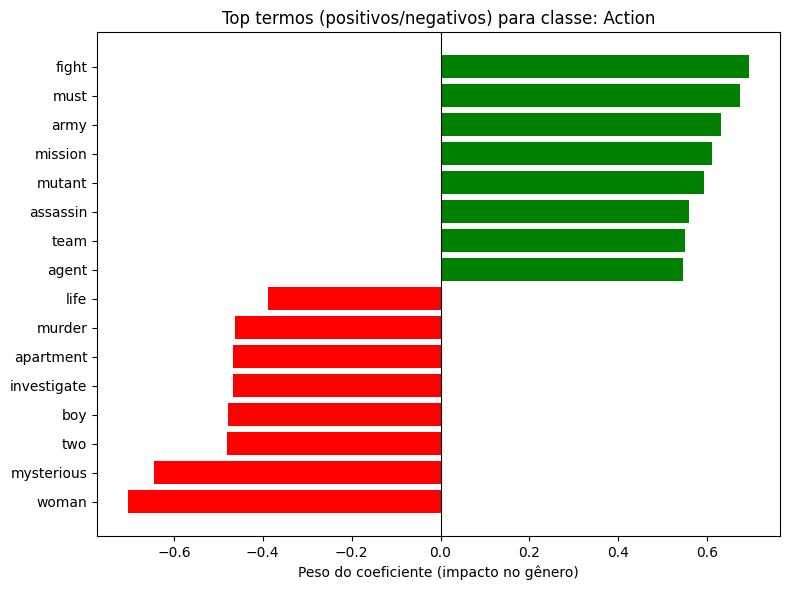

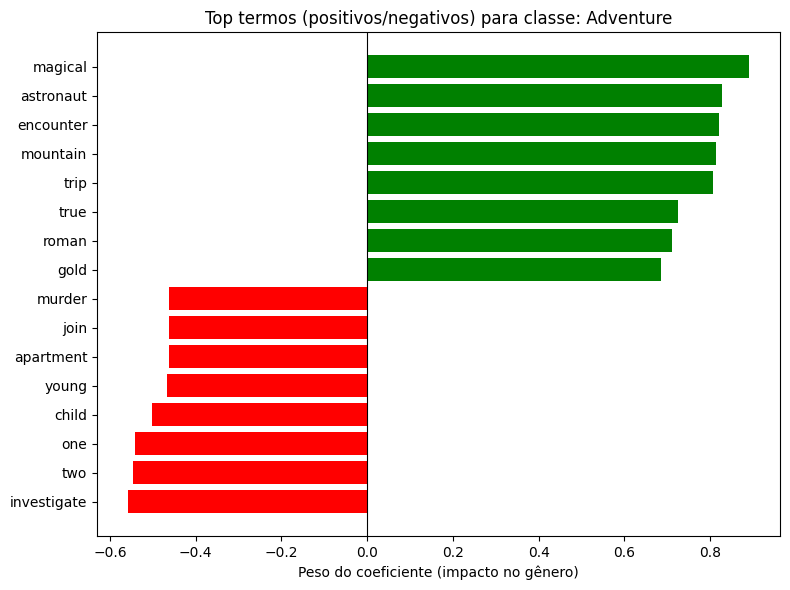

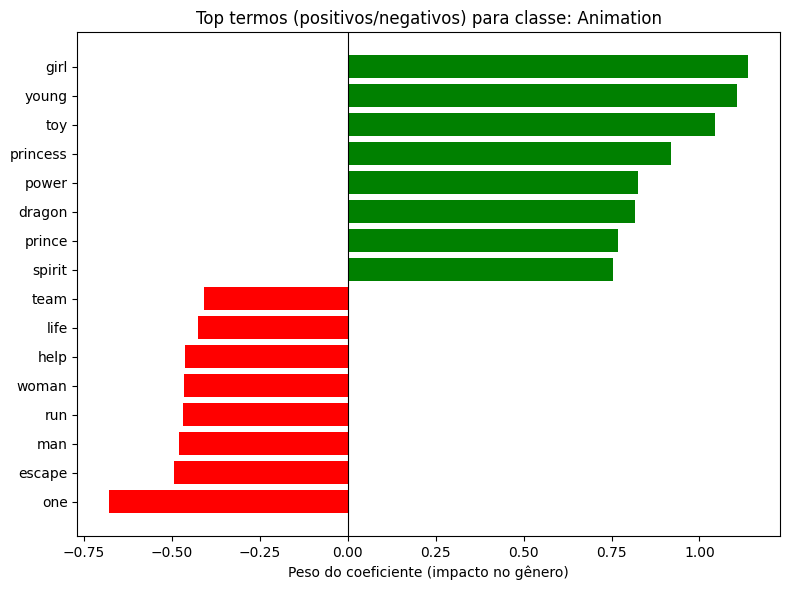

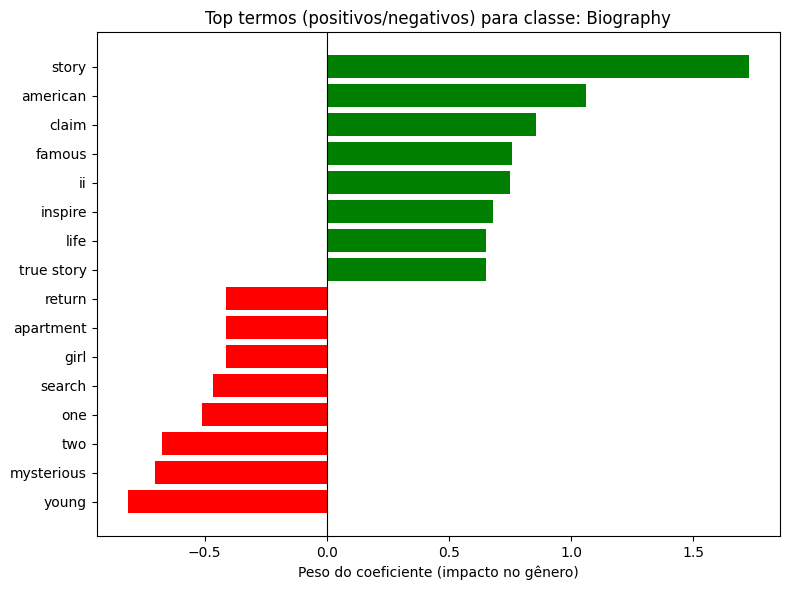

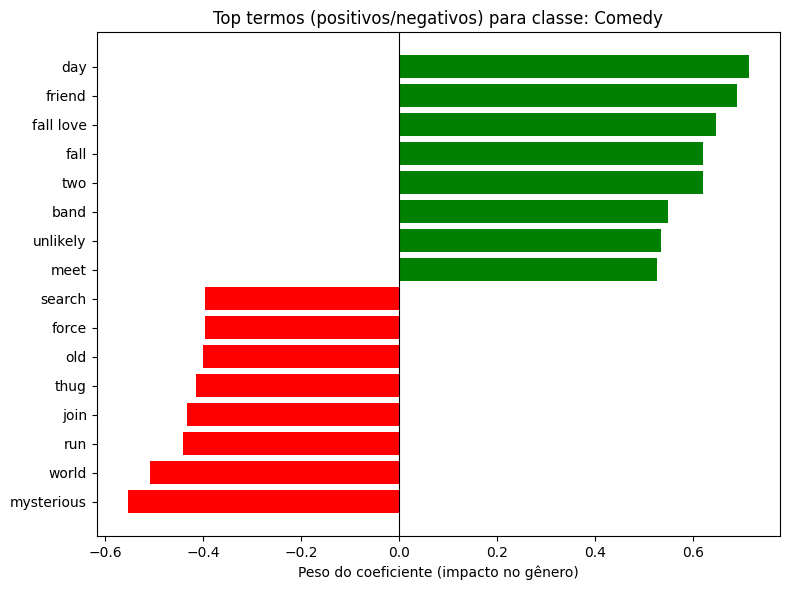

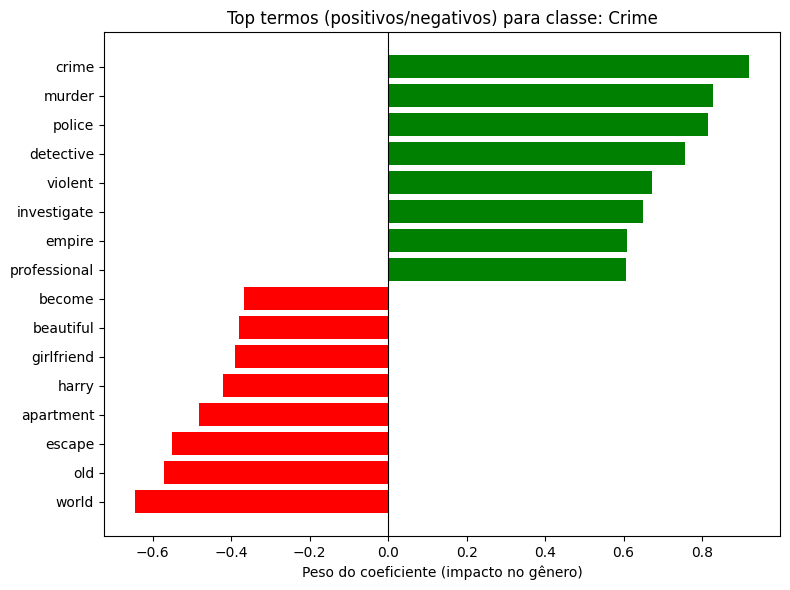

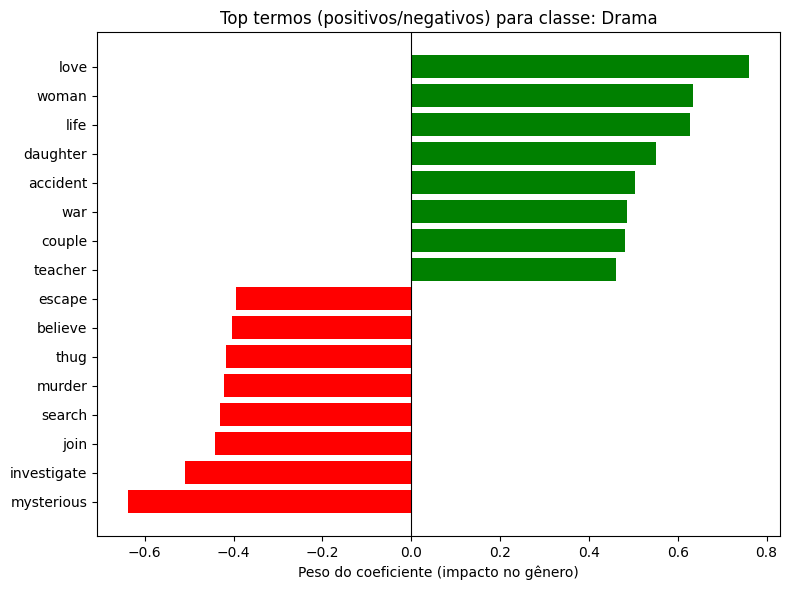

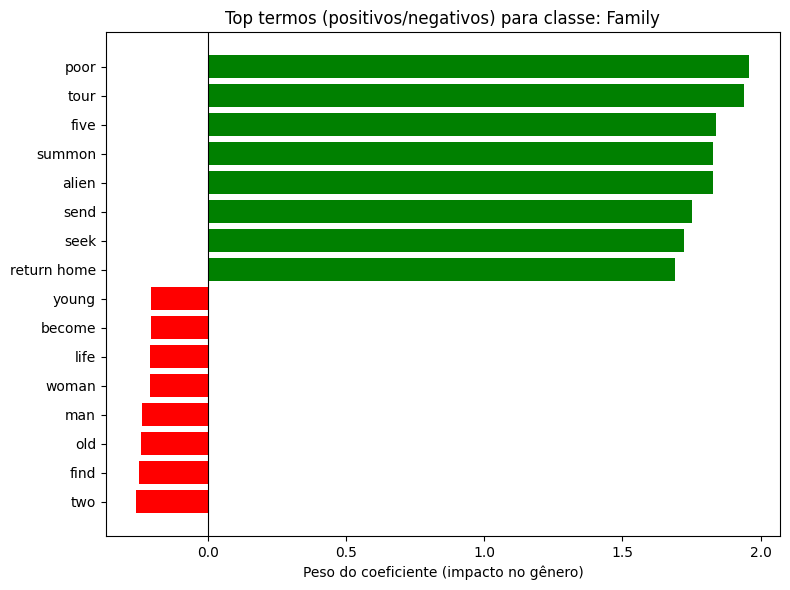

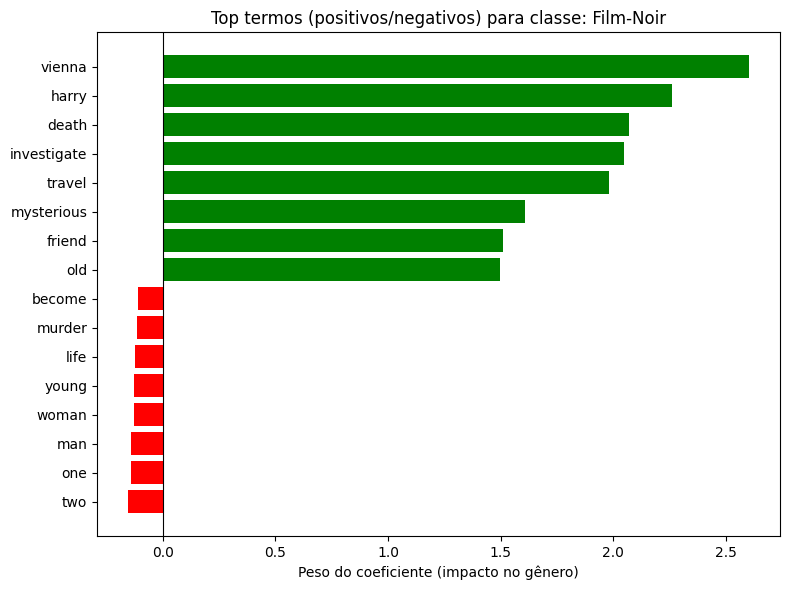

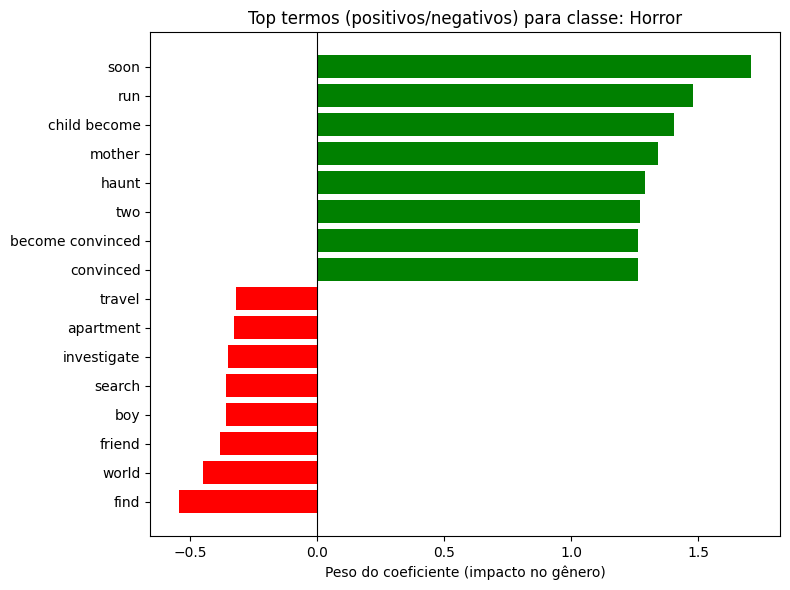

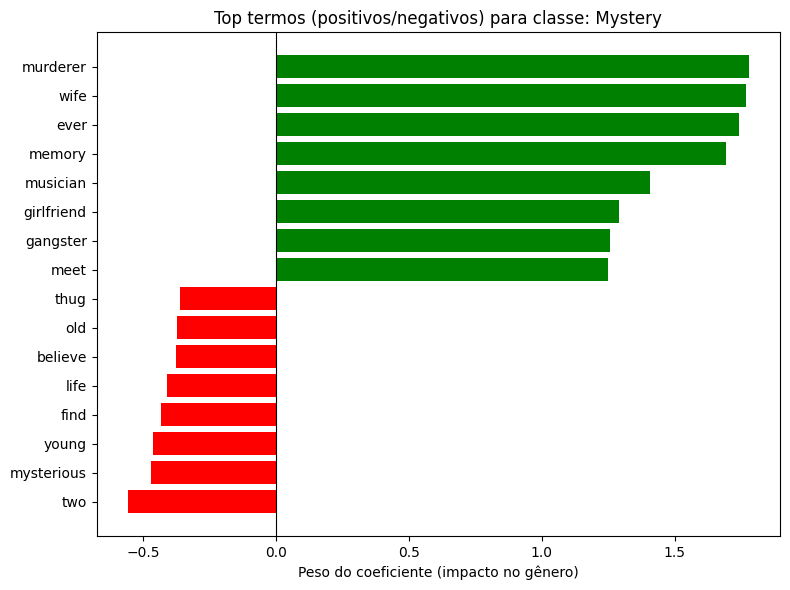

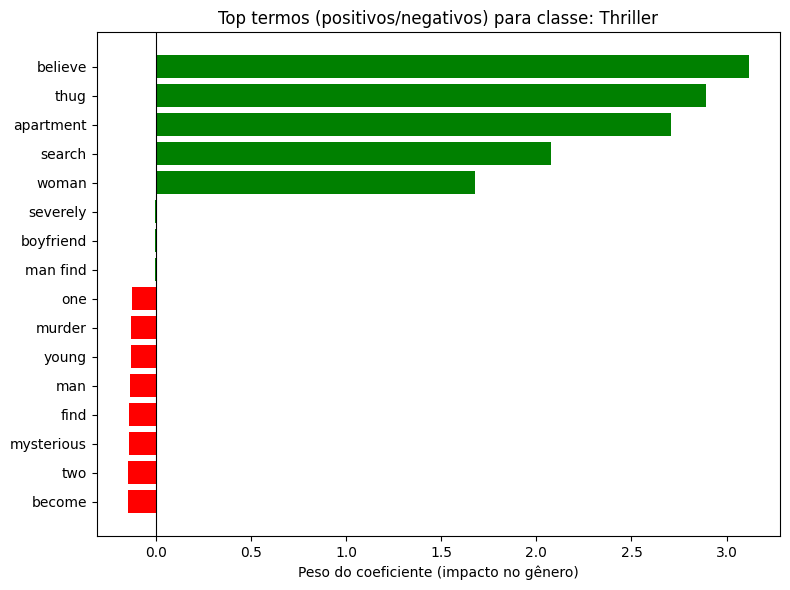

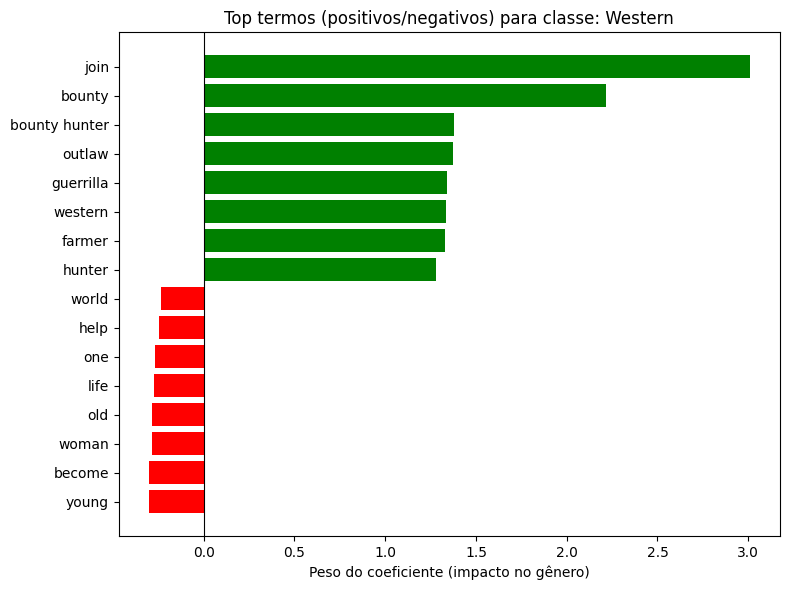

In [121]:
def plot_top_terms_for_class(cidx, k=8):
    """Plota os k termos mais positivos e negativos para uma classe."""
    coefs = lr.coef_[cidx]
    idx_pos = np.argsort(coefs)[-k:]          # maiores pesos (positivos)
    idx_neg = np.argsort(coefs)[:k]           # menores pesos (negativos)
    
    terms_pos = terms[idx_pos]
    terms_neg = terms[idx_neg]
    
    weights_pos = coefs[idx_pos]
    weights_neg = coefs[idx_neg]
    
    # juntar para plot
    all_terms = list(terms_neg) + list(terms_pos)
    all_weights = list(weights_neg) + list(weights_pos)
    colors = ["red"]*k + ["green"]*k
    
    plt.figure(figsize=(8,6))
    plt.barh(all_terms, all_weights, color=colors)
    plt.axvline(0, color="black", linewidth=0.8)
    plt.title(f"Top termos (positivos/negativos) para classe: {classes[cidx]}")
    plt.xlabel("Peso do coeficiente (impacto no g√™nero)")
    plt.tight_layout()
    plt.show()

# gerando gr√°ficos para todas as classes
for i, c in enumerate(classes):
    plot_top_terms_for_class(i, k=8)

Ao an√°lisar o gr√°fico do g√™nero Action podemos ver quais palavras mais influenciam na hora de classificar um filme como ‚ÄúA√ß√£o‚Äù. Os termos com maior peso positivo est√£o ligados a combate, miss√µes e trabalho em equipe, como *fight*, *must*, *army* e *mission*, que s√£o fortes indicadores desse g√™nero. J√° os termos com peso negativo, como *woman*, *mysterious*, *boy* e *investigate*, aparecem mais em filmes de drama ou mist√©rio e reduzem a chance de o filme ser classificado como a√ß√£o. Logo, o modelo reconhece filmes de a√ß√£o principalmente por palavras que remetem a confrontos e miss√µes, diferenciando-os daqueles que trazem elementos mais dram√°ticos ou de investiga√ß√£o.

N√£o vou me aprofundar na an√°lise dos outros g√áneros para economizar tempo, mas a l√≥gica segue a mesma.

## 4.4 - T√≥picos nos resumos e rela√ß√£o com IMDB/ROI

Agora queremos identificar temas ocultos nos resumos dos filmes que nem sempre correspondem aos g√™neros oficiais, e ver como esses t√≥picos se relacionam com a nota do IMDb e o ROI, trazendo insights tanto editoriais quanto de neg√≥cio.

A seguir transformaremos os resumos em uma matriz TF-IDF, que d√° mais peso a palavras informativas e menos √†s muito comuns. Isso ajuda a destacar termos discriminativos para modelos de t√≥picos. Usaremos `min_df=3` para ignorar palavras muito raras, `max_df=0.9` para remover as muito frequentes, e `ngram_range=(1,2)` para capturar tanto palavras isoladas quanto pares de palavras, como "true story".

In [122]:
# TF-IDF focado em t√≥picos
tfidf_topic = TfidfVectorizer(max_features=7000, min_df=3, max_df=0.9, ngram_range=(1,2))
X_topics = tfidf_topic.fit_transform(df_clean["overview_clean"])

Vamos agora fatorar a matriz TF-IDF em W e H para obter k t√≥picos interpret√°veis. W mostra a for√ßa de cada t√≥pico em cada documento, e H indica a import√¢ncia de cada palavra em cada t√≥pico. A escolha do n√∫mero de t√≥picos (k) √© importante e deve ser testada para encontrar a melhor.

In [123]:
# NMF
k = 8  # n¬∫ de t√≥picos; ajuste e compare coes√£o
nmf = NMF(n_components=k, random_state=42)
W = nmf.fit_transform(X_topics)  # docs x topics
H = nmf.components_               # topics x terms
terms = np.array(tfidf_topic.get_feature_names_out())

Vamos selecionar as palavras e bigrams com maior peso em cada t√≥pico para entender seu tema. Essa lista servir√° como descri√ß√£o sem√¢ntica, ajudando a nomear o t√≥pico e identificar seu conte√∫do, como por exemplo ‚Äúspace, battle‚Äù indicando sci-fi ou a√ß√£o.

In [124]:
# Top palavras por t√≥pico
for t in range(k):
    idx = np.argsort(H[t])[::-1][:12]
    print(f"\nT√≥pico {t}: " + ", ".join(terms[idx]))


T√≥pico 0: find, father, murder, son, go, try, family, wife, friend, must, mysterious, daughter

T√≥pico 1: war, world, world war, ii, war ii, german, jewish, english, army, nazi, lead, occupy

T√≥pico 2: new, york, new york, city, york city, work, movie, cop, discover, frank, worker, go

T√≥pico 3: love, fall, fall love, become, human, become human, girl, friend, difference, relationship, money, ill

T√≥pico 4: young, man, woman, young man, become, young woman, mother, one, journey, world, together, break

T√≥pico 5: year, old, year old, boy, school, family, old girl, girl, student, high, home, house

T√≥pico 6: life, story, day, live, tell, age, angeles, los, los angeles, four, street, discover

T√≥pico 7: two, woman, help, child, team, battle, become, friendship, con, soldier, ultimate, two man


A partir daqui vamos comparar as distribui√ß√µes de IMDB e ROI entre os t√≥picos usando boxplots para ver se certos temas tendem a ter notas ou retornos diferentes, queremos gerar insights editoriais e de neg√≥cio.

In [125]:
# Atribuir t√≥pico dominante por filme
df_topics = df_clean.copy()
df_topics["topic_dom"] = W.argmax(axis=1)

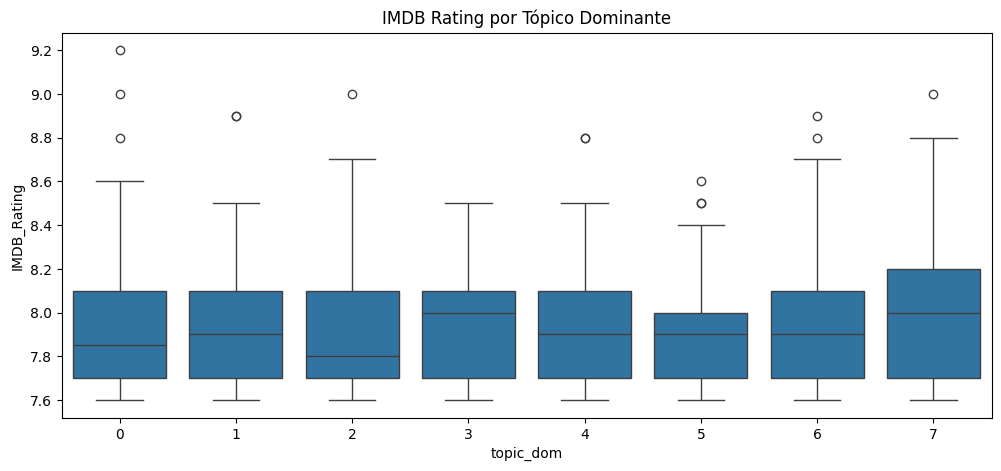

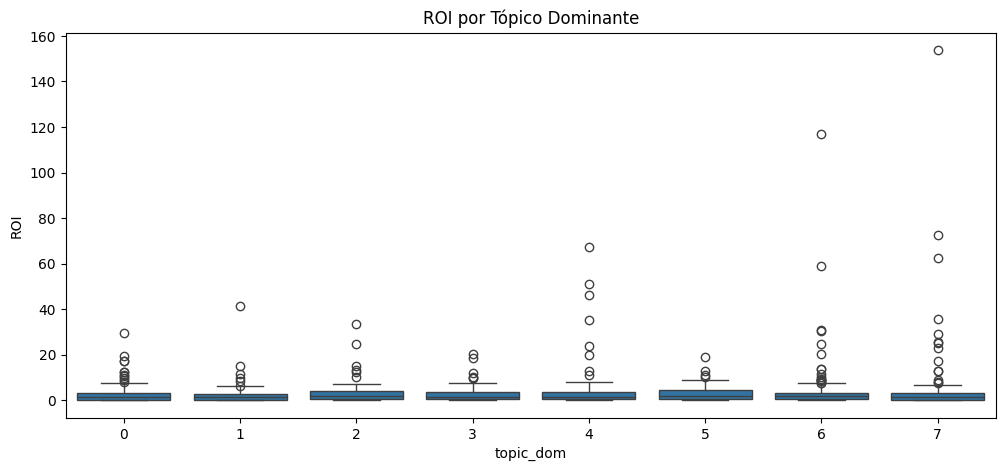

In [126]:
# Comparar IMDB/ROI por t√≥pico dominante
plt.figure(figsize=(12,5))
sns.boxplot(data=df_topics, x="topic_dom", y="IMDB_Rating")
plt.title("IMDB Rating por T√≥pico Dominante"); plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(data=df_topics, x="topic_dom", y="ROI")
plt.title("ROI por T√≥pico Dominante"); plt.show()

Pelos gr√°ficos, podemos ver que as notas m√©dias no IMDB s√£o altas para todos os t√≥picos, mostrando que a qualidade percebida pelo p√∫blico n√£o depende do tipo de hist√≥ria. J√° o ROI √© baixo na maioria dos filmes, mas alguns t√≥picos se destacam com potencial para retornos maiores, especialmente os t√≥picos 6 (com palavras como *life*, *story*, *los angeles*) e 7 (*battle*, *soldier*, *team*), que apresentam os outliers de ROI mais altos.

In [127]:
# Agrupar o ROI por t√≥pico dominante
groups = [g["ROI"].dropna() for _, g in df_topics.groupby("topic_dom")]
# Teste Kruskal-Wallis
stat, p = kruskal(*groups)
# Imprimir resultado com interpreta√ß√£o
print(f"Kruskal-Wallis ROI ~ t√≥pico: H={stat:.2f}, p={p:.4f}")

if p < 0.05:
    print("Rejeitamos H‚ÇÄ: h√° diferen√ßa significativa do ROI entre os t√≥picos.")
else:
    print("N√£o rejeitamos H‚ÇÄ: n√£o h√° evid√™ncia de diferen√ßa significativa do ROI entre os t√≥picos.")

Kruskal-Wallis ROI ~ t√≥pico: H=7.99, p=0.3339
N√£o rejeitamos H‚ÇÄ: n√£o h√° evid√™ncia de diferen√ßa significativa do ROI entre os t√≥picos.


In [128]:
# Agrupar IMDB por t√≥pico dominante
groups = [g["IMDB_Rating"].dropna() for _, g in df_topics.groupby("topic_dom")]
# Teste Kruskal-Wallis
stat, p = kruskal(*groups)
# Imprimir resultado com interpreta√ß√£o
print(f"Kruskal-Wallis IMDB ~ t√≥pico: H={stat:.2f}, p={p:.4f}")

if p < 0.05:
    print("Rejeitamos H‚ÇÄ: h√° diferen√ßa significativa de IMDB entre os t√≥picos.")
else:
    print("N√£o rejeitamos H‚ÇÄ: n√£o h√° evid√™ncia de diferen√ßa significativa de IMDB entre os t√≥picos.")

Kruskal-Wallis IMDB ~ t√≥pico: H=6.00, p=0.5403
N√£o rejeitamos H‚ÇÄ: n√£o h√° evid√™ncia de diferen√ßa significativa de IMDB entre os t√≥picos.


Aqui com os testes confirmamos que n√£o existe influencia dos t√≥picos com a nota IMDB e ROI, apenas em casos extremos onde temos a presen√ßa de outliers.

## 4.5 - Overview em franquias

Ser√° que filmes de franquia possuem sinopses maiores (mais detalhadas) ou menores (mais diretas)?

Para essa an√°lise, vamos testar algumas hip√≥teses:

* H0: O tamanho m√©dio da sinopse √© igual para filmes de franquia e n√£o franquia.

* H1: O tamanho m√©dio da sinopse difere entre franquias e n√£o franquias.

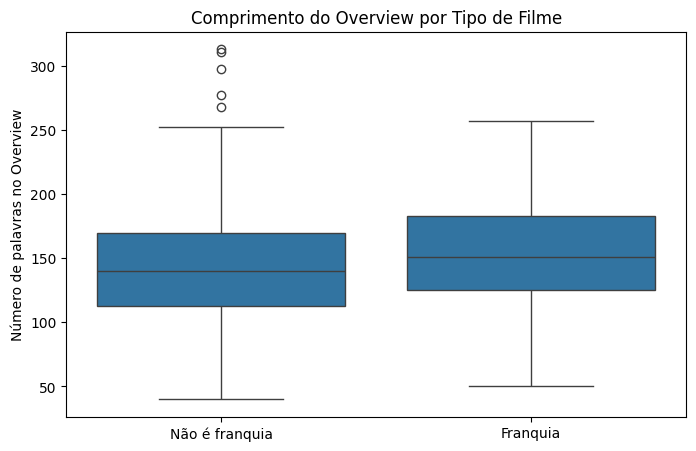

In [129]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean, x="is_franchise", y="overview_len")
plt.xticks([0,1], ["N√£o √© franquia", "Franquia"])
plt.title("Comprimento do Overview por Tipo de Filme")
plt.ylabel("N√∫mero de palavras no Overview")
plt.xlabel("")
plt.show()

In [130]:
franchise_len = df_clean[df_clean["is_franchise"]==True]["overview_len"]
non_franchise_len = df_clean[df_clean["is_franchise"]==False]["overview_len"]

stat, p = ttest_ind(franchise_len, non_franchise_len, equal_var=False, nan_policy="omit")
if p < 0.05:
    print(f"Rejeitamos H‚ÇÄ: diferen√ßa significativa (p={p:.4f})")
else:
    print(f"N√£o rejeitamos H‚ÇÄ: sem diferen√ßa significativa (p={p:.4f})")

Rejeitamos H‚ÇÄ: diferen√ßa significativa (p=0.0128)


Vemos que os filmes de franquia costumam ter overviews mais longos que os originais, sugerindo que os est√∫dios d√£o mais detalhes para refor√ßar o enredo da saga. Essa diferen√ßa, embora sutil, foi confirmada pelo teste de hip√≥teses, que apontou signific√¢ncia estat√≠stica.

## 4.6 - Palavras-chave mais comuns em franquias vs n√£o franquias

Uma id√©ia que me veio a cabe√ßa √© se em franquias se usam mais termos como hero, battle, war, return, saga, enquanto filmes independentes usam palavras outras palavras, ser√° que mudam algo?

Aqui usamos o **CountVectorizer** para montar um vocabul√°rio com as 50 palavras mais relevantes, ignorando as stopwords em ingl√™s. A ideia √© simplificar e destacar as palavras mais frequentes em cada grupo, para assim facilitar a visualiza√ß√£o.

In [131]:
vec = CountVectorizer(stop_words="english", max_features=50)

Aqui aplicamos o **fit\_transform** em cada grupo (franquias e n√£o franquias) para contar as palavras mais usadas. Gerando um ranking local de termos em cada conjunto.

In [132]:
franchise_words = vec.fit_transform(df_clean[df_clean["is_franchise"]==True]["overview_clean"])
non_franchise_words = vec.fit_transform(df_clean[df_clean["is_franchise"]==False]["overview_clean"])

Aqui iremos somar as ocorr√™ncias das palavras, e organizar em DataFrames, usaremos **sns.barplot** para mostrar as mais frequentes. O objetivo √© destacar visualmente as diferen√ßas de vocabul√°rio entre filmes de franquias e n√£o-franquias.

In [133]:
franchise_counts = np.asarray(franchise_words.sum(axis=0)).ravel()
non_franchise_counts = np.asarray(non_franchise_words.sum(axis=0)).ravel()

franchise_top = pd.DataFrame({"word": vec.get_feature_names_out(), "count": franchise_counts}).sort_values("count", ascending=False).head(15)
non_franchise_top = pd.DataFrame({"word": vec.get_feature_names_out(), "count": non_franchise_counts}).sort_values("count", ascending=False).head(15)

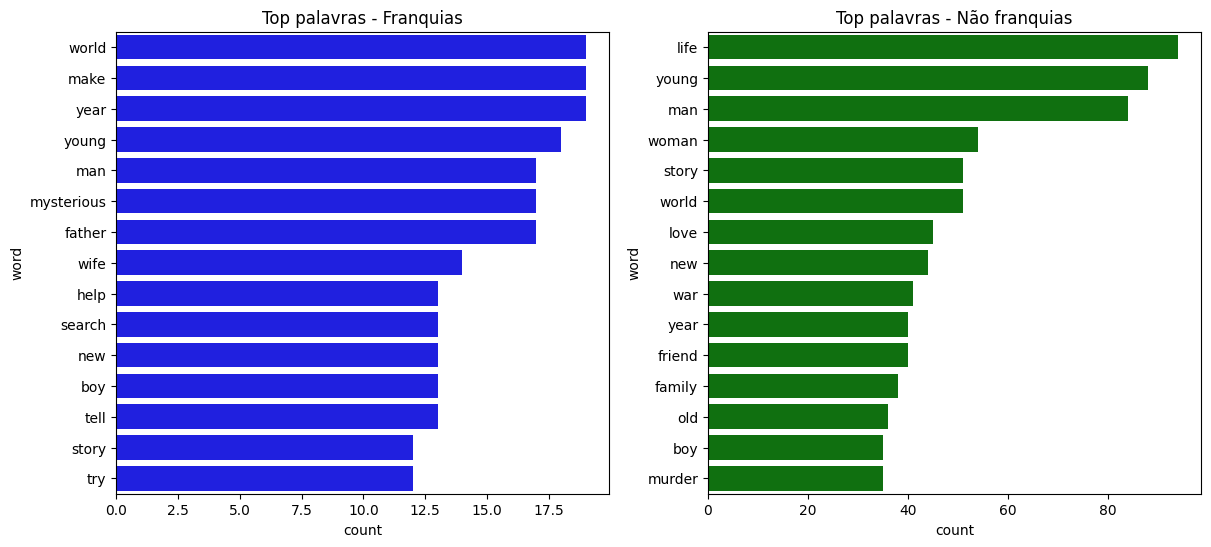

In [134]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
sns.barplot(data=franchise_top, x="count", y="word", ax=axes[0], color="blue")
axes[0].set_title("Top palavras - Franquias")
sns.barplot(data=non_franchise_top, x="count", y="word", ax=axes[1], color="green")
axes[1].set_title("Top palavras - N√£o franquias")
plt.show()

Podemos notar que h√° diferen√ßas sutis, mas importantes, entre os temas mais comuns em filmes de franquias e n√£o-franquias. Nos filmes de franquias, aparecem com frequ√™ncia palavras ligadas a ca√ßada, mist√©rio e rela√ß√µes familiares, sugerindo enredos √©picos com miss√µes, universos complexos e personagens em busca de algo, muitas vezes dentro de din√¢micas familiares. J√° nos filmes n√£o-franquias, os termos mais recorrentes est√£o relacionados a emo√ß√µes, rela√ß√µes humanas, temas sociais e a vida, indicando hist√≥rias mais pessoais, dram√°ticas ou voltadas para experi√™ncias de vida e conflitos sociais.

### üé¨ Compara√ß√£o de Temas: Franquias vs. N√£o-Franquias

| Aspecto                  | Franquias                        | N√£o-Franquias                     |
|--------------------------|----------------------------------|-----------------------------------|
| **Temas principais**     | Aventura, mist√©rio, jornada      | Emo√ß√µes, rela√ß√µes, sociedade      |
| **Personagens centrais** | Jovens, figuras paternas         | Homens, mulheres, amigos, fam√≠lia |
| **Narrativa**            | Miss√£o, busca, constru√ß√£o de mundo | Vida, amor, guerra, assassinato   |

## 4.7 - Conclus√µes

A an√°lise da coluna Overview mostra que os resumos dos filmes trazem informa√ß√µes interessantes sobre os g√™neros. Cada g√™nero tem seu pr√≥prio padr√£o de vocabul√°rio: filmes de a√ß√£o, aventura e anima√ß√£o falam mais de combates, miss√µes e explora√ß√£o; dramas, crimes e terror se concentram em rela√ß√µes humanas, conflitos e tens√£o; com√©dias abordam situa√ß√µes leves e relacionamentos; e biografias contam hist√≥rias de vida e conquistas. Algumas palavras, como ‚Äúyoung‚Äù, ‚Äúman‚Äù e ‚Äúlife‚Äù, aparecem em v√°rios g√™neros, mostrando temas universais sobre personagens e crescimento.

Mesmo que as Overview sejam muitas vezes gen√©ricas, o modelo LinearSVC junto com TF-IDF conseguiu identificar sinais importantes sobre o g√™nero. O teste de permuta√ß√£o confirmou que esses sinais s√£o estatisticamente significativos (p-valor = 0,005), mesmo que o desempenho geral do modelo seja limitado (F1_macro = 0,222). Algumas palavras ajudam muito na classifica√ß√£o: por exemplo, fight, army e mission indicam que o filme √© de a√ß√£o, enquanto woman, mysterious e investigate diminuem essa probabilidade.

Quando olhamos para os t√≥picos latentes nos resumos e seu impacto em avalia√ß√£o e retorno financeiro, vemos que a nota m√©dia no IMDB √© alta em todos os temas, mostrando que a percep√ß√£o de qualidade n√£o depende muito do tipo de hist√≥ria. J√° o ROI costuma ser n√£o t√£o alto na maioria dos filmes, mas alguns t√≥picos, ligados a palavras como life, story, battle, soldier e team, apresentam casos de retorno financeiro maior, indicando que certos temas podem gerar mais lucro.

Tamb√©m percebemos diferen√ßas entre filmes de franquias e filmes originais. Os resumos de franquias s√£o, em m√©dia, mais longos, refor√ßando o enredo e os personagens de sagas complexas, com foco em aventura, mist√©rio e rela√ß√µes familiares. Os filmes originais, por outro lado, exploram mais emo√ß√µes, experi√™ncias de vida e conflitos sociais, trazendo narrativas mais pessoais e dram√°ticas.

No geral, os resumos trazem sinais importantes sobre g√™nero e tem√°tica, mas d√° para melhorar a predi√ß√£o. Algumas ideias s√£o: agrupar g√™neros raros, aumentar a quantidade de dados, usar modelos de NLP mais avan√ßados como BERT ou embeddings pr√©-treinados, e combinar os dados dos resumos com informa√ß√µes estruturadas, como dura√ß√£o, n√∫mero de votos e ROI. Com isso, o modelo conseguiria identificar padr√µes mais claros e ter um desempenho melhor.

# 5 - Transforma√ß√£o dos dados para modelos de Machine Learning

## 5.1 - Remo√ß√£o de vari√°veis n√£o necess√°rias

No pr√©-processamento para a constru√ß√£o do modelo de **machine learning**, inicialmente decidi remover algumas vari√°veis que n√£o fazem nenhum sentido manter no dataset por n√£o serem relevantes ou por poderem prejudicar o desempenho do modelo. As vari√°veis removidas ser√£o:

* **`overview_clean` e `Overview`**: cont√™m o texto completo do resumo dos filmes. Textos precisam ser tratados separadamente (por TF-IDF, embeddings ou outro m√©todo de NLP). eles n√£o apresentaram nenhuma rela√ß√£o com a nota do IMDB nas nossas EDA.
* **`overview_bin`**: √© uma vers√£o binarizada do resumo, que n√£o traz informa√ß√£o quantitativa suficiente para a predi√ß√£o do alvo.
* **`Gross`, `Production Budget` e `ROI`**: s√£o informa√ß√µes financeiras que podem **vazar dados do futuro**, caso o modelo esteja sendo treinado para prever ROI ou desempenho do filme. Incluir essas vari√°veis poderia levar a um **data leakage**, comprometendo a validade do modelo.
* **`Series_Title`**: s√£o informa√ß√µes de identifica√ß√£o que j√° ser√£o representadas de outra forma (por exemplo, o g√™nero principal pode ser alvo ou codificado).
* **`Genre`**: √© uma informa√ß√£o que j√° est√° duplicada, pois fizemos sua transforma√ß√£o em `Main_Genre`, que ser√° a vari√°vel usada*
* **`Released_Year`**: mesmo que o ano de lan√ßamento seja um bom preditor da nota do IMDB, n√£o o utilizaremos, pois nosso objetivo √© identificar quais vari√°veis influenciam mais as avalia√ß√µes de novos lan√ßamentos, ou seja, todos ter√£o idade zero.
* **`Stars`**: vamos remover tamb√©m as colunas com os atores dos filmes, pois posterioemente estava causando overfitting nos nossos modelos de machine learning, devido a adi√ß√£o dessas vari√°veis.


Com a remo√ß√£o dessas vari√°veis estamos em busca de:

1. Reduzir ru√≠do no modelo.
2. Evitar **data leakage**.
3. Garantir que o modelo use apenas informa√ß√µes que poderiam estar dispon√≠veis **no momento da previs√£o**.
4. Facilitar a aplica√ß√£o de t√©cnicas de pr√©-processamento adequadas para cada tipo de dado (texto, num√©rico ou categ√≥rico).


In [135]:
df_model = df_clean.drop(columns=['overview_clean', 'overview_bin', 'Gross', 'Production Budget', 
                                  'ROI', 'Overview', 'Series_Title', 'Genre', 'Released_Year', 
                                  "Star1", "Star2", "Star3", "Star4"])

In [136]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 790 entries, 0 to 996
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Certificate   790 non-null    object 
 1   Runtime       790 non-null    int64  
 2   IMDB_Rating   790 non-null    float64
 3   Meta_score    790 non-null    float64
 4   Director      790 non-null    object 
 5   No_of_Votes   790 non-null    int64  
 6   is_franchise  790 non-null    bool   
 7   overview_len  790 non-null    int64  
 8   Main_Genre    790 non-null    object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 56.3+ KB


In [137]:
df_model.head()

Certificate  Runtime  IMDB_Rating  Meta_score              Director  \
0           A      175          9.2       100.0  Francis Ford Coppola   
1          UA      152          9.0        84.0     Christopher Nolan   
2           A      202          9.0        90.0  Francis Ford Coppola   
3           U       96          9.0        96.0          Sidney Lumet   
4           U      201          8.9        94.0         Peter Jackson   

   No_of_Votes  is_franchise  overview_len Main_Genre  
0      1620367          True           110      Crime  
1      2303232          True           189     Action  
2      1129952          True           164      Crime  
3       689845         False           113      Crime  
4      1642758          True           146     Action

## 5.2 - Transforma√ß√µes a serem realizadas

| Vari√°vel        | Tipo       | Transforma√ß√£o que usaremos                       | Por que usar isso?                                                                              |
| --------------- | ---------- | ----------------------------------------------- | ----------------------------------------------------------------------------------------------- |
| Runtime         | num√©rica   | Escalonamento (Standard/MinMax)                 | Pra que o tempo de filme n√£o pese mais que outras vari√°veis no modelo.                          |
| Meta\_score     | num√©rica   | Escalonamento                                   | Mesmo motivo do Runtime: normalizar a escala ajuda o modelo a aprender melhor.                  |
| No\_of\_Votes   | num√©rica   | Log + Escalonamento                             | Reduz os valores muito altos, deixando a distribui√ß√£o mais equilibrada e f√°cil de modelar.      |
| overview\_len   | num√©rica   | Log opcional + Escalonamento                    | Evita que filmes com resumos gigantes distor√ßam o modelo, al√©m de ajudar a lidar com outliers.    |
| Certificate     | categ√≥rica | OneHotEncoder                                   | Transformar texto em n√∫meros sem criar ordens falsas; cada categoria vira uma coluna.           |
| Director        | categ√≥rica | Target Encoding              | Reduz muitas categorias e mostra a rela√ß√£o do diretor com a nota m√©dia.                         |
| Star1-4         | categ√≥rica | Target Encoding              | Mesma ideia do diretor: atores principais podem influenciar, mas sem criar centenas de colunas. |
| Main\_Genre     | categ√≥rica | OneHotEncoder ou Target Encoding                | Mostra o g√™nero do filme sem assumir que um g√™nero √© maior ou menor que outro.                  |
| is\_franchise   | booleana   | 0/1 direto                                      | J√° √© num√©rica e indica se o filme √© de uma franquia; direto pro modelo.                         |

## 5.3 - Num√©ricas

Vamos trabalhar com as vari√°veis Runtime, Meta\_score, No\_of\_Votes e overview\_len. Runtime e Meta\_score apenas ser√£o escalonadas, enquanto No\_of\_Votes e overview\_len ter√£o antes uma transforma√ß√£o log(1+x) para diminuir o efeito de valores muito altos ou outliers, e depois tamb√©m ser√£o escalonadas.

In [138]:
# Fun√ß√£o para log-transform
log_transformer = FunctionTransformer(np.log1p)

# Pipeline para as num√©ricas
num_pipeline = ColumnTransformer([
    ("runtime_meta", StandardScaler(), ["Runtime", "Meta_score"]),
    ("log_votes_len", Pipeline([
        ("log", log_transformer),
        ("scaler", StandardScaler())
    ]), ["No_of_Votes", "overview_len"])
])

## 5.4 - Categ√≥ricas para OneHotEncoder

Temos a vari√°vel Certificate, que vamos transformar em colunas bin√°rias para cada categoria, sem assumir nenhuma ordem entre elas.

In [139]:
cat_ohe_pipeline = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

## 5.5 - Categ√≥ricas para Target Encoding

Temos as vari√°veis Director e Main_Genree, que vamos substituir pelo valor m√©dio da nota do IMDB para cada categoria, reduzindo a dimensionalidade sem perder informa√ß√£o.

In [140]:
cat_te_pipeline = ce.TargetEncoder(cols=["Director", "Main_Genre"])

## 5.6 - Booleana

Temos a vari√°vel is\_franchise, que vamos transformar de True/False para 1/0.

In [141]:
bool_pipeline = FunctionTransformer(lambda x: x.astype(int))

## 5.7 - Montando o ColumnTransformer final

Estamos criando um `ColumnTransformer` que prepara todas as vari√°veis do dataset para o modelo. As num√©ricas (**Runtime, Meta\_score, No\_of\_Votes, overview\_len**) s√£o escalonadas e algumas passam por log para reduzir outliers. **Certificate** vira colunas bin√°rias, enquanto os nomes de diretores e estrelas (**Director, Star1-4**) s√£o substitu√≠dos pelo valor m√©dio de IMDB para reduzir dimensionalidade. Por fim, **is\_franchise** √© transformada de True/False para 1/0. Assim, todos os dados ficam prontos para o modelo.

In [142]:
preprocessor = ColumnTransformer([
    ("num", num_pipeline, ["Runtime", "Meta_score", "No_of_Votes", "overview_len"]),
    ("cat_ohe", cat_ohe_pipeline, ["Certificate"]),
    ("cat_te", cat_te_pipeline, ["Director", "Main_Genre"]),
    ("bool", bool_pipeline, ["is_franchise"])
])

Vamos ajustar (fit) o preprocessor

In [143]:
# Sabendo que a vari√°vel alvo √© IMDB_Rating
y = df_model["IMDB_Rating"]

preprocessor.fit(df_model, y=y)  # passando o y porque TargetEncoder precisa

ColumnTransformer(transformers=[('num',
                                 ColumnTransformer(transformers=[('runtime_meta',
                                                                  StandardScaler(),
                                                                  ['Runtime',
                                                                   'Meta_score']),
                                                                 ('log_votes_len',
                                                                  Pipeline(steps=[('log',
                                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                                  ('scaler',
                                                                                   StandardScaler())]),
                                                                  ['No_of_Votes',
                                                                   'overview_len'])]),
                                 ['Runtime', 'Meta_score', 'No_of_Votes',
                                  'overview_len']),
                                ('cat_ohe',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Certificate']),
                                ('cat_te',
                                 TargetEncoder(cols=['Director', 'Main_Genre']),
                                 ['Director', 'Main_Genre']),
                                ('bool',
                                 FunctionTransformer(func=<function <lambda> at 0x000001713E2799E0>),
                                 ['is_franchise'])])

In [144]:
df_transformed = preprocessor.transform(df_model)

In [145]:
print(df_transformed.shape)  # linhas x colunas transformadas

(790, 19)


Transformando de volta para um Dataframe

In [146]:
# Nomes das colunas num√©ricas
num_cols = ["Runtime", "Meta_score", "No_of_Votes", "overview_len"]

# Nomes das colunas OneHotEncoder
ohe_cols = preprocessor.named_transformers_["cat_ohe"].get_feature_names_out(["Certificate"])

# TargetEncoder mant√©m os nomes originais
te_cols = ["Director", "Main_Genre"]

# Booleana
bool_cols = ["is_franchise"]

# Todos juntos
all_cols = list(num_cols) + list(ohe_cols) + list(te_cols) + bool_cols

# Criar DataFrame final
df_transformed = pd.DataFrame(df_transformed, columns=all_cols)

In [147]:
df_transformed.head()

Runtime  Meta_score  No_of_Votes  overview_len  Certificate_A  \
0  1.854351    1.874422     1.981748     -0.835177            1.0   
1  1.018904    0.546207     2.304967      0.958737            0.0   
2  2.835092    1.044288     1.650426      0.487880            1.0   
3 -1.015226    1.542368     1.196873     -0.746171            0.0   
4  2.798769    1.376342     1.994362      0.102349            0.0   

   Certificate_Approved  Certificate_G  Certificate_GP  Certificate_PG  \
0                   0.0            0.0             0.0             0.0   
1                   0.0            0.0             0.0             0.0   
2                   0.0            0.0             0.0             0.0   
3                   0.0            0.0             0.0             0.0   
4                   0.0            0.0             0.0             0.0   

   Certificate_PG-13  Certificate_Passed  Certificate_R  Certificate_U  \
0                0.0                 0.0            0.0            0.0   
1                0.0                 0.0            0.0            0.0   
2                0.0                 0.0            0.0            0.0   
3                0.0                 0.0            0.0            1.0   
4                0.0                 0.0            0.0            1.0   

   Certificate_U/A  Certificate_UA  Certificate_Unrated  Director  Main_Genre  \
0              0.0             0.0                  0.0  8.023502    8.033593   
1              0.0             1.0                  0.0  8.060557    7.948551   
2              0.0             0.0                  0.0  8.023502    8.033593   
3              0.0             0.0                  0.0  7.966456    8.033593   
4              0.0             0.0                  0.0  8.023502    7.948551   

   is_franchise  
0           1.0  
1           1.0  
2           1.0  
3           0.0  
4           1.0

In [148]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Runtime               790 non-null    float64
 1   Meta_score            790 non-null    float64
 2   No_of_Votes           790 non-null    float64
 3   overview_len          790 non-null    float64
 4   Certificate_A         790 non-null    float64
 5   Certificate_Approved  790 non-null    float64
 6   Certificate_G         790 non-null    float64
 7   Certificate_GP        790 non-null    float64
 8   Certificate_PG        790 non-null    float64
 9   Certificate_PG-13     790 non-null    float64
 10  Certificate_Passed    790 non-null    float64
 11  Certificate_R         790 non-null    float64
 12  Certificate_U         790 non-null    float64
 13  Certificate_U/A       790 non-null    float64
 14  Certificate_UA        790 non-null    float64
 15  Certificate_Unrated   7

# 6 - Sele√ß√£o das vari√°veis para o modelo de Machine learning

Para escolher as vari√°veis mais importantes pra prever a nota do IMDB, vamos usar tr√™s m√©todos diferentes:

1. EDA (explora√ß√£o dos dados):
Primeiro, olhamos os dados e as distribui√ß√µes das vari√°veis, vendo quais parecem ter rela√ß√£o com a nota. Isso j√° ajuda a filtrar algumas que provavelmente n√£o v√£o contribuir muito pro modelo.

2. √Årvores de decis√£o (Feature Importance):
Depois, treinamos uma √°rvore de decis√£o. Ela mostra quais vari√°veis realmente ajudam a reduzir o erro na previs√£o. As mais importantes continuam no modelo, e as que quase n√£o ajudam podem ser descartadas. Esse m√©todo tamb√©m pega rela√ß√µes mais complexas entre as vari√°veis.

3. Information Value (IV):
Por fim, usamos o IV, que mede o poder preditivo das vari√°veis, principalmente as categ√≥ricas. Quanto maior o IV, mais relevante √© a vari√°vel pra separar notas altas e baixas.

A ideia √© combinar esses tr√™s m√©todos: EDA pra vis√£o geral, √°rvore pra capturar efeitos e intera√ß√µes, e IV pra confirmar o que realmente separa bem o alvo. No fim, a gente fica com as vari√°veis que realmente importam pra prever o IMDB.

## 6.1 - EDA (explora√ß√£o dos dados)

Abaixo deixarei uma tabela com as vari√°veis selecionadas atrav√©s da EDA.

| Prioridade | Vari√°vel        | Tipo       | Por que incluir?                                                              |
| ---------- | --------------- | ---------- | ----------------------------------------------------------------------------- |
| 1          | Runtime         | Num√©rica   | Filmes entre 100‚Äì140 min tendem a ter notas melhores; captura dura√ß√£o ideal.  |
| 2          | No\_of\_Votes   | Num√©rica   | Reflete popularidade; mais votos indicam leve tend√™ncia a notas altas.        |
| 3          | Meta\_score     | Num√©rica   | Cr√≠ticas profissionais geralmente correlacionam com a nota IMDB.              |
| 4          | Main\_Genre     | Categ√≥rica | Alguns g√™neros (Western, Mystery, Film-Noir) t√™m notas mais altas.            |
| 5          | Director        | Categ√≥rica | Diretores consistentes (Nolan, Tarantino) influenciam positivamente a nota.   |
| 6          | is\_franchise   | Booleana   | Franquias podem ter efeito indireto via popularidade e ROI.                   |
| 7          | Certificate     | Categ√≥rica | Pode mostrar algum padr√£o, mesmo que pequeno, entre notas e classifica√ß√£o.    |

## 6.2 - √Årvores de decis√£o (Feature Importance)

Agora vamos preparar os dados, separando-os em conjuntos de treino e teste, que ser√£o usados em todos os modelos de machine learning daqui em diante.

In [149]:
X = df_transformed
y

# Dividir em treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Agora iremos iniciar o treinamento do modelo Decision Tree

In [150]:
dt = DecisionTreeRegressor(
    random_state=42,
    max_depth=10,          # limita a profundidade da √°rvore para evitar overfitting
    min_samples_split=10, # n√∫mero m√≠nimo de amostras para dividir um n√≥
    min_samples_leaf=5,   # n√∫mero m√≠nimo de amostras em uma folha
    max_features="sqrt"   # considera apenas a raiz quadrada do total de features em cada split
)

dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=10, random_state=42)

Agora √© hora de extrair feature importances

In [151]:
importances = dt.feature_importances_
fi_df = pd.DataFrame({
    "feature": X.columns, 
    "importance": importances
}).sort_values(by="importance", ascending=False)

In [152]:
fi_df.head(15)  # mostrar top 15

feature  importance
2            No_of_Votes    0.395104
16              Director    0.261453
0                Runtime    0.122162
3           overview_len    0.061609
1             Meta_score    0.061457
17            Main_Genre    0.043775
11         Certificate_R    0.020410
18          is_franchise    0.013174
6          Certificate_G    0.009699
10    Certificate_Passed    0.006576
4          Certificate_A    0.004582
9      Certificate_PG-13    0.000000
8         Certificate_PG    0.000000
7         Certificate_GP    0.000000
5   Certificate_Approved    0.000000

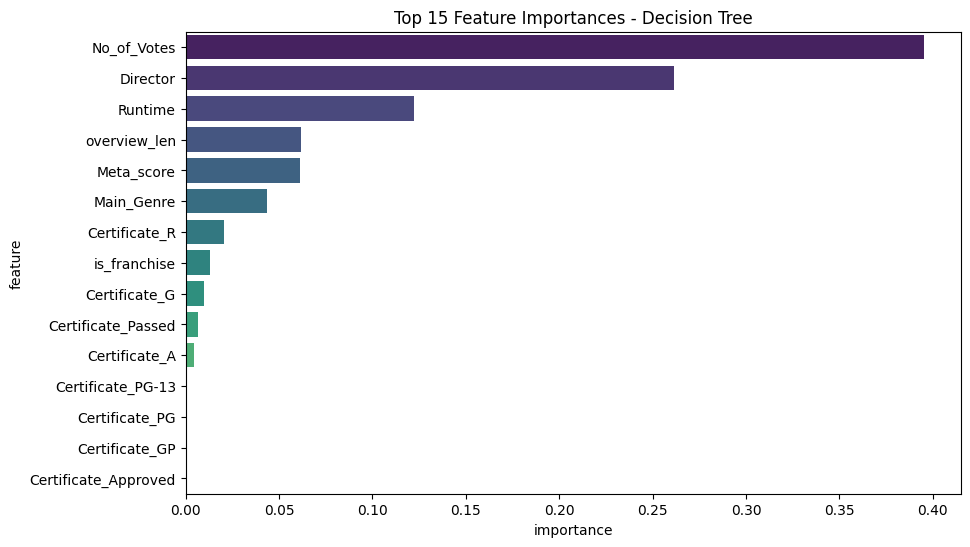

In [153]:
plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="feature", data=fi_df.head(15), palette="viridis")
plt.title("Top 15 Feature Importances - Decision Tree")
plt.show()

Abaixo deixarei uma tabela com as vari√°veis mais bem avaliadas pela feature importances.

| Vari√°vel      | Tipo inicial | Por que usamos?                                                                                              |
| ------------- | ------------ | ------------------------------------------------------------------------------------------------------------ |
| No\_of\_Votes | Num√©rica     | Indica popularidade; filmes com mais votos tendem a ter notas um pouco mais altas.                           |
| Director      | Categ√≥rica   | Diretores renomados ou consistentes na qualidade dos filmes ajudam a prever melhor o IMDB.                   |
| Runtime       | Num√©rica     | Filmes dentro de uma dura√ß√£o equilibrada (100‚Äì150 min) t√™m melhor performance de avalia√ß√£o.                  |
| overview\_len | Num√©rica     | Tamanho do resumo do filme; pouco efeito direto, mas pode indicar complexidade da hist√≥ria.                  |
| Meta\_score   | Num√©rica     | Avalia√ß√£o da cr√≠tica; influencia levemente a nota do IMDB, mas n√£o √© o fator principal.                      |
| Main\_Genre   | Categ√≥rica   | Alguns g√™neros, como Drama, Mystery e Film-Noir, apresentam notas m√©dias mais altas e consistentes.          |
| is\_franchise | Booleana     | Franquias podem ter efeito indireto via popularidade                                                  |

## 6.3 - Information Value (IV)

Vamos iniciar transformando o target em bin√°rio, pois para IV precisamos de um target bin√°rio.

In [154]:
# Criar target bin√°rio
y_bin = (y >= 8).astype(int)

Agora iremos calcular o IV para cada vari√°vel do nosso dataframe df_transformed. Para isso, vou criar uma fun√ß√£o que j√° funciona para todas as vari√°veis de uma vez.

In [155]:
def calc_iv_df(df, target, bins=10):
    iv_dict = {}
    
    for col in df.columns:
        x = df[col]
        
        # Se num√©rico, criar bins
        if np.issubdtype(x.dtype, np.number):
            try:
                x_binned = pd.qcut(x, q=bins, duplicates='drop')
            except:
                x_binned = x  # se n√£o der pra cortar, usar a vari√°vel original
        else:
            x_binned = x.astype(str)
        
        # Tabela cruzada
        grouped = pd.crosstab(x_binned, target)
        
        # Adicionar colunas dist_good e dist_bad
        grouped['dist_good'] = grouped.get(1, 0) / grouped.get(1, 0).sum()
        grouped['dist_bad']  = grouped.get(0, 0) / grouped.get(0, 0).sum()
        
        # WOE e IV
        grouped['woe'] = np.log((grouped['dist_good']+1e-6) / (grouped['dist_bad']+1e-6))
        grouped['iv'] = (grouped['dist_good'] - grouped['dist_bad']) * grouped['woe']
        
        iv = grouped['iv'].sum()
        iv_dict[col] = iv
        
    # Retornar DataFrame ordenado
    iv_df = pd.DataFrame.from_dict(iv_dict, orient='index', columns=['IV']).sort_values('IV', ascending=False)
    return iv_df

Agra vamos usar a fun√ß√£o

In [156]:
iv_results = calc_iv_df(df_transformed, y_bin)
iv_results.head(15)  # top 15 vari√°veis por IV

IV
Director              2.670975
No_of_Votes           0.648582
Meta_score            0.611439
Runtime               0.147136
overview_len          0.073853
Main_Genre            0.060392
Certificate_A         0.000000
Certificate_GP        0.000000
Certificate_PG        0.000000
Certificate_Approved  0.000000
Certificate_G         0.000000
Certificate_Passed    0.000000
Certificate_PG-13     0.000000
Certificate_R         0.000000
Certificate_U         0.000000

As vari√°veis que ser√£o usadas segundo o IV estar√£o listadas abaixo:

| Vari√°vel          | Tipo Inicial | Por que usar?                                                                        |
| ----------------- | ------------ | ------------------------------------------------------------------------------------ |
| **Director**      | Categ√≥rica   | Diretores de destaque puxam para cima ou para baixo a avalia√ß√£o dos filmes.          |
| **No\_of\_Votes** | Num√©rica     | Popularidade do filme (n√∫mero de votos) est√° relacionada com notas mais altas.       |
| **Meta\_score**   | Num√©rica     | Nota dos cr√≠ticos ajuda a prever a avalia√ß√£o do p√∫blico.                             |
| **Runtime**       | Num√©rica     | Tempo de dura√ß√£o tem efeito m√©dio, mas contribui para o modelo.                      |
| **overview\_len** | Num√©rica     | Comprimento do resumo pode indicar complexidade da hist√≥ria e atrair p√∫blico.        |
| **Main\_Genre**   | Categ√≥rica   | Captura diferen√ßas de estilo entre filmes; alguns g√™neros tendem a notas mais altas. |


## 6.4 - Resumo das vari√°veis selecionadas

Entre os tr√™s m√©todos, as vari√°veis que apareceram em comum foram **Runtime, No\_of\_Votes, Meta\_score, Main\_Genre e Director**, aparecendo em EDA, Feature Importances e IV. Algumas vari√°veis surgiram apenas em an√°lises explorat√≥rias, como **Certificate**, enquanto **overview\_len** se destacou apenas em Feature Importances e IV.


| Vari√°vel          | EDA | Feature Importances | IV |
| ----------------- | --- | ------------------- | -- |
| **Runtime**       | X   | X                   | X  |
| **No\_of\_Votes** | X   | X                   | X  |
| **Meta\_score**   | X   | X                   | X  |
| **Main\_Genre**   | X   | X                   | X  |
| **Director**      | X   | X                   | X  |
| **is\_franchise** | X   | X                   |    |
| **Certificate**   | X   |                     |    |
| **overview\_len** |     | X                   | X  |

# 7 - Escolhendo o modelo de Machine learning

Agora vamos comparar o desempenho de quatro modelos de **regress√£o** na predi√ß√£o das notas do IMDb dos filmes, usando valida√ß√£o cruzada (K-Fold com 5 splits). O que buscamos √© verificar qual modelo consegue explicar melhor a varia√ß√£o das notas, fornecendo um **R¬≤ m√©dio** como m√©trica de desempenho, al√©m da dispers√£o entre os folds.

Os modelos que ser√£o testados testados s√£o:

* **Random Forest Regressor**: ensemble de √°rvores de decis√£o, robusto a vari√°veis n√£o lineares.
* **SVM (SVR)**: Support Vector Regressor, capaz de capturar rela√ß√µes complexas com regulariza√ß√£o.
* **Ridge Regression**: regress√£o linear com penaliza√ß√£o L2, √∫til para reduzir overfitting.
* **Decision Tree Regressor**: √°rvore de decis√£o simples, interpret√°vel e f√°cil de ajustar.

Estamos lidando agora com um problema de **regress√£o** porque nosso alvo (`y`) √© uma vari√°vel cont√≠nua, a nota do IMDb, e n√£o categorias discretas. Diferente de um problema de classifica√ß√£o, onde prever√≠amos r√≥tulos como ‚Äúbom/ruim‚Äù ou ‚Äúalta/baixa nota‚Äù, aqui queremos **estimar valores num√©ricos exatos**, justificando o uso de m√©tricas e modelos espec√≠ficos para regress√£o.

Ao fim do nosso c√≥digo ser√° gerado um gr√°fico que mostra de forma visual como cada modelo se sai na previs√£o das notas, facilitando a escolha do melhor algoritmo para o nosso conjunto de dados.

Random Forest: 0.668 (0.045)
SVM: 0.380 (0.040)
Ridge: 0.466 (0.033)
Decision Tree: 0.529 (0.111)


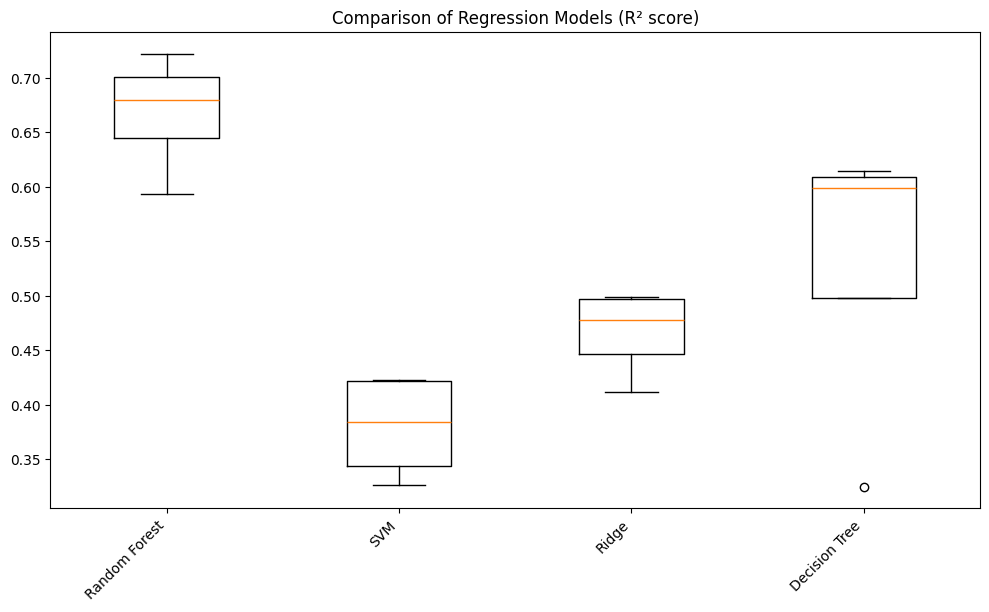

In [157]:
# Modelos de regress√£o
RF = RandomForestRegressor(random_state=1234, n_estimators=100)
SVM = SVR()  # SVM para regress√£o
RidgeReg = Ridge(random_state=1234)
DTC = DecisionTreeRegressor(random_state=1234, max_depth=15, min_samples_leaf=5)

models = [RF, SVM, RidgeReg, DTC]
model_names = ["Random Forest", "SVM", "Ridge", "Decision Tree"]

results = []

# K-Fold CV
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

# Treina os modelos
for model in models:
    pipe = Pipeline([('model', model)])
    cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    msg = f"{model_names[models.index(model)]}: {cv_results.mean():.3f} ({cv_results.std():.3f})"
    print(msg)

# Plot comparativo
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(results)
ax.set_xticklabels(model_names)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.title('Comparison of Regression Models (R¬≤ score)')
plt.show()

Os resultados nos mostram que a Random Forest foi o modelo que melhor previu as notas do IMDb, explicando cerca de 67% da varia√ß√£o e sendo bem consistente entre os folds. A Decision Tree teve desempenho intermedi√°rio, mas √© mais inst√°vel, indicando que uma √°rvore sozinha tende a overfitting. A Ridge Regression, modelo linear, foi consistente, mas n√£o capturou toda a complexidade dos dados, e a SVM teve o pior desempenho. No geral, a Random Forest se destaca por conseguir lidar melhor com rela√ß√µes n√£o lineares e intera√ß√µes entre as vari√°veis, enquanto os modelos lineares ou de √°rvore simples ficam atr√°s.

Para o nosso estudo de previs√£o de notas do IMDb, o modelo Ranodom Forest apresenta vantagens e algumas limita√ß√µes:

**Pr√≥s:**

* **Alta acur√°cia:** Por combinar muitas √°rvores, consegue capturar rela√ß√µes n√£o lineares e intera√ß√µes complexas entre vari√°veis.
* **Robusto a outliers:** Pequenas varia√ß√µes ou erros nos dados t√™m pouco impacto no modelo final.
* **Mede import√¢ncia de vari√°veis:** Permite identificar quais vari√°veis mais influenciam a predi√ß√£o, √∫til para interpreta√ß√£o.
* **Pouco overfitting comparado a uma √°rvore √∫nica:** Por agregar v√°rias √°rvores e usar amostras e features diferentes, reduz a chance de memorizar os dados de treino.

**Contras:**

* **Mais lento para treinar e prever:** Comparado a modelos lineares ou a uma √∫nica √°rvore, exige mais processamento.
* **Menos interpret√°vel:** Embora d√™ import√¢ncia das vari√°veis, o modelo em si √© uma ‚Äúcaixa-preta‚Äù, dif√≠cil de explicar √°rvore por √°rvore.
* **Pode exigir ajuste de hiperpar√¢metros:** N√∫mero de √°rvores, profundidade m√°xima, tamanho das folhas, etc., precisam ser testados para desempenho √≥timo.
* **N√£o extrapola bem:** Se os dados de teste tiverem valores fora do que o modelo viu no treino, o Random Forest pode n√£o prever corretamente.


| Aspecto            | Pr√≥s                                                      | Contras                                                     |
| ------------------ | --------------------------------------------------------- | ----------------------------------------------------------- |
| Acur√°cia           | Captura rela√ß√µes complexas e n√£o lineares entre vari√°veis |                                                             |
| Robustez           | Resistente a outliers e ru√≠dos nos dados                  |                                                             |
| Interpretabilidade | Permite avaliar import√¢ncia das vari√°veis                 | Dif√≠cil de interpretar individualmente (caixa-preta)        |
| Overfitting        | Menor risco que uma √°rvore √∫nica                          |                                                             |
| Desempenho         |                                                           | Treinamento e previs√£o mais lentos                          |
| Hiperpar√¢metros    |                                                           | Necessita ajuste de par√¢metros para performance √≥tima       |
| Extrapola√ß√£o       |                                                           | N√£o lida bem com valores fora do padr√£o observado no treino |

# 8 - Testando as vari√°veis selecionadas pelos tr√™s m√©todos

## 8.1 - Random Forest usando vari√°veis da EDA

Aqui estamos pegando apenas as colunas que a EDA indicou como relevantes para prever a nota do IMDb.

In [158]:
# Vari√°veis selecionadas na EDA
features_eda = ["Runtime", "No_of_Votes", "Meta_score", "Main_Genre", "Director", "is_franchise",
                "Certificate_A", "Certificate_Approved", "Certificate_G", "Certificate_GP",
                "Certificate_PG", "Certificate_PG-13", "Certificate_Passed", "Certificate_R",
                "Certificate_U", "Certificate_U/A", "Certificate_UA", "Certificate_Unrated"]

X_eda = df_transformed[features_eda]
y_eda = y  #vari√°vel target j√° definida

Vamos agora fazxer a divis√£o em treino e teste

In [159]:
X_train_eda, X_test_eda, y_train_eda, y_test_eda = train_test_split(
    X_eda, y_eda, test_size=0.2, random_state=1234)

Vamos agora definir o Random Forest e o grid de par√¢metros

In [160]:
rf = RandomForestRegressor(random_state=1234)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5],
    'max_features': ['sqrt', 'log2', None]
}

Aqui vamos criar o GridSearchCV

In [161]:
grid_search_eda = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                  # 5-fold cross-validation
    scoring='r2',          # avalia usando R¬≤
    n_jobs=-1,             # usa todos os n√∫cleos do processador
    verbose=2
)

Agora iremos treinar o modelo com GridSearch

In [162]:
grid_search_eda.fit(X_train_eda, y_train_eda)

# Melhor conjunto de par√¢metros
print("Melhores par√¢metros:", grid_search_eda.best_params_)

# Melhor score no treino (CV)
print("Melhor R¬≤ m√©dio (CV):", grid_search_eda.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Melhores par√¢metros: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Melhor R¬≤ m√©dio (CV): 0.6680986058814573


e agora vamos fazer a avalia√ß√£o do modelo em nosso conjunto de teste:

In [163]:
# Previs√µes
y_pred_eda = grid_search_eda.predict(X_test_eda)

# M√©tricas
r2 = r2_score(y_test_eda, y_pred_eda)
rmse = np.sqrt(mean_squared_error(y_test_eda, y_pred_eda))
mae = mean_absolute_error(y_test_eda, y_pred_eda)
mape = (np.abs((y_test_eda - y_pred_eda) / y_test_eda).mean()) * 100  # em %

print(f"R¬≤ no teste: {r2:.3f}")
print(f"RMSE no teste: {rmse:.3f}")
print(f"MAE no teste: {mae:.3f}")
print(f"MAPE no teste: {mape:.2f}%")

R¬≤ no teste: 0.729
RMSE no teste: 0.134
MAE no teste: 0.097
MAPE no teste: 1.21%


* **R¬≤ = 0.729** ‚Üí O modelo consegue explicar cerca de 73% da varia√ß√£o das notas do IMDB com as vari√°veis que escolhemos. √â um bom valor, indicando que ele captura bem o padr√£o geral, mas ainda h√° 30% da varia√ß√£o que n√£o est√° sendo explicada.
* **RMSE = 0.134** ‚Üí Em m√©dia, o erro quadr√°tico do modelo √© baixo, ou seja, as previs√µes est√£o bem pr√≥ximas dos valores reais.
* **MAE = 0.097** ‚Üí O erro absoluto m√©dio √© pequeno; em m√©dia, o modelo erra pouco mais de 0.1 ponto na nota do filme, o que √© aceit√°vel considerando a escala do IMDB (0 a 10).
* **MAPE = 1.21%** ‚Üí O erro percentual m√©dio √© bem baixo, mostrando que as previs√µes do modelo est√£o muito pr√≥ximas dos valores reais em termos relativos.

O modelo est√° indo muito bem com essas vari√°veis da EDA. Ele consegue capturar a maior parte do padr√£o das notas, erra pouco em m√©dia e tem um desempenho consistente. Ainda existem fatores que ele n√£o explica, mas para um modelo inicial, esses resultados s√£o s√≥lidos.


| M√©todo de sele√ß√£o          | R¬≤    | RMSE  | MAE   | MAPE  | Observa√ß√£o/Coment√°rio                                    |
| -------------------------- | ----- | ----- | ----- | ----- | -------------------------------------------------------- |
| **EDA**                    | 0.729 | 0.134 | 0.097 | 1.21% | Resultados obtidos com as vari√°veis selecionadas via EDA |
| **Feature Importances**    |       |       |       |       |                                                          |
| **IV (Information Value)** |       |       |       |       |                                                          |
| **Melhor resultado**       | 0.729 | 0.134 | 0.097 | 1.21% | At√© agora, melhor resultado obtido com EDA               |


## 8.2 - Random Forest usando vari√°veis da Feature importances

Escolhemos agora apenas as vari√°veis destacadas pelo m√©todo Feature Importances.

In [164]:
features_fi = ["No_of_Votes", "Director", "Runtime", "overview_len", "Meta_score", "Main_Genre", "is_franchise"]
X_fi = df_transformed[features_fi]
y_fi = y  # target j√° definida

Agora separamos os dados em treino e teste, 80% treino e 20% teste para avaliar o modelo de forma justa

In [165]:
X_train_fi, X_test_fi, y_train_fi, y_test_fi = train_test_split(
    X_fi, y_fi, test_size=0.2, random_state=1234
)

Vamos definir o modelo e os hiperpar√¢metros (Grid Search), e criando uma Random Forest, onde iremos testar combina√ß√µes de hiperpar√¢metros em busca de encontrar a melhor configura√ß√£o usando 5-fold cross-validation.

In [166]:
rf = RandomForestRegressor(random_state=1234)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5],
    'max_features': ['sqrt', 'log2', None]
}

grid_search_fi = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)

Aqui iremos treinar o modelo com todas as combina√ß√µes do Grid Search, onde ele vai selecionar automaticamente os melhores hiperpar√¢metros.

In [167]:
grid_search_fi.fit(X_train_fi, y_train_fi)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1234),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [2, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

vamos Ffzer previs√µes no conjunto de teste, usando o modelo treinado para prever as notas no conjunto de teste.

In [168]:
y_pred_fi = grid_search_fi.predict(X_test_fi)

Calcularemos as m√©tricas de desempenho

In [169]:
r2 = r2_score(y_test_fi, y_pred_fi)
rmse = np.sqrt(mean_squared_error(y_test_fi, y_pred_fi))
mae = mean_absolute_error(y_test_fi, y_pred_fi)
mape = np.mean(np.abs((y_test_fi - y_pred_fi) / y_test_fi)) * 100

print(f"R¬≤ no teste: {r2:.3f}")
print(f"RMSE no teste: {rmse:.3f}")
print(f"MAE no teste: {mae:.3f}")
print(f"MAPE no teste: {mape:.2f}%")

R¬≤ no teste: 0.728
RMSE no teste: 0.134
MAE no teste: 0.099
MAPE no teste: 1.23%


| M√©todo de sele√ß√£o          | R¬≤    | RMSE  | MAE   | MAPE  | Observa√ß√£o/Coment√°rio                                                      |
| -------------------------- | ----- | ----- | ----- | ----- | -------------------------------------------------------------------------- |
| **EDA**                    | 0.729 | 0.134 | 0.097 | 1.21% | Resultados obtidos com as vari√°veis selecionadas via EDA                   |
| **Feature Importances**    | 0.728 | 0.134 | 0.099 | 1.23% | Desempenho pr√≥ximo ao da EDA, vari√°veis importantes do modelo foram usadas |
| **IV (Information Value)** |       |       |       |       | Ainda n√£o aplicado                    |
| **Melhor resultado**       | 0.728 | 0.134 | 0.097 | 1.21% | At√© agora, melhor resultado obtido com EDA                                 |

## 8.3 - Random Forest usando vari√°veis da IV

Vamos dfinir as vari√°veis selecionadas pelo IV, ent√£o vamos criar um DataFrame X_iv apenas com essas colunas:

In [170]:
# Selecionando vari√°veis de IV
iv_features = ["Director", "No_of_Votes", "Meta_score", "Runtime", "overview_len", "Main_Genre"]
X_iv = df_transformed[iv_features]
y_iv = y  # vari√°vel target j√° definida

Vamos dividir em treino e teste, usamos o mesmo split 80/20 que antes

In [171]:
X_train_iv, X_test_iv, y_train_iv, y_test_iv = train_test_split(
    X_iv, y_iv, test_size=0.2, random_state=1234
)

Agora vamos criar o pipeline com Random Forest, como nos casos anteriores, vamos usar GridSearchCV para ajustar hiperpar√¢metros

In [172]:
rf = RandomForestRegressor(random_state=1234)

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 15, 20],
    'model__min_samples_split': [5, 10],
    'model__min_samples_leaf': [2, 5],
    'model__max_features': ['sqrt', 'log2', None]
}

pipe_iv = Pipeline([
    ('model', rf)
])

grid_search_iv = GridSearchCV(
    pipe_iv, param_grid, cv=5, scoring='r2', n_jobs=-1
)

# Treino do modelo
grid_search_iv.fit(X_train_iv, y_train_iv)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestRegressor(random_state=1234))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [10, 15, 20],
                         'model__max_features': ['sqrt', 'log2', None],
                         'model__min_samples_leaf': [2, 5],
                         'model__min_samples_split': [5, 10],
                         'model__n_estimators': [100, 200, 300]},
             scoring='r2')

Agora vamos avaliar o modelo depois de treinado, avaliamos usando as m√©tricas que j√° usamos: R¬≤, RMSE, MAE, MAPE.

In [173]:
# Previs√µes
y_pred_iv = grid_search_iv.predict(X_test_iv)

# M√©tricas
r2_iv = r2_score(y_test_iv, y_pred_iv)
rmse_iv = np.sqrt(mean_squared_error(y_test_iv, y_pred_iv))
mae_iv = mean_absolute_error(y_test_iv, y_pred_iv)
mape_iv = np.mean(np.abs((y_test_iv - y_pred_iv) / y_test_iv)) * 100

print(f"R¬≤ no teste: {r2_iv:.3f}")
print(f"RMSE no teste: {rmse_iv:.3f}")
print(f"MAE no teste: {mae_iv:.3f}")
print(f"MAPE no teste: {mape_iv:.2f}%")

R¬≤ no teste: 0.724
RMSE no teste: 0.135
MAE no teste: 0.099
MAPE no teste: 1.23%


| M√©todo de sele√ß√£o          | R¬≤    | RMSE  | MAE   | MAPE  | Observa√ß√£o/Coment√°rio                                                                            |
| -------------------------- | ----- | ----- | ----- | ----- | ------------------------------------------------------------------------------------------------ |
| **EDA**                    | 0.729 | 0.134 | 0.097 | 1.21% | Resultados obtidos com as vari√°veis selecionadas via EDA                                         |
| **Feature Importances**    | 0.728 | 0.134 | 0.099 | 1.23% | Desempenho pr√≥ximo ao da EDA, vari√°veis importantes do modelo foram usadas                       |
| **IV (Information Value)** | 0.724 | 0.135 | 0.099 | 1.23% | Bom desempenho, quase igual ao da EDA, vari√°veis escolhidas via IV se mostraram muito relevantes |
| **Melhor resultado**       | 0.729 | 0.134 | 0.097 | 1.21% | At√© agora, melhor resultado obtido com EDA                                                       |


## 8.4 - Conclus√µes

A partir dessa tabela, podemos tirar algumas conclus√µes importantes sobre o impacto da sele√ß√£o de vari√°veis no desempenho do modelo de regress√£o:

1. **Todas as abordagens funcionam bem**: Tanto as vari√°veis escolhidas pela EDA, pelo Feature Importances quanto pelo IV resultaram em modelos com **R¬≤ alto (acima de 0.72)** e erros relativamente baixos, mostrando que h√° boas vari√°veis preditoras no conjunto de dados.

2. **EDA ainda leva vantagem**: A sele√ß√£o baseada na an√°lise explorat√≥ria (EDA) entregou o **melhor desempenho geral**, com R¬≤ ligeiramente maior (0.729) e os menores RMSE e MAE. Isso indica que o conhecimento pr√©vio sobre o comportamento das vari√°veis ajuda bastante na escolha das features certas.

3. **Feature Importances e IV s√£o competitivos**: O m√©todo de Feature Importances ficou praticamente empatado com a EDA, perdendo apenas 0.001 no R¬≤. O IV tamb√©m teve resultado pr√≥ximo, o que mostra que m√©tricas de import√¢ncia e poder preditivo das vari√°veis podem guiar escolhas eficazes.

4. **Diferen√ßas sutis**: Os erros (RMSE, MAE e MAPE) mostram diferen√ßas muito pequenas entre os m√©todos. Ou seja, embora a EDA tenha uma ligeira vantagem, **todos os m√©todos geram modelos s√≥lidos**.

5. **Decis√£o pr√°tica**: Para futuros projetos, podemos optar por EDA quando houver tempo e contexto, ou usar Feature Importances/IV para automa√ß√£o, pois ambos produzem resultados quase equivalentes.

Uma boa dica √© usar o MLflow, que √© uma ferramenta para acompanhar e gerenciar experimentos de Machine Learning. Ele registra modelos, m√©tricas, par√¢metros e resultados automaticamente, facilitando comparar diferentes testes. Aqui, como s√≥ testamos tr√™s modelos, decidi criar tabelas para organizar os resultados e poupar tempo. Mas se tiv√©ssemos muitos modelos, par√¢metros ou datasets, o MLflow seria a escolha certa, porque automatiza todo o acompanhamento, mostra relat√≥rios claros e ajuda a achar rapidamente o melhor modelo. Al√©m disso, ele ainda facilita levar os modelos do experimento para produ√ß√£o de forma organizada.

Para concluir, vamos adotar o **Random Forest** com as vari√°veis selecionadas pela **EDA** como nosso modelo principal. Por√©m, vale destacar que **qualquer uma das outras sele√ß√µes de vari√°veis tamb√©m entregaria um bom desempenho**, ent√£o estar√≠amos bem servidos com qualquer escolha.


# 9 - Predi√ß√£o da nota IMDB do desafio

Aqui iremos criar um novo Dataframe com as informa√ß√µes do desafio.

In [174]:
# Dicion√°rio com as informa√ß√µes do filme
data = {
    'Series_Title': ['The Shawshank Redemption'],
    'Released_Year': ['1994'],
    'Certificate': ['A'],
    'Runtime': ['142 min'],
    'Genre': ['Drama'],
    'Overview': ['Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.'],
    'Meta_score': [80.0],
    'Director': ['Frank Darabont'],
    'Star1': ['Tim Robbins'],
    'Star2': ['Morgan Freeman'],
    'Star3': ['Bob Gunton'],
    'Star4': ['William Sadler'],
    'No_of_Votes': [2343110],
    'Gross': ['28,341,469']
}

# Criando o DataFrame
df_desafio = pd.DataFrame(data)

In [175]:
df_desafio

Series_Title Released_Year Certificate  Runtime  Genre  \
0  The Shawshank Redemption          1994           A  142 min  Drama   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   

         Director        Star1           Star2       Star3           Star4  \
0  Frank Darabont  Tim Robbins  Morgan Freeman  Bob Gunton  William Sadler   

   No_of_Votes       Gross  
0      2343110  28,341,469

Calculando o tamanho do overview

In [176]:
df_desafio["overview_len"] = df_desafio["Overview"].fillna("").apply(len)

Agora iremos filtrar apenas as vari√°veis selecionadas na etapa de EDA, que ser√£o usadas no modelo de Machine Learning.

In [177]:
# Selecionando apenas as colunas desejadas
cols = ["Runtime", "No_of_Votes", "Meta_score", "Genre", 
        "Director" , "Certificate", "overview_len"]

df_desafio = df_desafio[cols]

Como no filme temos apenas um g√™nero, ele ser√° o genero principal, e ser√° adicionada a variavel para saber se o filme √© de franquia ou n√£o, como n√£o se trata de uma franquia, ser√° 0. e transformaremos a variavel Runtime para int.

In [178]:
# Renomeando a coluna "Genre" para "Main_Genre"
df_desafio = df_desafio.rename(columns={'Genre': 'Main_Genre'})

# Adicionando a coluna "is_franchise" com valor 0, por o filme n√£o se tratar de uma franquia
df_desafio['is_franchise'] = 0

# Remover o " min" e converter para inteiro
df_desafio["Runtime"] = df_desafio["Runtime"].str.replace(" min", "").astype(int)

In [179]:
df_desafio

Runtime  No_of_Votes  Meta_score Main_Genre        Director Certificate  \
0      142      2343110        80.0      Drama  Frank Darabont           A   

   overview_len  is_franchise  
0           118             0

Vamos agora aplicar o processamento das vari√°veis do desafio, para fazer a aplica√ß√£o no nosso modelo treinado de Machine Learning

In [180]:
df_desafio_transformed = preprocessor.transform(df_desafio)

Aqui estamos retornando o vetor em dataframe.

In [181]:
# Nomes das colunas num√©ricas
num_cols = ["Runtime", "Meta_score", "No_of_Votes", "overview_len"]

# Nomes das colunas OneHotEncoder
ohe_cols = preprocessor.named_transformers_["cat_ohe"].get_feature_names_out(["Certificate"])

# TargetEncoder mant√©m os nomes originais
te_cols = ["Director", "Main_Genre"]

# Booleana
bool_cols = ["is_franchise"]

# Todos juntos
all_cols = list(num_cols) + list(ohe_cols) + list(te_cols) + bool_cols

# Criar DataFrame final
df_desafio_transformed = pd.DataFrame(df_desafio_transformed, columns=all_cols)

In [182]:
df_desafio_transformed

Runtime  Meta_score  No_of_Votes  overview_len  Certificate_A  \
0  0.655667    0.214154     2.320744     -0.602906            1.0   

   Certificate_Approved  Certificate_G  Certificate_GP  Certificate_PG  \
0                   0.0            0.0             0.0             0.0   

   Certificate_PG-13  Certificate_Passed  Certificate_R  Certificate_U  \
0                0.0                 0.0            0.0            0.0   

   Certificate_U/A  Certificate_UA  Certificate_Unrated  Director  Main_Genre  \
0              0.0             0.0                  0.0  8.025431    7.927189   

   is_franchise  
0           0.0

Agora estamos selecionando as vari√°veis para nosso modelo.

In [183]:
features_desafio = ["Runtime", "No_of_Votes", "Meta_score", "Main_Genre", "Director", "is_franchise",
                    "Certificate_A", "Certificate_Approved", "Certificate_G", "Certificate_GP",
                    "Certificate_PG", "Certificate_PG-13", "Certificate_Passed", "Certificate_R",
                    "Certificate_U", "Certificate_U/A", "Certificate_UA", "Certificate_Unrated"]

X_desafio = df_desafio_transformed[features_desafio]

Fazendo a predi√ß√£o

In [184]:
y_pred_desafio = grid_search_eda.predict(X_desafio)

In [185]:
y_pred_desafio

array([8.71217704])

A nota IMDB para esse filme, segundo o nosso modelo √© 8.7.

# 10 - Salvando o modelo usado em pkl

In [186]:
import joblib

# Salvando o melhor modelo encontrado no GridSearch para as vari√°veis da EDA
joblib.dump(grid_search_eda.best_estimator_, "modelo_rf_eda.pkl")

print("Modelo salvo com sucesso em modelo_rf_eda.pkl")

Modelo salvo com sucesso em modelo_rf_eda.pkl


Para carregar o modelo salvo depois

```python
# Carregar o modelo salvo
modelo_carregado = joblib.load("modelo_rf_eda.pkl")

# Fazer previs√£o com novos dados
y_pred = modelo_carregado.predict(novo_dado)
print(f"Predi√ß√£o da nota IMDB: {y_pred[0]:.2f}")

In [187]:
# Gerando um arquivo requirements.txt com todas as vers√µes dos pacotes
!python -m pip freeze > requirements.txt